# **Predicting and Forecasting Bike Rental Demand for Capital Bikeshare and Citi Bike Using Weather Conditions**


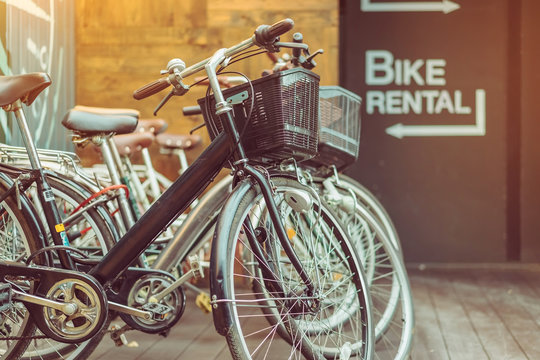

This project aims to predict and forecast hourly bike rental demand using weather conditions. The goal is to provide accurate demand forecasts for bike-sharing companies to optimize their operations and inventory management. The project uses machine learning models and is deployed as a web application using Streamlit Cloud.

In [ ]:
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
import warnings
warnings.filterwarnings("ignore")

## Datasets


The datasets comprises:


1.   Bike Sharing Data: Contains Capital Bikeshare and Citi Bike data which contains information about ride ids, locations, ride start times, end times, and stations.
2.
Weather Data: Temperature, humidity, solar radiation, wind speed, precipitation, and dew point.  





The data is sourced from:


*   
 Bike-sharing companies' official datasets (Capital Bikeshare and CitiBike)
*    Visual Crossing Weather API for weather data.




In [ ]:
from google.colab import drive
from googleapiclient.discovery import build
from google.colab import auth


drive.mount('/content/drive')
auth.authenticate_user()
drive_service = build('drive', 'v3')

# Id's of the folders in Google Drive, Since the files are more than 1 GB we are storing in MyDrive and accessing them in Shared Drive
capitalbikeshare_folder_id = '1p-skje5c98Dg2WC1X49F2bGwYv1OGlig'
citibike_folder_id = '1MTQaiV4DPu4DXlgguCvm-LSfTy0E1v7x'

def list_files_in_folder(folder_id):
    query = f"'{folder_id}' in parents and trashed=false"
    results = drive_service.files().list(q=query, fields="files(id, name)").execute()
    items = results.get('files', [])

    if not items:
        print('No files found in the folder.')
    else:
        for item in items:
            print(f"File Name: {item['name']} ")

print("CapitalBikeshare files:")
list_files_in_folder(capitalbikeshare_folder_id)

print("\nCitibike files:")
list_files_in_folder(citibike_folder_id)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
CapitalBikeshare files:
File Name: 202408-capitalbikeshare-tripdata.csv 
File Name: 202407-capitalbikeshare-tripdata.csv 
File Name: 202406-capitalbikeshare-tripdata.csv 
File Name: 202405-capitalbikeshare-tripdata.csv 
File Name: 202404-capitalbikeshare-tripdata.csv 
File Name: 202403-capitalbikeshare-tripdata.csv 
File Name: 202402-capitalbikeshare-tripdata.csv 
File Name: 202401-capitalbikeshare-tripdata.csv 
File Name: 202312-capitalbikeshare-tripdata.csv 
File Name: 202311-capitalbikeshare-tripdata.csv 
File Name: 202310-capitalbikeshare-tripdata.csv 
File Name: 202309-capitalbikeshare-tripdata.csv 
File Name: 202308-capitalbikeshare-tripdata.csv 
File Name: 202307-capitalbikeshare-tripdata.csv 

Citibike files:
File Name: CitiBike_Combined.csv 
File Name: JC-202404-citibike-tripdata.csv 
File Name: JC-202403-citibike-tripdata.csv 
File Name: JC-202402-c

In [ ]:
NY_Weather_file_path = '/content/drive/Shared drives/DATA_606_CAPSTONE/WeatherDatasets/NewYorkWeather.csv'
DC_Weather_file_path = '/content/drive/Shared drives/DATA_606_CAPSTONE/WeatherDatasets/WashingtonWeather.csv'

weatherDataNYC = pd.read_csv(NY_Weather_file_path)
weatherDataDC = pd.read_csv(DC_Weather_file_path)

In [ ]:
weatherDataNYC.head()

,name,datetime,temp,feelslike,dew,humidity,precip,precipprob,preciptype,snow,...,sealevelpressure,cloudcover,visibility,solarradiation,solarenergy,uvindex,severerisk,conditions,icon,stations
0,"New York, NY, United States",2023-04-01T00:00:00,12.0,12.0,7.6,74.40,0.0,0,NaN,0.0,...,1012.0,100.0,16.0,0,0.0,0,10,Overcast,cloudy,"72505394728,KEWR,KLGA,72502014734,KNYC,7250301..."
1,"New York, NY, United States",2023-04-01T01:00:00,13.2,13.2,7.9,70.22,0.0,0,NaN,0.0,...,1011.2,100.0,16.0,0,0.0,0,10,Overcast,cloudy,"72505394728,KEWR,KLGA,72502014734,KNYC,7250301..."
2,"New York, NY, United States",2023-04-01T02:00:00,14.5,14.5,7.7,63.70,0.0,0,NaN,0.0,...,1010.0,100.0,16.0,0,0.0,0,10,Overcast,cloudy,"72505394728,KEWR,KLGA,72502014734,KNYC,7250301..."
3,"New York, NY, United States",2023-04-01T03:00:00,15.3,15.3,9.0,65.84,0.0,0,NaN,0.0,...,1008.4,100.0,16.0,0,0.0,0,10,Overcast,cloudy,"72505394728,KEWR,KLGA,72502014734,KNYC,7250301..."
4,"New York, NY, United States",2023-04-01T04:00:00,14.3,14.3,9.2,71.52,0.0,0,NaN,0.0,...,1007.2,100.0,15.3,0,0.0,0,10,Overcast,cloudy,"72505394728,KEWR,KLGA,72502014734,KNYC,7250301..."


In [ ]:
weatherDataDC.head()

,name,datetime,temp,feelslike,dew,humidity,precip,precipprob,preciptype,snow,...,sealevelpressure,cloudcover,visibility,solarradiation,solarenergy,uvindex,severerisk,conditions,icon,stations
0,"Washington, DC, United States",2023-07-01T00:00:00,23.1,23.1,20.7,86.07,0.0,0,NaN,0.0,...,1017.1,87.9,8.5,0,0.0,0,10,Partially cloudy,partly-cloudy-night,"KDCA,72405013743,72403793728,KADW,KDAA,7459401..."
1,"Washington, DC, United States",2023-07-01T01:00:00,22.6,22.6,20.0,85.51,0.0,0,NaN,0.0,...,1017.0,93.2,8.1,0,0.0,0,10,Overcast,cloudy,"KDCA,72405013743,72403793728,KADW,KDAA,7459401..."
2,"Washington, DC, United States",2023-07-01T02:00:00,22.6,22.6,19.5,82.49,0.0,0,NaN,0.0,...,1016.5,92.3,8.4,0,0.0,0,10,Overcast,cloudy,"KDCA,72405013743,72403793728,KADW,KDAA,7459401..."
3,"Washington, DC, United States",2023-07-01T03:00:00,22.0,22.0,19.4,85.43,0.0,0,NaN,0.0,...,1016.3,90.1,8.1,0,0.0,0,5,Overcast,cloudy,"KDCA,72405013743,72403793728,KADW,KDAA,7459401..."
4,"Washington, DC, United States",2023-07-01T04:00:00,22.0,22.0,19.4,85.39,0.0,0,NaN,0.0,...,1015.8,81.1,10.1,0,0.0,0,3,Partially cloudy,partly-cloudy-night,"KDCA,72405013743,72403793728,KADW,KDAA,7459401..."


In [ ]:
import io
from googleapiclient.http import MediaIoBaseDownload

def combine_csv_files(folder_id):
    query = f"'{folder_id}' in parents and trashed=false"
    results = drive_service.files().list(q=query, fields="files(id, name)").execute()
    items = results.get('files', [])

    combined_data = pd.DataFrame()

    for item in items:
        file_id = item['id']
        file_name = item['name']
        request = drive_service.files().get_media(fileId=file_id)
        fh = io.BytesIO()
        downloader = MediaIoBaseDownload(fh, request)
        done = False
        while not done:
            status, done = downloader.next_chunk()
        fh.seek(0)
        df = pd.read_csv(fh)
        combined_data = pd.concat([combined_data, df], ignore_index=True)
    return combined_data
capitalBikeshareDCData = combine_csv_files(capitalbikeshare_folder_id)
citibikeNYCData = combine_csv_files(citibike_folder_id)


In [ ]:
capitalBikeshareDCData.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,AD7C3B3BF2D62600,electric_bike,2024-08-16 19:40:45.557,2024-08-16 19:43:19.932,16th & Harvard St NW,31135.0,15th & W St NW,31125.0,38.926132,-77.036701,38.919018,-77.034449,casual
1,06314CC26F7366A8,electric_bike,2024-08-05 17:12:31.717,2024-08-05 17:28:09.827,44th St & New Mexico Ave NW,31391.0,15th & W St NW,31125.0,38.933850,-77.086282,38.919018,-77.034449,member
2,8257244E09E6BDCE,classic_bike,2024-08-03 11:32:23.036,2024-08-03 14:05:57.169,Anacostia Park,31820.0,Anacostia Park,31820.0,38.873926,-76.981179,38.873926,-76.981179,casual
3,3EC7E9886AF7EA80,classic_bike,2024-08-05 07:20:11.837,2024-08-05 08:00:35.619,Anacostia Park,31820.0,Anacostia Park,31820.0,38.873926,-76.981179,38.873926,-76.981179,casual
4,C1DC189827FA71ED,classic_bike,2024-08-13 09:07:58.695,2024-08-13 09:24:27.514,14th & Newton St NW,31649.0,19th St & Pennsylvania Ave NW,31100.0,38.931991,-77.032956,38.900300,-77.042900,member


In [ ]:
citibikeNYCData.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,ride_duration,started_at_hour
0,2D398FDF45B98978,electric_bike,2024-04-16 21:43:36,2024-04-16 22:03:44,Marin Light Rail,JC013,Hoboken Terminal - River St & Hudson Pl,HB102,40.714584,-74.042817,40.736068,-74.029127,casual,20.08,2024-04-16 21:00:00
1,7D463681098397A7,classic_bike,2024-04-20 20:06:34,2024-04-20 20:20:33,Heights Elevator,JC059,Bergen Ave & Sip Ave,JC109,40.748716,-74.040443,40.731009,-74.064437,member,13.59,2024-04-20 20:00:00
2,5EED2D897C650AEE,classic_bike,2024-04-09 07:56:59,2024-04-09 07:59:43,6 St & Grand St,HB302,Clinton St & Newark St,HB409,40.744398,-74.034501,40.737430,-74.035710,member,2.44,2024-04-09 07:00:00
3,E1D43CEADADF8D3C,electric_bike,2024-04-17 08:44:36,2024-04-17 08:51:06,6 St & Grand St,HB302,Newport PATH,JC066,40.744318,-74.034337,40.727224,-74.033759,member,6.30,2024-04-17 08:00:00
4,B49012F99F97FEE4,classic_bike,2024-04-13 08:50:30,2024-04-13 08:55:10,Lafayette Park,JC078,Liberty Light Rail,JC052,40.713464,-74.062859,40.711242,-74.055701,member,4.40,2024-04-13 08:00:00


In [ ]:
capitalBikeshareDCData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6302003 entries, 0 to 6302002
Data columns (total 13 columns):
 #   Column              Dtype  
---  ------              -----  
 0   ride_id             object 
 1   rideable_type       object 
 2   started_at          object 
 3   ended_at            object 
 4   start_station_name  object 
 5   start_station_id    float64
 6   end_station_name    object 
 7   end_station_id      float64
 8   start_lat           float64
 9   start_lng           float64
 10  end_lat             float64
 11  end_lng             float64
 12  member_casual       object 
dtypes: float64(6), object(7)
memory usage: 625.0+ MB


In [ ]:
citibikeNYCData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2135368 entries, 0 to 2135367
Data columns (total 15 columns):
 #   Column              Dtype  
---  ------              -----  
 0   ride_id             object 
 1   rideable_type       object 
 2   started_at          object 
 3   ended_at            object 
 4   start_station_name  object 
 5   start_station_id    object 
 6   end_station_name    object 
 7   end_station_id      object 
 8   start_lat           float64
 9   start_lng           float64
 10  end_lat             float64
 11  end_lng             float64
 12  member_casual       object 
 13  ride_duration       float64
 14  started_at_hour     object 
dtypes: float64(5), object(10)
memory usage: 244.4+ MB


In [ ]:
capitalBikeshareDCData.isna().sum()

,0
ride_id,0
rideable_type,0
started_at,0
ended_at,0
start_station_name,896801
start_station_id,896801
end_station_name,940166
end_station_id,940815
start_lat,0
start_lng,0


In [ ]:
citibikeNYCData.isna().sum()

,0
ride_id,0
rideable_type,0
started_at,0
ended_at,0
start_station_name,185
start_station_id,185
end_station_name,3489
end_station_id,3547
start_lat,0
start_lng,0


In [ ]:
# Dropping the NA values because there aren't any ride for the ones without station names

capitalBikeshareDCData= capitalBikeshareDCData.dropna(subset=['started_at', 'ended_at', 'start_station_name', 'end_station_name'])

In [ ]:
capitalBikeshareDCData.shape

(4989261, 13)

In [ ]:
# Dropping the NA values because there aren't any ride for the ones without station names

citibikeNYCData = citibikeNYCData.dropna(subset=['started_at', 'ended_at', 'start_station_name', 'end_station_name'])

In [ ]:
capitalBikeshareDCData.isna().sum()

,0
ride_id,0
rideable_type,0
started_at,0
ended_at,0
start_station_name,0
start_station_id,0
end_station_name,0
end_station_id,421
start_lat,0
start_lng,0


In [ ]:
citibikeNYCData.isna().sum()

,0
ride_id,0
rideable_type,0
started_at,0
ended_at,0
start_station_name,0
start_station_id,0
end_station_name,0
end_station_id,58
start_lat,0
start_lng,0


In [ ]:
weatherDataDC.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10272 entries, 0 to 10271
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              10272 non-null  object 
 1   datetime          10272 non-null  object 
 2   temp              10272 non-null  float64
 3   feelslike         10272 non-null  float64
 4   dew               10272 non-null  float64
 5   humidity          10272 non-null  float64
 6   precip            10272 non-null  float64
 7   precipprob        10272 non-null  int64  
 8   preciptype        909 non-null    object 
 9   snow              10272 non-null  float64
 10  snowdepth         10272 non-null  float64
 11  windgust          10117 non-null  float64
 12  windspeed         10272 non-null  float64
 13  winddir           10272 non-null  int64  
 14  sealevelpressure  10272 non-null  float64
 15  cloudcover        10272 non-null  float64
 16  visibility        10272 non-null  float6

In [ ]:
# Columns to drop
columns_to_drop = ['feelslike', 'precipprob', 'preciptype', 'snow', 'snowdepth',
                   'windgust', 'winddir', 'solarenergy', 'uvindex', 'severerisk',
                   'icon', 'stations']

In [ ]:
# Dropping irrelevant coulumns
weatherDataDC = weatherDataDC.drop(columns=columns_to_drop)
weatherDataDC.head()


,name,datetime,temp,dew,humidity,precip,windspeed,sealevelpressure,cloudcover,visibility,solarradiation,conditions
0,"Washington, DC, United States",2023-07-01T00:00:00,23.1,20.7,86.07,0.0,8.7,1017.1,87.9,8.5,0,Partially cloudy
1,"Washington, DC, United States",2023-07-01T01:00:00,22.6,20.0,85.51,0.0,8.9,1017.0,93.2,8.1,0,Overcast
2,"Washington, DC, United States",2023-07-01T02:00:00,22.6,19.5,82.49,0.0,7.3,1016.5,92.3,8.4,0,Overcast
3,"Washington, DC, United States",2023-07-01T03:00:00,22.0,19.4,85.43,0.0,7.3,1016.3,90.1,8.1,0,Overcast
4,"Washington, DC, United States",2023-07-01T04:00:00,22.0,19.4,85.39,0.0,7.4,1015.8,81.1,10.1,0,Partially cloudy


In [ ]:
weatherDataNYC = weatherDataNYC.drop(columns=columns_to_drop)
weatherDataNYC.head()

,name,datetime,temp,dew,humidity,precip,windspeed,sealevelpressure,cloudcover,visibility,solarradiation,conditions
0,"New York, NY, United States",2023-04-01T00:00:00,12.0,7.6,74.40,0.0,3.0,1012.0,100.0,16.0,0,Overcast
1,"New York, NY, United States",2023-04-01T01:00:00,13.2,7.9,70.22,0.0,9.5,1011.2,100.0,16.0,0,Overcast
2,"New York, NY, United States",2023-04-01T02:00:00,14.5,7.7,63.70,0.0,8.4,1010.0,100.0,16.0,0,Overcast
3,"New York, NY, United States",2023-04-01T03:00:00,15.3,9.0,65.84,0.0,11.7,1008.4,100.0,16.0,0,Overcast
4,"New York, NY, United States",2023-04-01T04:00:00,14.3,9.2,71.52,0.0,7.3,1007.2,100.0,15.3,0,Overcast


In [ ]:
weatherDataDC.isna().sum()

,0
name,0
datetime,0
temp,0
dew,0
humidity,0
precip,0
windspeed,0
sealevelpressure,0
cloudcover,0
visibility,0


In [ ]:
weatherDataNYC.isna().sum()

,0
name,0
datetime,0
temp,0
dew,0
humidity,0
precip,0
windspeed,0
sealevelpressure,0
cloudcover,0
visibility,0


In [ ]:
weatherDataDC.head()

,name,datetime,temp,dew,humidity,precip,windspeed,sealevelpressure,cloudcover,visibility,solarradiation,conditions
0,"Washington, DC, United States",2023-07-01T00:00:00,23.1,20.7,86.07,0.0,8.7,1017.1,87.9,8.5,0,Partially cloudy
1,"Washington, DC, United States",2023-07-01T01:00:00,22.6,20.0,85.51,0.0,8.9,1017.0,93.2,8.1,0,Overcast
2,"Washington, DC, United States",2023-07-01T02:00:00,22.6,19.5,82.49,0.0,7.3,1016.5,92.3,8.4,0,Overcast
3,"Washington, DC, United States",2023-07-01T03:00:00,22.0,19.4,85.43,0.0,7.3,1016.3,90.1,8.1,0,Overcast
4,"Washington, DC, United States",2023-07-01T04:00:00,22.0,19.4,85.39,0.0,7.4,1015.8,81.1,10.1,0,Partially cloudy


In [ ]:
weatherDataDC.describe()

,temp,dew,humidity,precip,windspeed,sealevelpressure,cloudcover,visibility,solarradiation
count,10272.000000,10272.000000,10272.000000,10272.000000,10272.000000,10272.000000,10272.000000,10272.000000,10272.000000
mean,17.625662,10.176636,64.327182,0.115530,12.440606,1016.142660,64.222274,15.336030,138.858353
std,9.434156,9.598370,18.100156,0.861262,7.334852,7.202144,32.423756,2.280025,234.584575
min,-9.000000,-18.000000,14.290000,0.000000,0.000000,985.400000,0.000000,0.100000,0.000000
25%,9.400000,2.700000,49.680000,0.000000,7.475000,1011.500000,44.600000,16.000000,0.000000
50%,18.700000,11.700000,65.050000,0.000000,11.800000,1015.700000,79.300000,16.000000,6.000000
75%,25.500000,18.600000,79.862500,0.000000,16.300000,1020.500000,90.100000,16.000000,170.250000
max,39.300000,25.600000,99.510000,38.534000,56.000000,1041.700000,100.000000,16.000000,1158.000000


In [ ]:
quantitative_vars = ['temp', 'dew', 'humidity', 'precip', 'windspeed',
                     'sealevelpressure', 'cloudcover', 'visibility', 'solarradiation']
mean = weatherDataDC[quantitative_vars].mean()
median = weatherDataDC[quantitative_vars].median()
mode = weatherDataDC[quantitative_vars].mode().iloc[0]

central_tendency = pd.DataFrame({
    'Mean': mean,
    'Median': median,
    'Mode': mode
})

print("Central Tendency:\n", central_tendency)

Central Tendency:
                          Mean   Median     Mode
temp                17.625662    18.70     9.30
dew                 10.176636    11.70    22.20
humidity            64.327182    65.05    67.34
precip               0.115530     0.00     0.00
windspeed           12.440606    11.80     0.00
sealevelpressure  1016.142660  1015.70  1015.90
cloudcover          64.222274    79.30    24.40
visibility          15.336030    16.00    16.00
solarradiation     138.858353     6.00     0.00


In [ ]:
from scipy import stats

variance = weatherDataDC[quantitative_vars].var()
std_dev = weatherDataDC[quantitative_vars].std()
skewness = weatherDataDC[quantitative_vars].skew()
kurtosis = weatherDataDC[quantitative_vars].kurtosis()

percentiles = weatherDataDC[quantitative_vars].quantile([0.25, 0.5, 0.75])

dispersion = pd.DataFrame({
    'Variance': variance,
    'Standard Deviation': std_dev,
    'Skewness': skewness,
    'Kurtosis': kurtosis
})

print("\nDispersion Measures:\n", dispersion)
print("\nPercentiles:\n", percentiles)


Dispersion Measures:
                       Variance  Standard Deviation   Skewness    Kurtosis
temp                 89.003290            9.434156  -0.222887   -0.953095
dew                  92.128701            9.598370  -0.468927   -0.812474
humidity            327.615657           18.100156  -0.185969   -0.973744
precip                0.741773            0.861262  18.772989  587.561566
windspeed            53.800052            7.334852   0.733091    1.166374
sealevelpressure     51.870884            7.202144   0.096716    0.656850
cloudcover         1051.299952           32.423756  -0.605296   -1.023041
visibility            5.198516            2.280025  -4.011251   16.124354
solarradiation    55029.922978          234.584575   1.924567    2.782740

Percentiles:
       temp   dew  humidity  precip  windspeed  sealevelpressure  cloudcover  \
0.25   9.4   2.7   49.6800     0.0      7.475            1011.5        44.6   
0.50  18.7  11.7   65.0500     0.0     11.800            1015.7 

In [ ]:
capitalBikeshareDCData.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,AD7C3B3BF2D62600,electric_bike,2024-08-16 19:40:45.557,2024-08-16 19:43:19.932,16th & Harvard St NW,31135.0,15th & W St NW,31125.0,38.926132,-77.036701,38.919018,-77.034449,casual
1,06314CC26F7366A8,electric_bike,2024-08-05 17:12:31.717,2024-08-05 17:28:09.827,44th St & New Mexico Ave NW,31391.0,15th & W St NW,31125.0,38.933850,-77.086282,38.919018,-77.034449,member
2,8257244E09E6BDCE,classic_bike,2024-08-03 11:32:23.036,2024-08-03 14:05:57.169,Anacostia Park,31820.0,Anacostia Park,31820.0,38.873926,-76.981179,38.873926,-76.981179,casual
3,3EC7E9886AF7EA80,classic_bike,2024-08-05 07:20:11.837,2024-08-05 08:00:35.619,Anacostia Park,31820.0,Anacostia Park,31820.0,38.873926,-76.981179,38.873926,-76.981179,casual
4,C1DC189827FA71ED,classic_bike,2024-08-13 09:07:58.695,2024-08-13 09:24:27.514,14th & Newton St NW,31649.0,19th St & Pennsylvania Ave NW,31100.0,38.931991,-77.032956,38.900300,-77.042900,member


In [ ]:
weatherDataDC['datetime'] = pd.to_datetime(weatherDataDC['datetime'], errors='coerce')
weatherDataNYC['datetime'] = pd.to_datetime(weatherDataNYC['datetime'], errors='coerce')

In [ ]:
capitalBikeshareDCData['started_at'] = pd.to_datetime(capitalBikeshareDCData['started_at'], errors='coerce', format='mixed')
capitalBikeshareDCData['ended_at'] = pd.to_datetime(capitalBikeshareDCData['ended_at'], errors='coerce', format='mixed')

In [ ]:

capitalBikeshareDCData['ride_duration'] = (capitalBikeshareDCData['ended_at'] - capitalBikeshareDCData['started_at']).dt.total_seconds()

capitalBikeshareDCData['ride_duration'] = capitalBikeshareDCData['ride_duration'].apply(
    lambda x: f"{int(x // 60)}.{int(x % 60):02d}"
)

In [ ]:
capitalBikeshareDCData['started_at'].isna().sum()

0

In [ ]:
capitalBikeshareDCData['ended_at'].isna().sum()

0

In [ ]:
capitalBikeshareDCData.dtypes

,0
ride_id,object
rideable_type,object
started_at,datetime64[ns]
ended_at,datetime64[ns]
start_station_name,object
start_station_id,float64
end_station_name,object
end_station_id,float64
start_lat,float64
start_lng,float64


In [ ]:
citibikeNYCData['started_at'] = pd.to_datetime(citibikeNYCData['started_at'], errors='coerce', format='mixed')
citibikeNYCData['ended_at'] = pd.to_datetime(citibikeNYCData['ended_at'], errors='coerce', format='mixed')

In [ ]:
citibikeNYCData['ride_duration'] = (citibikeNYCData['ended_at'] - citibikeNYCData['started_at']).dt.total_seconds()

citibikeNYCData['ride_duration'] = citibikeNYCData['ride_duration'].apply(
    lambda x: f"{int(x // 60)}.{int(x % 60):02d}"
)

In [ ]:
citibikeNYCData['started_at'].isna().sum()

0

In [ ]:
citibikeNYCData['ended_at'].isna().sum()

0

In [ ]:
citibikeNYCData.dtypes

,0
ride_id,object
rideable_type,object
started_at,datetime64[ns]
ended_at,datetime64[ns]
start_station_name,object
start_station_id,object
end_station_name,object
end_station_id,object
start_lat,float64
start_lng,float64


In [ ]:
capitalBikeshareDCData['started_at_hour'] = capitalBikeshareDCData['started_at'].dt.floor('H')

capitalBikeshareMergedData = pd.merge(capitalBikeshareDCData, weatherDataDC, left_on='started_at_hour', right_on='datetime', how='left')
capitalBikeshareMergedData


,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,...,temp,dew,humidity,precip,windspeed,sealevelpressure,cloudcover,visibility,solarradiation,conditions
0,AD7C3B3BF2D62600,electric_bike,2024-08-16 19:40:45.557,2024-08-16 19:43:19.932,16th & Harvard St NW,31135.0,15th & W St NW,31125.0,38.926132,-77.036701,...,29.2,18.7,53.04,0.0,14.4,1014.7,81.1,16.0,38,Partially cloudy
1,06314CC26F7366A8,electric_bike,2024-08-05 17:12:31.717,2024-08-05 17:28:09.827,44th St & New Mexico Ave NW,31391.0,15th & W St NW,31125.0,38.933850,-77.086282,...,33.9,20.9,46.73,0.0,16.2,1015.1,80.3,16.0,91,Partially cloudy
2,8257244E09E6BDCE,classic_bike,2024-08-03 11:32:23.036,2024-08-03 14:05:57.169,Anacostia Park,31820.0,Anacostia Park,31820.0,38.873926,-76.981179,...,29.4,22.8,67.59,0.0,17.8,1011.0,24.4,16.0,558,Partially cloudy
3,3EC7E9886AF7EA80,classic_bike,2024-08-05 07:20:11.837,2024-08-05 08:00:35.619,Anacostia Park,31820.0,Anacostia Park,31820.0,38.873926,-76.981179,...,24.2,22.1,88.41,0.0,5.5,1017.5,27.6,16.0,34,Partially cloudy
4,C1DC189827FA71ED,classic_bike,2024-08-13 09:07:58.695,2024-08-13 09:24:27.514,14th & Newton St NW,31649.0,19th St & Pennsylvania Ave NW,31100.0,38.931991,-77.032956,...,23.7,14.9,57.77,0.0,9.2,1018.7,45.6,16.0,51,Partially cloudy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4989542,FC8D51969AE0932F,electric_bike,2023-07-10 08:59:28.000,2023-07-10 09:07:50.000,10th & G St NW,31274.0,Washington & Independence Ave SW/HHS,31272.0,38.898423,-77.026162,...,23.2,18.8,76.69,0.0,7.8,1010.2,90.1,16.0,60,Overcast
4989543,F1111F020D240337,classic_bike,2023-07-23 00:14:48.000,2023-07-23 00:15:20.000,Rhode Island Ave Metro,31516.0,Rhode Island Ave Metro,31516.0,38.920682,-76.995876,...,23.5,18.4,73.15,0.0,8.3,1012.6,46.6,16.0,0,Partially cloudy
4989544,D23342F3707DD192,classic_bike,2023-07-11 13:03:19.000,2023-07-11 19:49:24.000,Wisconsin Ave & Ingomar St NW,31317.0,Wisconsin Ave & Ingomar St NW,31317.0,38.958267,-77.084636,...,30.5,14.3,37.41,0.0,7.1,1014.0,29.0,16.0,937,Partially cloudy
4989545,F9B0A2C4B9DC3404,docked_bike,2023-07-09 18:48:52.000,2023-07-09 20:45:07.000,Amherst Ave & Prichard Rd,32064.0,Amherst Ave & Prichard Rd,32064.0,39.035965,-77.048395,...,24.8,21.1,79.77,0.0,14.4,1007.8,98.8,16.0,131,Overcast


In [ ]:
capitalBikeshareMergedData.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,...,temp,dew,humidity,precip,windspeed,sealevelpressure,cloudcover,visibility,solarradiation,conditions
0,AD7C3B3BF2D62600,electric_bike,2024-08-16 19:40:45.557,2024-08-16 19:43:19.932,16th & Harvard St NW,31135.0,15th & W St NW,31125.0,38.926132,-77.036701,...,29.2,18.7,53.04,0.0,14.4,1014.7,81.1,16.0,38,Partially cloudy
1,06314CC26F7366A8,electric_bike,2024-08-05 17:12:31.717,2024-08-05 17:28:09.827,44th St & New Mexico Ave NW,31391.0,15th & W St NW,31125.0,38.933850,-77.086282,...,33.9,20.9,46.73,0.0,16.2,1015.1,80.3,16.0,91,Partially cloudy
2,8257244E09E6BDCE,classic_bike,2024-08-03 11:32:23.036,2024-08-03 14:05:57.169,Anacostia Park,31820.0,Anacostia Park,31820.0,38.873926,-76.981179,...,29.4,22.8,67.59,0.0,17.8,1011.0,24.4,16.0,558,Partially cloudy
3,3EC7E9886AF7EA80,classic_bike,2024-08-05 07:20:11.837,2024-08-05 08:00:35.619,Anacostia Park,31820.0,Anacostia Park,31820.0,38.873926,-76.981179,...,24.2,22.1,88.41,0.0,5.5,1017.5,27.6,16.0,34,Partially cloudy
4,C1DC189827FA71ED,classic_bike,2024-08-13 09:07:58.695,2024-08-13 09:24:27.514,14th & Newton St NW,31649.0,19th St & Pennsylvania Ave NW,31100.0,38.931991,-77.032956,...,23.7,14.9,57.77,0.0,9.2,1018.7,45.6,16.0,51,Partially cloudy


In [ ]:
citibikeNYCData['started_at_hour'] = citibikeNYCData['started_at'].dt.floor('H')

citiBikeNYCMergedData = pd.merge(citibikeNYCData, weatherDataNYC, left_on='started_at_hour', right_on='datetime', how='left')
pd.set_option('display.max_columns', None)
citiBikeNYCMergedData.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,ride_duration,started_at_hour,name,datetime,temp,dew,humidity,precip,windspeed,sealevelpressure,cloudcover,visibility,solarradiation,conditions
0,2D398FDF45B98978,electric_bike,2024-04-16 21:43:36,2024-04-16 22:03:44,Marin Light Rail,JC013,Hoboken Terminal - River St & Hudson Pl,HB102,40.714584,-74.042817,40.736068,-74.029127,casual,20.08,2024-04-16 21:00:00,"New York, NY, United States",2024-04-16 21:00:00,17.9,0.6,31.14,0.0,9.3,1020.0,27.9,16.0,0,Partially cloudy
1,7D463681098397A7,classic_bike,2024-04-20 20:06:34,2024-04-20 20:20:33,Heights Elevator,JC059,Bergen Ave & Sip Ave,JC109,40.748716,-74.040443,40.731009,-74.064437,member,13.59,2024-04-20 20:00:00,"New York, NY, United States",2024-04-20 20:00:00,15.2,0.6,37.20,0.0,18.3,1012.0,19.2,16.0,0,Clear
2,5EED2D897C650AEE,classic_bike,2024-04-09 07:56:59,2024-04-09 07:59:43,6 St & Grand St,HB302,Clinton St & Newark St,HB409,40.744398,-74.034501,40.737430,-74.035710,member,2.44,2024-04-09 07:00:00,"New York, NY, United States",2024-04-09 07:00:00,12.3,2.8,52.18,0.0,7.0,1017.2,25.4,16.0,35,Partially cloudy
3,E1D43CEADADF8D3C,electric_bike,2024-04-17 08:44:36,2024-04-17 08:51:06,6 St & Grand St,HB302,Newport PATH,JC066,40.744318,-74.034337,40.727224,-74.033759,member,6.30,2024-04-17 08:00:00,"New York, NY, United States",2024-04-17 08:00:00,13.0,2.1,47.61,0.0,18.8,1022.1,34.2,16.0,144,Partially cloudy
4,B49012F99F97FEE4,classic_bike,2024-04-13 08:50:30,2024-04-13 08:55:10,Lafayette Park,JC078,Liberty Light Rail,JC052,40.713464,-74.062859,40.711242,-74.055701,member,4.40,2024-04-13 08:00:00,"New York, NY, United States",2024-04-13 08:00:00,10.0,2.0,57.60,0.0,26.1,1001.5,95.7,16.0,111,Overcast


## Exploratory Data Analysis (EDA)

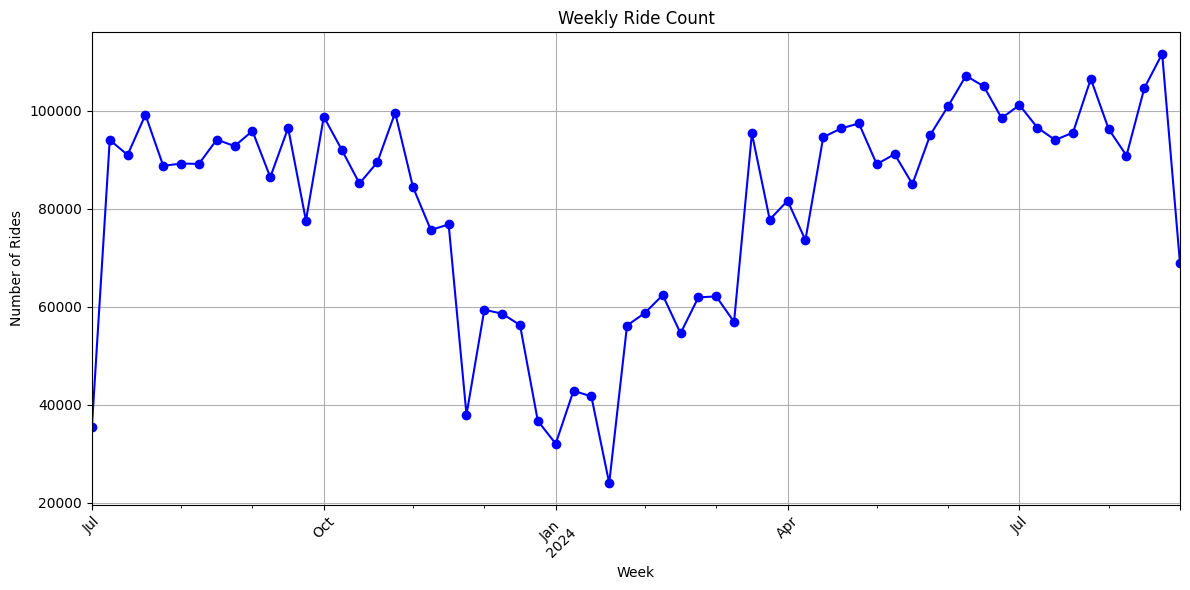

In [ ]:
ride_count_per_week = capitalBikeshareMergedData.resample('W-Mon', on='started_at').size()

plt.figure(figsize=(12, 6))
ride_count_per_week.plot(kind='line', marker='o', title='Weekly Ride Count', color='blue')
plt.xlabel('Week')
plt.ylabel('Number of Rides')
plt.xticks(rotation=45)
plt.grid()
plt.tight_layout()
plt.show()

The above line graph depicts the weekly ride count over a period of Jul 2023 to Jul 2024, showing fluctuations in the number of rides throughout the year. There appears to be a seasonal pattern with peaks in the summer months and lower numbers in the winter.

<Figure size 1200x600 with 0 Axes>

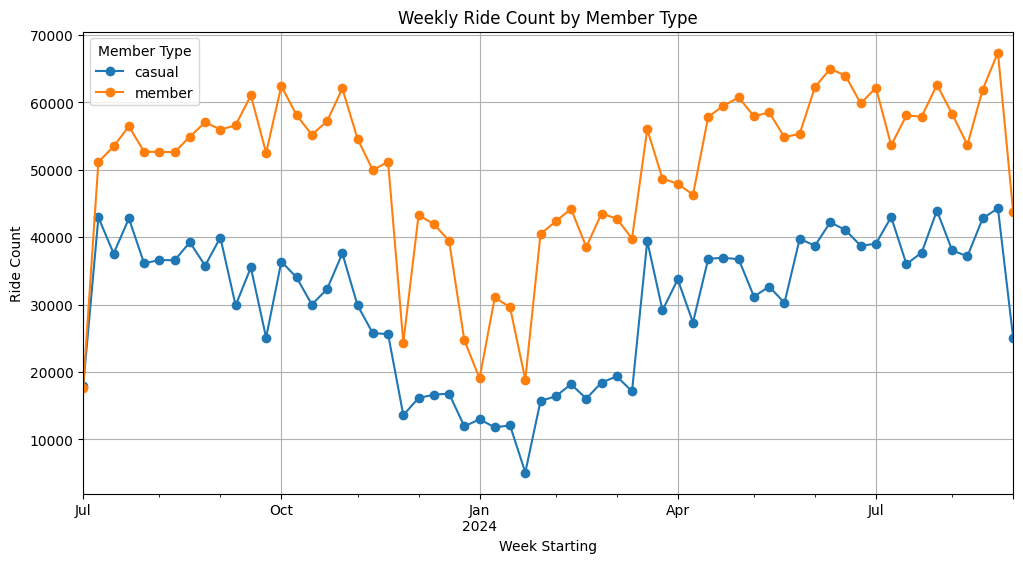

In [ ]:
# Converting 'ride_date' column to datetime format
capitalBikeshareMergedData['started_at'] = pd.to_datetime(capitalBikeshareMergedData['started_at'])

# Resampling weekly and grouping by 'member_casual'
ride_count_per_week = (
    capitalBikeshareMergedData
    .set_index('started_at')  # Setting  the datetime column as the index
    .groupby('member_casual')
    .resample('W-Mon')
    .size()
    .unstack(level=0)
)


plt.figure(figsize=(12, 6))
ride_count_per_week.plot(kind='line', marker='o', title='Weekly Ride Count by Member Type', figsize=(12, 6))
plt.xlabel('Week Starting')
plt.ylabel('Ride Count')
plt.grid(True)
plt.legend(title='Member Type')
plt.show()


The above line graph illustrates the weekly ride count by member type (casual and member). Both member types exhibit similar seasonal trends, with ride counts peaking in the summer and declining in the winter. However, members consistently take more rides than casual users each week.

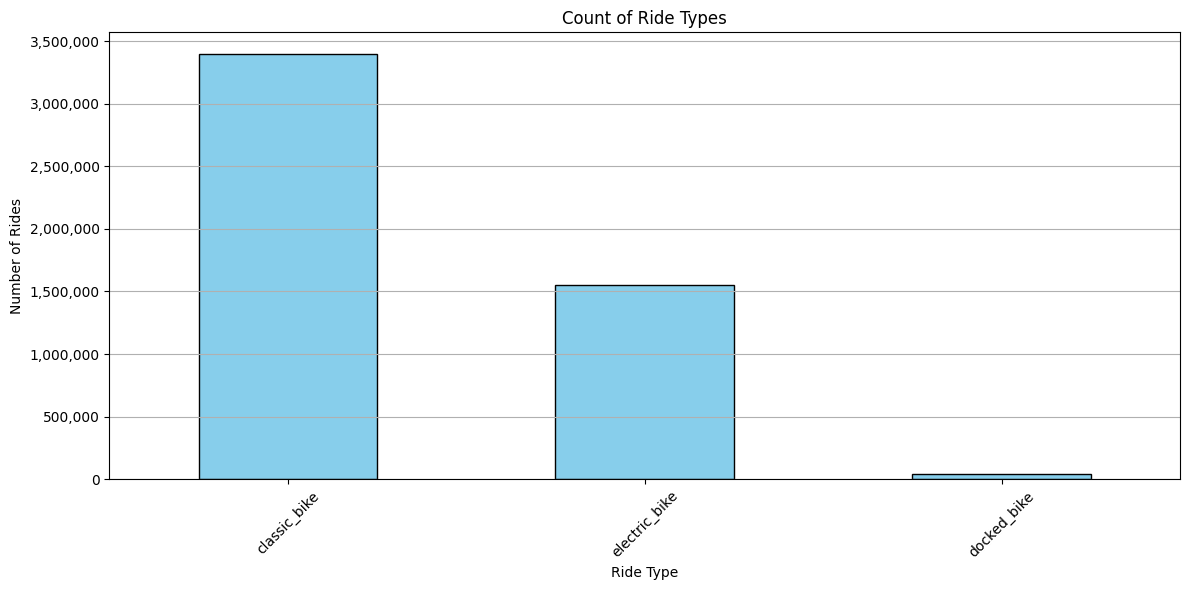

In [ ]:
ride_type_counts = capitalBikeshareMergedData['rideable_type'].value_counts()
plt.figure(figsize=(12, 6))
ride_type_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Count of Ride Types')
plt.xlabel('Ride Type')
plt.ylabel('Number of Rides')
plt.gca().get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, _: '{:,.0f}'.format(x)))
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

The above bar chart displays the count of ride types, showing that "classic_bike" rides are the most common, followed by "electric_bike," while "docked_bike" rides are significantly fewer. The chart provides insights into user preferences for different bike types

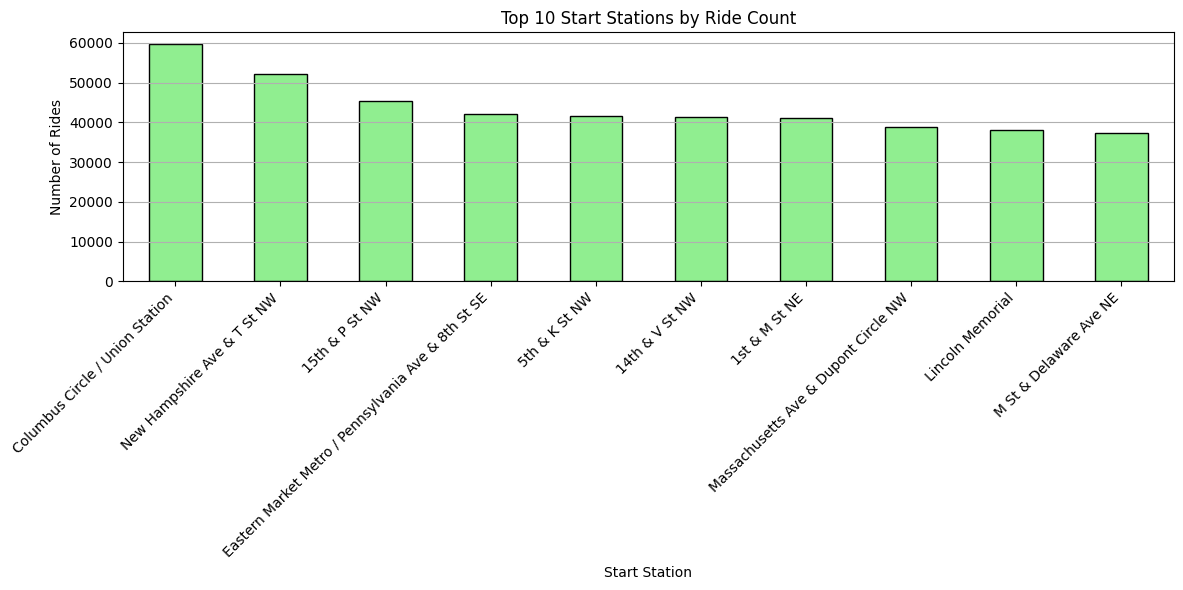

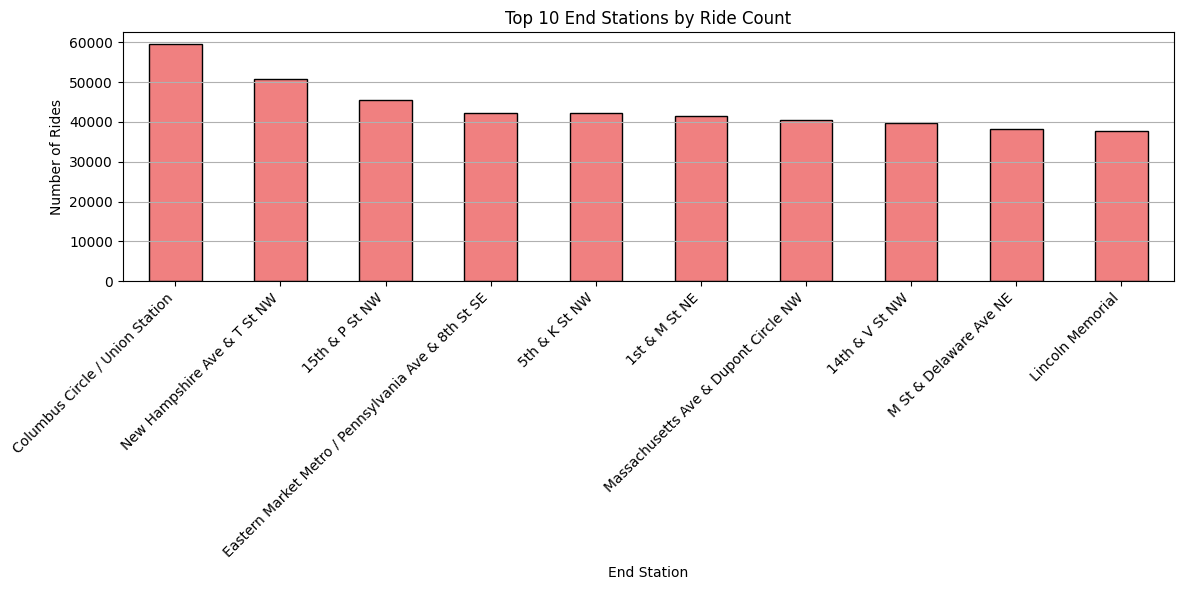

In [ ]:
top_start_stations = capitalBikeshareMergedData['start_station_name'].value_counts().head(10)
top_end_stations = capitalBikeshareMergedData['end_station_name'].value_counts().head(10)
plt.figure(figsize=(12, 6))
top_start_stations.plot(kind='bar', color='lightgreen', edgecolor='black')
plt.title('Top 10 Start Stations by Ride Count')
plt.xlabel('Start Station')
plt.ylabel('Number of Rides')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
top_end_stations.plot(kind='bar', color='lightcoral', edgecolor='black')
plt.title('Top 10 End Stations by Ride Count')
plt.xlabel('End Station')
plt.ylabel('Number of Rides')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.tight_layout()
plt.show()


The above bar charts display the top 10 start and end stations for bike rides based on the number of rides. The start station with the most rides is Columbus Circle / Union Station, while the end station with the most rides is Columbus Circle / Union Station.

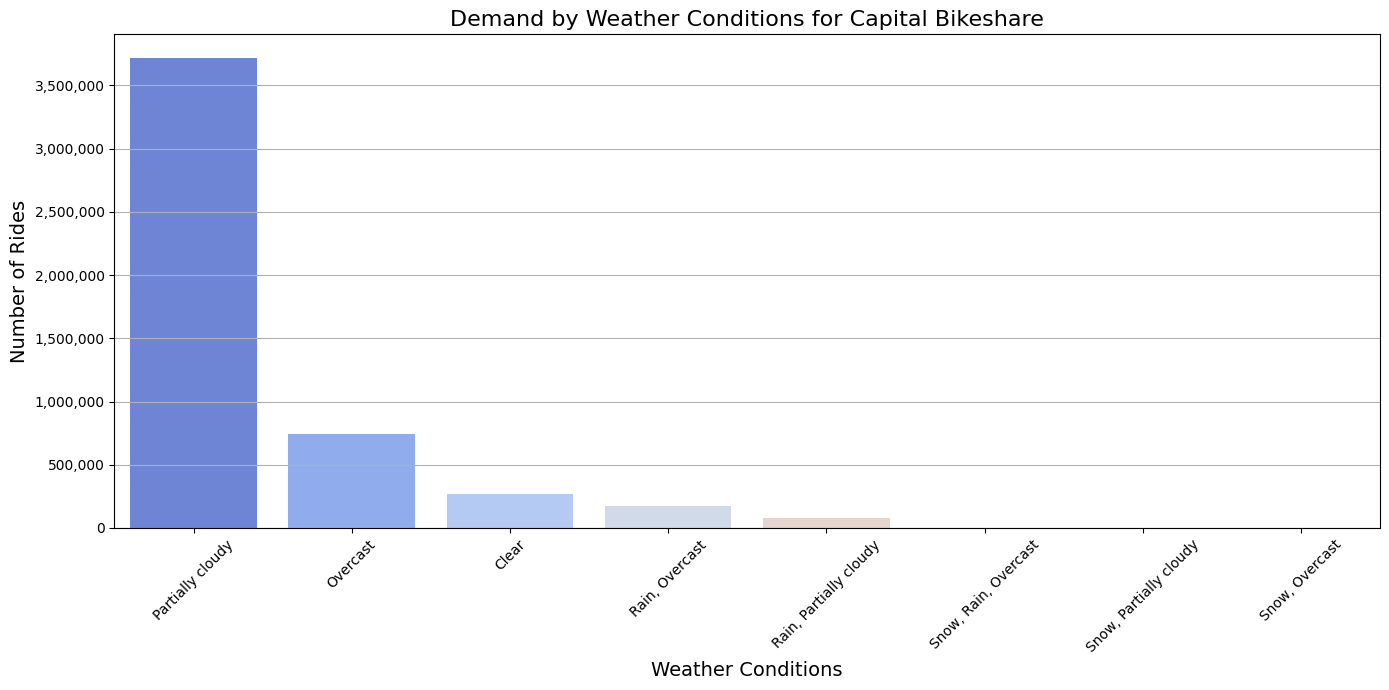

In [ ]:
from matplotlib.ticker import FuncFormatter

ride_demand_weather = capitalBikeshareMergedData.groupby('conditions').size().reset_index(name='ride_count')
ride_demand_weather = ride_demand_weather.sort_values(by='ride_count', ascending=False)
plt.figure(figsize=(14, 7))
sns.barplot(data=ride_demand_weather, x='conditions', y='ride_count', palette='coolwarm')
plt.title('Demand by Weather Conditions for Capital Bikeshare', fontsize=16)
plt.xlabel('Weather Conditions', fontsize=14)
plt.ylabel('Number of Rides', fontsize=14)
def format_func(value, tick_number):
    return f'{int(value):,}'
plt.gca().yaxis.set_major_formatter(FuncFormatter(format_func))
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

The bar chart illustrates the demand for bike rides for Capital Bikeshare based on weather conditions. The highest demand occurs during partially cloudy weather, while demand significantly decreases in adverse conditions like snow and rain.

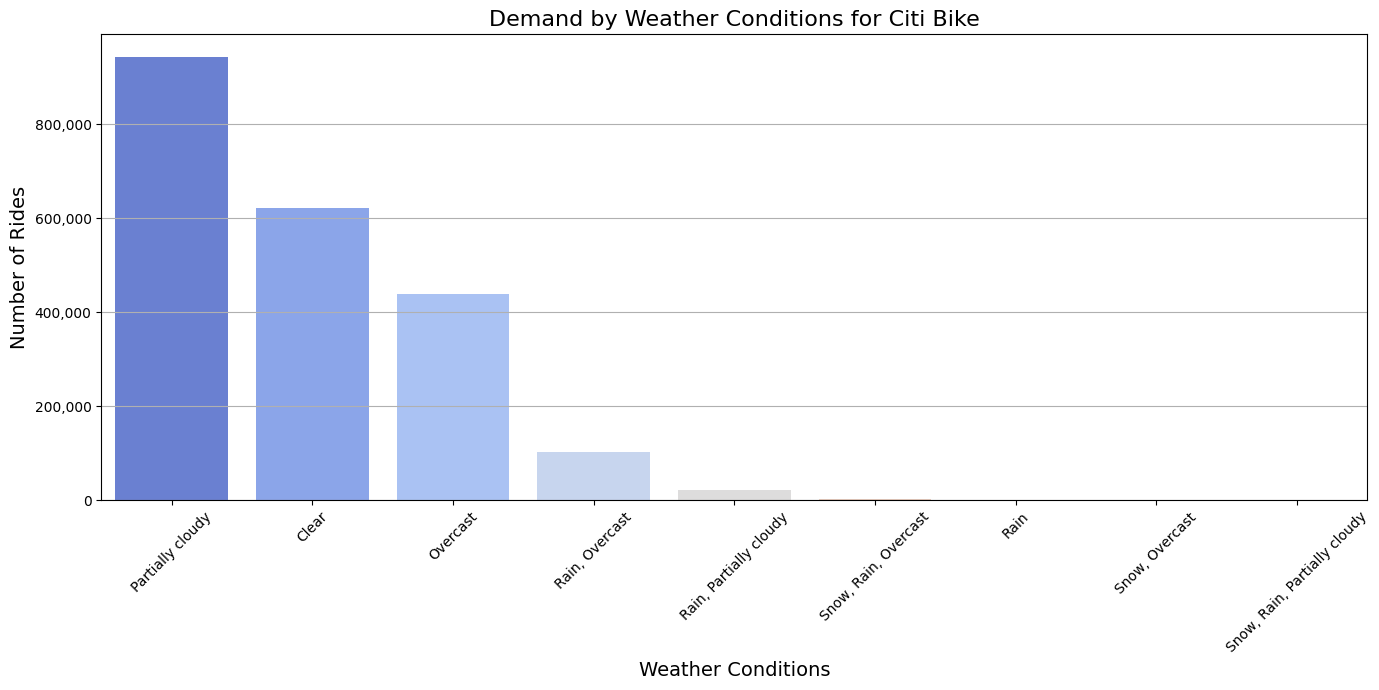

In [ ]:
from matplotlib.ticker import FuncFormatter

ride_demand_weather = citiBikeNYCMergedData.groupby('conditions').size().reset_index(name='ride_count')
ride_demand_weather = ride_demand_weather.sort_values(by='ride_count', ascending=False)
plt.figure(figsize=(14, 7))
sns.barplot(data=ride_demand_weather, x='conditions', y='ride_count', palette='coolwarm')
plt.title('Demand by Weather Conditions for Citi Bike', fontsize=16)
plt.xlabel('Weather Conditions', fontsize=14)
plt.ylabel('Number of Rides', fontsize=14)
def format_func(value, tick_number):
    return f'{int(value):,}'
plt.gca().yaxis.set_major_formatter(FuncFormatter(format_func))
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

The bar chart illustrates the demand for Citi Bike rides based on weather conditions. The highest demand occurs during partially cloudy weather, while demand significantly decreases in adverse conditions like rain, snow, and overcast skies.

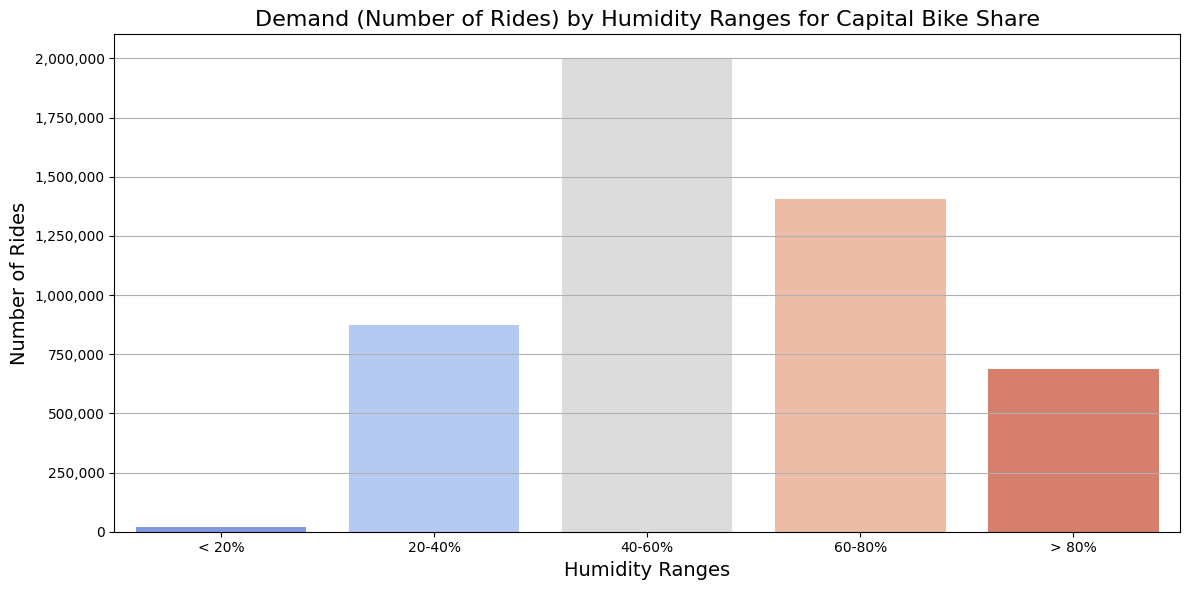

In [ ]:
bins = [-float('inf'), 20, 40, 60, 80, 100]
labels = ['< 20%', '20-40%', '40-60%', '60-80%', '> 80%']
capitalBikeshareMergedData['humidity_bins'] = pd.cut(capitalBikeshareMergedData['humidity'], bins=bins, labels=labels)
demand_by_humidity = capitalBikeshareMergedData.groupby('humidity_bins')['ride_id'].count().reset_index()
demand_by_humidity.columns = ['Humidity Ranges', 'Number of Rides']
plt.figure(figsize=(12, 6))
sns.barplot(data=demand_by_humidity, x='Humidity Ranges', y='Number of Rides', palette='coolwarm')
plt.title('Demand (Number of Rides) by Humidity Ranges for Capital Bike Share', fontsize=16)
plt.xlabel('Humidity Ranges', fontsize=14)
plt.ylabel('Number of Rides', fontsize=14)
def format_func(value, tick_number):
    return f'{int(value):,}'

plt.gca().yaxis.set_major_formatter(FuncFormatter(format_func))

plt.grid(axis='y')
plt.tight_layout()
plt.show()


The bar chart illustrates the demand for bike rides for Capital Bike Share based on humidity levels. The highest demand occurs when the humidity is between 40% and 60%, while demand significantly decreases in very low (<20%) and very high (>80%) humidity conditions.

In [ ]:
citiBikeNYCMergedData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2131936 entries, 0 to 2131935
Data columns (total 27 columns):
 #   Column              Dtype         
---  ------              -----         
 0   ride_id             object        
 1   rideable_type       object        
 2   started_at          datetime64[ns]
 3   ended_at            datetime64[ns]
 4   start_station_name  object        
 5   start_station_id    object        
 6   end_station_name    object        
 7   end_station_id      object        
 8   start_lat           float64       
 9   start_lng           float64       
 10  end_lat             float64       
 11  end_lng             float64       
 12  member_casual       object        
 13  ride_duration       object        
 14  started_at_hour     datetime64[ns]
 15  name                object        
 16  datetime            datetime64[ns]
 17  temp                float64       
 18  dew                 float64       
 19  humidity            float64       
 20  pr

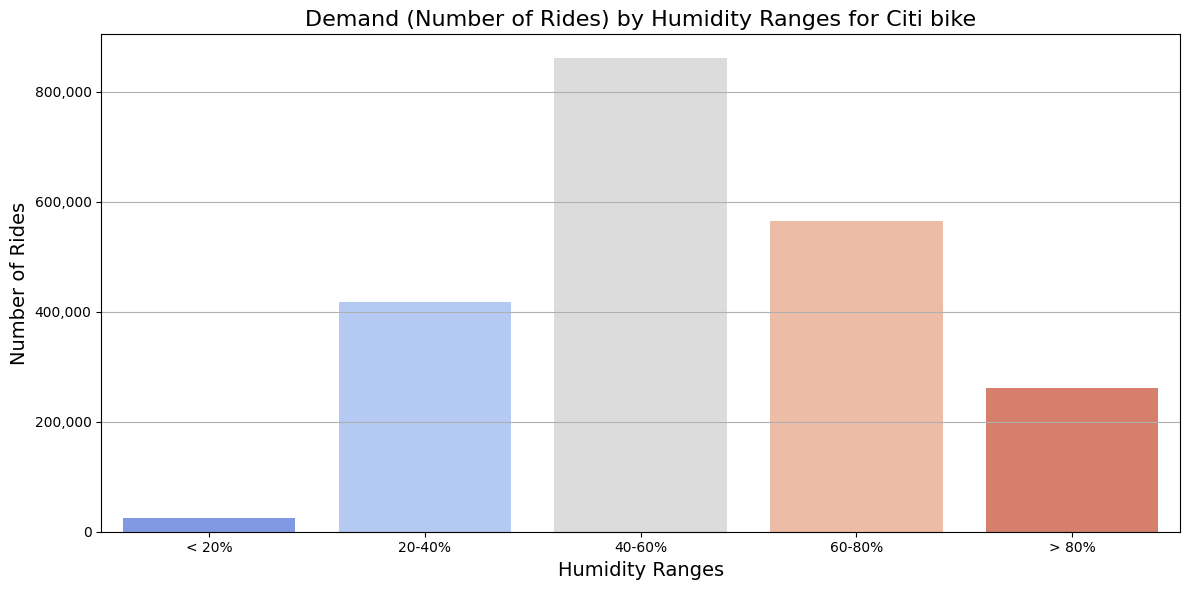

In [ ]:
bins = [-float('inf'), 20, 40, 60, 80, 100]
labels = ['< 20%', '20-40%', '40-60%', '60-80%', '> 80%']
citiBikeNYCMergedData['humidity_bins'] = pd.cut(citiBikeNYCMergedData['humidity'], bins=bins, labels=labels)
demand_by_humidity = citiBikeNYCMergedData.groupby('humidity_bins')['ride_id'].count().reset_index()
demand_by_humidity.columns = ['Humidity Ranges', 'Number of Rides']
plt.figure(figsize=(12, 6))
sns.barplot(data=demand_by_humidity, x='Humidity Ranges', y='Number of Rides', palette='coolwarm')
plt.title('Demand (Number of Rides) by Humidity Ranges for Citi bike', fontsize=16)
plt.xlabel('Humidity Ranges', fontsize=14)
plt.ylabel('Number of Rides', fontsize=14)
def format_func(value, tick_number):
    return f'{int(value):,}'

plt.gca().yaxis.set_major_formatter(FuncFormatter(format_func))

plt.grid(axis='y')
plt.tight_layout()
plt.show()

The bar chart illustrates the demand for bike rides for Citi Bike based on humidity levels. The highest demand occurs when the humidity is between 40% and 60%, while demand significantly decreases in very low (<20%) and very high (>80%) humidity conditions.

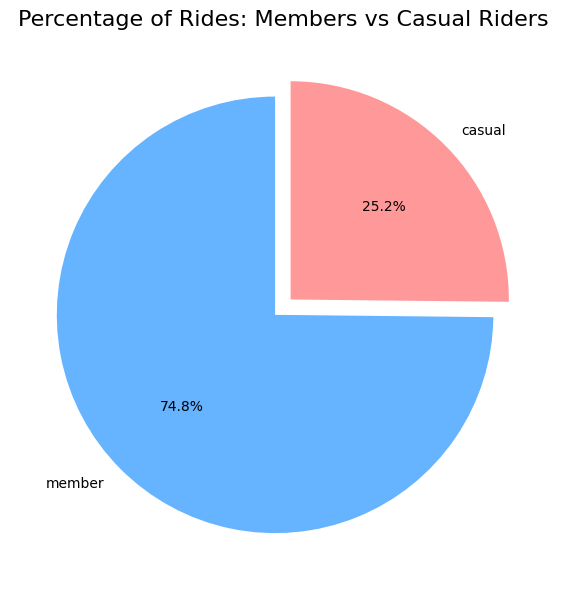

In [ ]:
ride_counts = citiBikeNYCMergedData['member_casual'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(ride_counts, labels=ride_counts.index, autopct='%1.1f%%', colors=['#66b3ff', '#ff9999'], startangle=90, explode=(0.05, 0.05))
plt.title('Percentage of Rides: Members vs Casual Riders', fontsize=16)
plt.tight_layout()
plt.show()

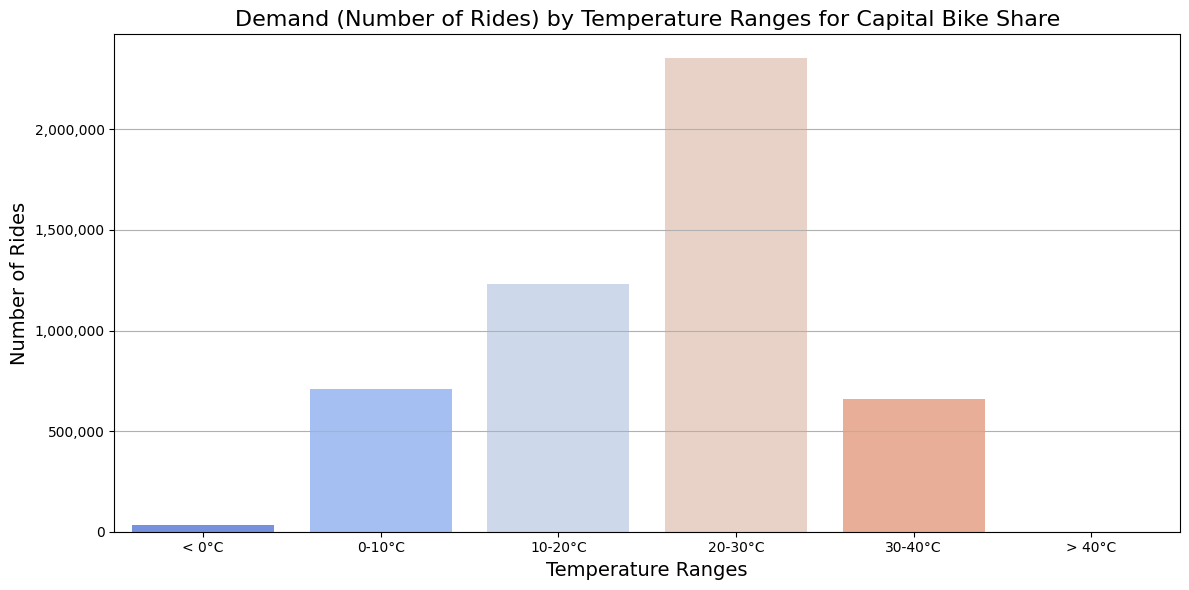

In [ ]:
bins = [-float('inf'), 0, 10, 20, 30, 40, float('inf')]
labels = ['< 0°C', '0-10°C', '10-20°C', '20-30°C', '30-40°C', '> 40°C']

capitalBikeshareMergedData['temp_bins'] = pd.cut(capitalBikeshareMergedData['temp'], bins=bins, labels=labels)
demand_by_temp = capitalBikeshareMergedData.groupby('temp_bins')['ride_id'].count().reset_index()
demand_by_temp.columns = ['Temperature Ranges', 'Number of Rides']
plt.figure(figsize=(12, 6))
sns.barplot(data=demand_by_temp, x='Temperature Ranges', y='Number of Rides', palette='coolwarm')
plt.title('Demand (Number of Rides) by Temperature Ranges for Capital Bike Share', fontsize=16)
plt.xlabel('Temperature Ranges', fontsize=14)
plt.ylabel('Number of Rides', fontsize=14)
def format_func(value, tick_number):
    return f'{int(value):,}'

plt.gca().yaxis.set_major_formatter(FuncFormatter(format_func))
plt.grid(axis='y')
plt.tight_layout()
plt.show()



The bar chart illustrates the demand for Capital Bike Share rides based on temperature ranges. The highest demand occurs when the temperature is between 20°C and 30°C, while demand significantly decreases at lower temperatures (<10°C) and very high temperatures (>40°C).

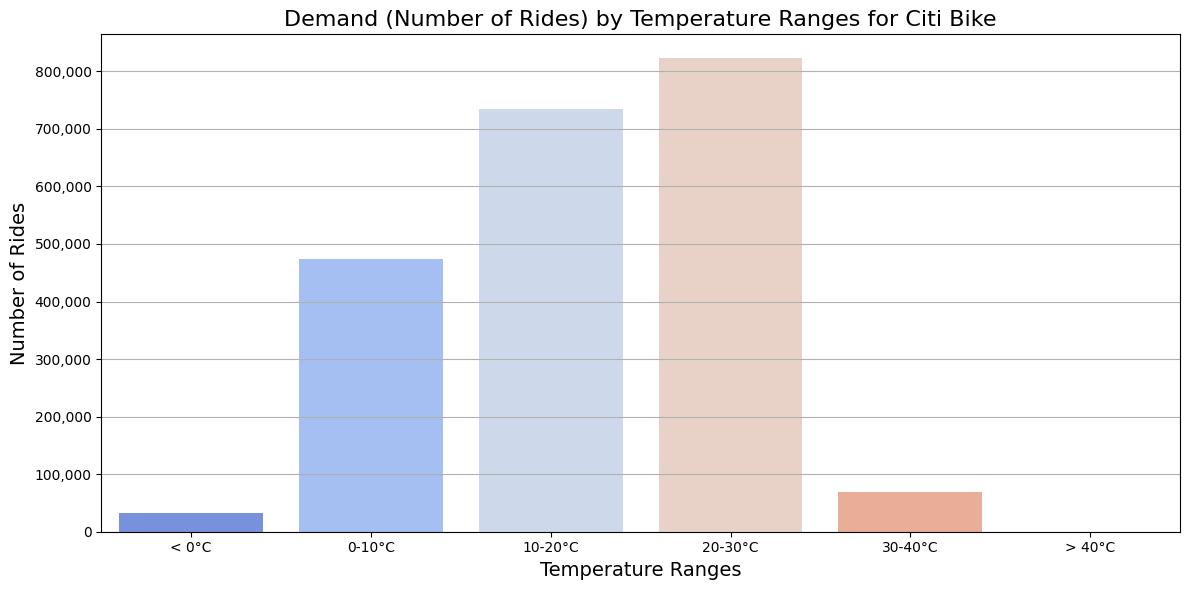

In [ ]:
bins = [-float('inf'), 0, 10, 20, 30, 40, float('inf')]
labels = ['< 0°C', '0-10°C', '10-20°C', '20-30°C', '30-40°C', '> 40°C']

citiBikeNYCMergedData['temp_bins'] = pd.cut(citiBikeNYCMergedData['temp'], bins=bins, labels=labels)
demand_by_temp = citiBikeNYCMergedData.groupby('temp_bins')['ride_id'].count().reset_index()
demand_by_temp.columns = ['Temperature Ranges', 'Number of Rides']
plt.figure(figsize=(12, 6))
sns.barplot(data=demand_by_temp, x='Temperature Ranges', y='Number of Rides', palette='coolwarm')
plt.title('Demand (Number of Rides) by Temperature Ranges for Citi Bike', fontsize=16)
plt.xlabel('Temperature Ranges', fontsize=14)
plt.ylabel('Number of Rides', fontsize=14)
def format_func(value, tick_number):
    return f'{int(value):,}'

plt.gca().yaxis.set_major_formatter(FuncFormatter(format_func))
plt.grid(axis='y')
plt.tight_layout()
plt.show()



The bar chart illustrates the demand for bike rides for Citi Bike based on temperature ranges. The highest demand occurs when the temperature is between 20°C and 30°C, while demand significantly decreases at lower temperatures (<10°C) and very high temperatures (>40°C).

In [ ]:
citiBikeNYCMergedData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2131936 entries, 0 to 2131935
Data columns (total 29 columns):
 #   Column              Dtype         
---  ------              -----         
 0   ride_id             object        
 1   rideable_type       object        
 2   started_at          datetime64[ns]
 3   ended_at            datetime64[ns]
 4   start_station_name  object        
 5   start_station_id    object        
 6   end_station_name    object        
 7   end_station_id      object        
 8   start_lat           float64       
 9   start_lng           float64       
 10  end_lat             float64       
 11  end_lng             float64       
 12  member_casual       object        
 13  ride_duration       object        
 14  started_at_hour     datetime64[ns]
 15  name                object        
 16  datetime            datetime64[ns]
 17  temp                float64       
 18  dew                 float64       
 19  humidity            float64       
 20  pr

In [ ]:
citiBikeNYCMergedData

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,ride_duration,started_at_hour,name,datetime,temp,dew,humidity,precip,windspeed,sealevelpressure,cloudcover,visibility,solarradiation,conditions,humidity_bins,temp_bins
0,2D398FDF45B98978,electric_bike,2024-04-16 21:43:36,2024-04-16 22:03:44,Marin Light Rail,JC013,Hoboken Terminal - River St & Hudson Pl,HB102,40.714584,-74.042817,40.736068,-74.029127,casual,20.08,2024-04-16 21:00:00,"New York, NY, United States",2024-04-16 21:00:00,17.9,0.6,31.14,0.0,9.3,1020.0,27.9,16.0,0,Partially cloudy,20-40%,10-20°C
1,7D463681098397A7,classic_bike,2024-04-20 20:06:34,2024-04-20 20:20:33,Heights Elevator,JC059,Bergen Ave & Sip Ave,JC109,40.748716,-74.040443,40.731009,-74.064437,member,13.59,2024-04-20 20:00:00,"New York, NY, United States",2024-04-20 20:00:00,15.2,0.6,37.20,0.0,18.3,1012.0,19.2,16.0,0,Clear,20-40%,10-20°C
2,5EED2D897C650AEE,classic_bike,2024-04-09 07:56:59,2024-04-09 07:59:43,6 St & Grand St,HB302,Clinton St & Newark St,HB409,40.744398,-74.034501,40.737430,-74.035710,member,2.44,2024-04-09 07:00:00,"New York, NY, United States",2024-04-09 07:00:00,12.3,2.8,52.18,0.0,7.0,1017.2,25.4,16.0,35,Partially cloudy,40-60%,10-20°C
3,E1D43CEADADF8D3C,electric_bike,2024-04-17 08:44:36,2024-04-17 08:51:06,6 St & Grand St,HB302,Newport PATH,JC066,40.744318,-74.034337,40.727224,-74.033759,member,6.30,2024-04-17 08:00:00,"New York, NY, United States",2024-04-17 08:00:00,13.0,2.1,47.61,0.0,18.8,1022.1,34.2,16.0,144,Partially cloudy,40-60%,10-20°C
4,B49012F99F97FEE4,classic_bike,2024-04-13 08:50:30,2024-04-13 08:55:10,Lafayette Park,JC078,Liberty Light Rail,JC052,40.713464,-74.062859,40.711242,-74.055701,member,4.40,2024-04-13 08:00:00,"New York, NY, United States",2024-04-13 08:00:00,10.0,2.0,57.60,0.0,26.1,1001.5,95.7,16.0,111,Overcast,40-60%,0-10°C
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2131931,DB10C78061D8DE72,electric_bike,2023-04-04 19:58:21,2023-04-04 20:00:41,2 St & Park Ave,HB608,4 St & Grand St,HB301,40.739153,-74.033082,40.742258,-74.035111,casual,2.20,2023-04-04 19:00:00,"New York, NY, United States",2023-04-04 19:00:00,19.2,11.6,61.66,0.0,7.0,1016.2,65.0,16.0,37,Partially cloudy,60-80%,10-20°C
2131932,540F192D0FEF0DCE,classic_bike,2023-04-14 18:46:17,2023-04-14 19:06:29,Union St,JC051,Monmouth and 6th,JC075,40.718211,-74.083639,40.725685,-74.048790,member,20.12,2023-04-14 18:00:00,"New York, NY, United States",2023-04-14 18:00:00,28.6,6.2,24.16,0.0,12.3,1009.4,34.2,16.0,225,Partially cloudy,20-40%,20-30°C
2131933,74353C7251042C05,classic_bike,2023-04-04 20:16:23,2023-04-04 20:39:08,Union St,JC051,Marin Light Rail,JC013,40.718211,-74.083639,40.714584,-74.042817,member,22.45,2023-04-04 20:00:00,"New York, NY, United States",2023-04-04 20:00:00,18.2,12.2,68.16,0.0,4.6,1016.9,34.2,16.0,5,Partially cloudy,60-80%,10-20°C
2131934,F4B95B8815759FEF,electric_bike,2023-04-25 16:34:56,2023-04-25 16:55:22,Union St,JC051,Grove St PATH,JC115,40.718211,-74.083639,40.719410,-74.043090,casual,20.26,2023-04-25 16:00:00,"New York, NY, United States",2023-04-25 16:00:00,14.9,-0.5,34.78,0.0,10.9,1020.7,95.7,16.0,339,Overcast,20-40%,10-20°C


In [ ]:
citiBikeNYCMergedData = citiBikeNYCMergedData.drop(['humidity_bins', 'temp_bins'], axis=1)

In [ ]:
hourly_demand_CitiBike = citiBikeNYCMergedData.groupby('started_at_hour')['ride_id'].count().reset_index()
hourly_demand_CitiBike.columns = ['started_at_hour', 'total_demand']

citiBikeHourlyDataMerged = pd.merge(hourly_demand_CitiBike, weatherDataNYC,
                                how='inner',
                                left_on='started_at_hour', right_on='datetime')

# Showing hourly demand for all dates
hourly_demand_CitiBike


,started_at_hour,total_demand
0,2023-04-01 00:00:00,118
1,2023-04-01 01:00:00,66
2,2023-04-01 02:00:00,62
3,2023-04-01 03:00:00,38
4,2023-04-01 04:00:00,16
...,...,...
9454,2024-04-30 19:00:00,488
9455,2024-04-30 20:00:00,292
9456,2024-04-30 21:00:00,158
9457,2024-04-30 22:00:00,132


For Citi Bike, the hourly total demand column was also calculated by aggregating the number of bike rentals within each hour. The process involved grouping the data by the date and hour, followed by summing the total rides during each hour. This transformation provided the target variable, representing hourly rental demand, enabling the creation of regression models to analyze and forecast demand influenced by temporal and weather conditions.

In [ ]:
citiBikeHourlyDataMerged.head()

,started_at_hour,total_demand,name,datetime,temp,dew,humidity,precip,windspeed,sealevelpressure,cloudcover,visibility,solarradiation,conditions
0,2023-04-01 00:00:00,118,"New York, NY, United States",2023-04-01 00:00:00,12.0,7.6,74.40,0.0,3.0,1012.0,100.0,16.0,0,Overcast
1,2023-04-01 01:00:00,66,"New York, NY, United States",2023-04-01 01:00:00,13.2,7.9,70.22,0.0,9.5,1011.2,100.0,16.0,0,Overcast
2,2023-04-01 02:00:00,62,"New York, NY, United States",2023-04-01 02:00:00,14.5,7.7,63.70,0.0,8.4,1010.0,100.0,16.0,0,Overcast
3,2023-04-01 03:00:00,38,"New York, NY, United States",2023-04-01 03:00:00,15.3,9.0,65.84,0.0,11.7,1008.4,100.0,16.0,0,Overcast
4,2023-04-01 04:00:00,16,"New York, NY, United States",2023-04-01 04:00:00,14.3,9.2,71.52,0.0,7.3,1007.2,100.0,15.3,0,Overcast


In [ ]:
features_to_correlate = [
    'temp', 'dew', 'humidity', 'precip', 'windspeed',
    'sealevelpressure', 'cloudcover', 'visibility', 'solarradiation'
]

pearson_corr = citiBikeHourlyDataMerged[features_to_correlate].corrwith(citiBikeHourlyDataMerged['total_demand'], method='pearson')
spearman_corr = citiBikeHourlyDataMerged[features_to_correlate].corrwith(citiBikeHourlyDataMerged['total_demand'], method='spearman')
kendall_corr = citiBikeHourlyDataMerged[features_to_correlate].corrwith(citiBikeHourlyDataMerged['total_demand'], method='kendall')

print("Pearson Correlation with Total Demand:\n", pearson_corr)
print("\nSpearman Correlation with Total Demand:\n", spearman_corr)
print("\nKendall Correlation with Total Demand:\n", kendall_corr)


Pearson Correlation with Total Demand:
 temp                0.403120
dew                 0.178560
humidity           -0.300290
precip             -0.126615
windspeed           0.043650
sealevelpressure   -0.017501
cloudcover         -0.091911
visibility          0.191796
solarradiation      0.343801
dtype: float64

Spearman Correlation with Total Demand:
 temp                0.379843
dew                 0.156508
humidity           -0.309564
precip             -0.203523
windspeed           0.065244
sealevelpressure   -0.013197
cloudcover         -0.084978
visibility          0.173587
solarradiation      0.565368
dtype: float64

Kendall Correlation with Total Demand:
 temp                0.257595
dew                 0.104310
humidity           -0.206546
precip             -0.163101
windspeed           0.043507
sealevelpressure   -0.009315
cloudcover         -0.060562
visibility          0.134134
solarradiation      0.412080
dtype: float64


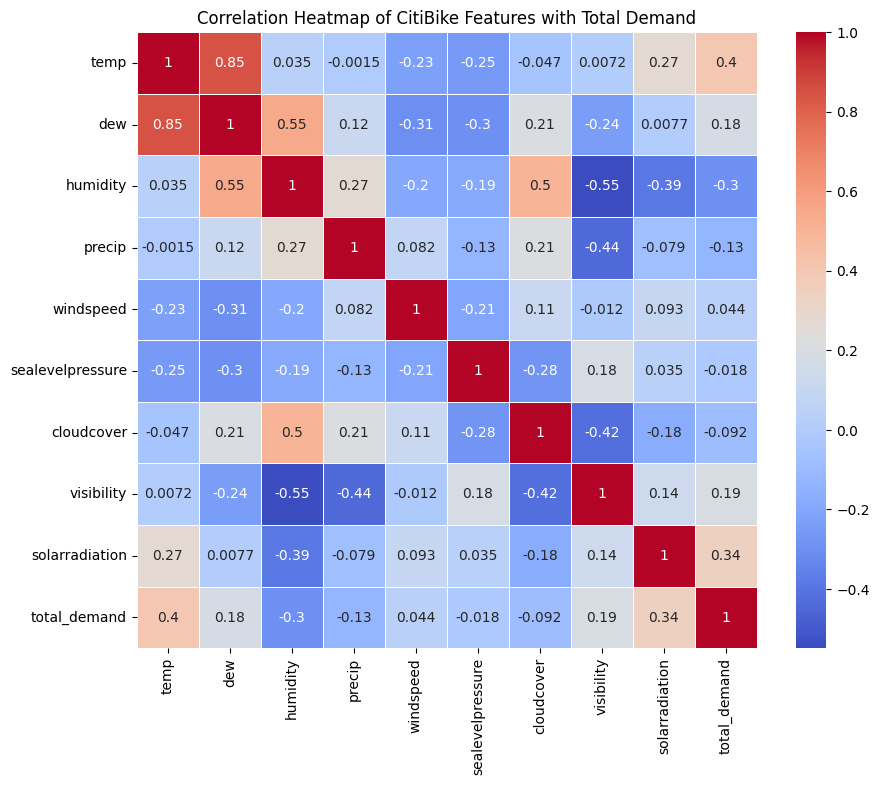

In [ ]:
features = ['temp', 'dew', 'humidity', 'precip', 'windspeed',
            'sealevelpressure', 'cloudcover', 'visibility',
            'solarradiation', 'total_demand']

correlation_matrix = citiBikeHourlyDataMerged[features].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of CitiBike Features with Total Demand')
plt.show()


The heatmap depicts the correlation between various Citi Bike features and total demand. Temperature, Solarradiation and dew have the highest positive correlation with demand, while humidity and precipitation has a negative correlation. This suggests that warmer, less humid conditions are associated with higher bike usage.

In [ ]:
# Dropping the 'cloudcover', 'visibility' and 'sealevelpressure' columns because those have very less effect
citiBikeHourlyDataMerged = citiBikeHourlyDataMerged.drop(columns=['cloudcover', 'sealevelpressure', 'visibility'])
citiBikeHourlyDataMerged.head()


,started_at_hour,total_demand,name,datetime,temp,dew,humidity,precip,windspeed,solarradiation,conditions
0,2023-04-01 00:00:00,118,"New York, NY, United States",2023-04-01 00:00:00,12.0,7.6,74.40,0.0,3.0,0,Overcast
1,2023-04-01 01:00:00,66,"New York, NY, United States",2023-04-01 01:00:00,13.2,7.9,70.22,0.0,9.5,0,Overcast
2,2023-04-01 02:00:00,62,"New York, NY, United States",2023-04-01 02:00:00,14.5,7.7,63.70,0.0,8.4,0,Overcast
3,2023-04-01 03:00:00,38,"New York, NY, United States",2023-04-01 03:00:00,15.3,9.0,65.84,0.0,11.7,0,Overcast
4,2023-04-01 04:00:00,16,"New York, NY, United States",2023-04-01 04:00:00,14.3,9.2,71.52,0.0,7.3,0,Overcast


In [ ]:
print(citiBikeHourlyDataMerged['total_demand'].describe())


count    9460.000000
mean      225.389429
std       191.930096
min         2.000000
25%        60.000000
50%       188.000000
75%       334.000000
max      1014.000000
Name: total_demand, dtype: float64


In [ ]:
import pandas as pd
from scipy.stats import chi2_contingency

citiBikeHourlyDataMerged['demand_category'] = pd.cut(
    citiBikeHourlyDataMerged['total_demand'],
    bins=[2, 60, 188, 334, 1014],
    labels=['Very Low', 'Low', 'Medium', 'High'],
    include_lowest=True
)

# Creating a contingency table for the Chi-Square test
contingency_table = pd.crosstab(
    citiBikeHourlyDataMerged['demand_category'],
    citiBikeHourlyDataMerged['conditions'],
    margins=False
)

# Performing the Chi-Square test
chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)

# Displaying the results
print("\nContingency Table:")
print(contingency_table)

print("\nChi-Square Statistic:", chi2_stat)
print(f"P-Value: {p_value:.3f}")
print("Degrees of Freedom:", dof)

alpha = 0.05
if p_value < alpha:
    print("Significant association exists between demand category and weather conditions.")
else:
    print("No significant association between demand category and weather conditions.")




Contingency Table:
conditions       Clear  Overcast  Partially cloudy  Rain  Rain, Overcast  \
demand_category                                                            
Very Low           790       537               630     0             380   
Low                675       606               671     0             379   
Medium             732       566               940     0             109   
High               656       428              1185     1              53   

conditions       Rain, Partially cloudy  Snow, Overcast  Snow, Rain, Overcast  \
demand_category                                                                 
Very Low                              9               9                    25   
Low                                  13               2                    11   
Medium                               24               0                     0   
High                                 28               0                     0   

conditions       Snow, Rain, Partial

In [ ]:
citiBikeHourlyDataMerged = citiBikeHourlyDataMerged.drop('demand_category', axis=1)
citiBikeHourlyDataMerged.head()


,started_at_hour,total_demand,name,datetime,temp,dew,humidity,precip,windspeed,solarradiation,conditions
0,2023-04-01 00:00:00,118,"New York, NY, United States",2023-04-01 00:00:00,12.0,7.6,74.40,0.0,3.0,0,Overcast
1,2023-04-01 01:00:00,66,"New York, NY, United States",2023-04-01 01:00:00,13.2,7.9,70.22,0.0,9.5,0,Overcast
2,2023-04-01 02:00:00,62,"New York, NY, United States",2023-04-01 02:00:00,14.5,7.7,63.70,0.0,8.4,0,Overcast
3,2023-04-01 03:00:00,38,"New York, NY, United States",2023-04-01 03:00:00,15.3,9.0,65.84,0.0,11.7,0,Overcast
4,2023-04-01 04:00:00,16,"New York, NY, United States",2023-04-01 04:00:00,14.3,9.2,71.52,0.0,7.3,0,Overcast


In [ ]:
capitalBikeshareMergedData.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,ride_duration,started_at_hour,name,datetime,temp,dew,humidity,precip,windspeed,sealevelpressure,cloudcover,visibility,solarradiation,conditions,humidity_bins,temp_bins
0,AD7C3B3BF2D62600,electric_bike,2024-08-16 19:40:45.557,2024-08-16 19:43:19.932,16th & Harvard St NW,31135.0,15th & W St NW,31125.0,38.926132,-77.036701,38.919018,-77.034449,casual,2.34,2024-08-16 19:00:00,"Washington, DC, United States",2024-08-16 19:00:00,29.2,18.7,53.04,0.0,14.4,1014.7,81.1,16.0,38,Partially cloudy,40-60%,20-30°C
1,06314CC26F7366A8,electric_bike,2024-08-05 17:12:31.717,2024-08-05 17:28:09.827,44th St & New Mexico Ave NW,31391.0,15th & W St NW,31125.0,38.933850,-77.086282,38.919018,-77.034449,member,15.38,2024-08-05 17:00:00,"Washington, DC, United States",2024-08-05 17:00:00,33.9,20.9,46.73,0.0,16.2,1015.1,80.3,16.0,91,Partially cloudy,40-60%,30-40°C
2,8257244E09E6BDCE,classic_bike,2024-08-03 11:32:23.036,2024-08-03 14:05:57.169,Anacostia Park,31820.0,Anacostia Park,31820.0,38.873926,-76.981179,38.873926,-76.981179,casual,153.34,2024-08-03 11:00:00,"Washington, DC, United States",2024-08-03 11:00:00,29.4,22.8,67.59,0.0,17.8,1011.0,24.4,16.0,558,Partially cloudy,60-80%,20-30°C
3,3EC7E9886AF7EA80,classic_bike,2024-08-05 07:20:11.837,2024-08-05 08:00:35.619,Anacostia Park,31820.0,Anacostia Park,31820.0,38.873926,-76.981179,38.873926,-76.981179,casual,40.23,2024-08-05 07:00:00,"Washington, DC, United States",2024-08-05 07:00:00,24.2,22.1,88.41,0.0,5.5,1017.5,27.6,16.0,34,Partially cloudy,> 80%,20-30°C
4,C1DC189827FA71ED,classic_bike,2024-08-13 09:07:58.695,2024-08-13 09:24:27.514,14th & Newton St NW,31649.0,19th St & Pennsylvania Ave NW,31100.0,38.931991,-77.032956,38.900300,-77.042900,member,16.28,2024-08-13 09:00:00,"Washington, DC, United States",2024-08-13 09:00:00,23.7,14.9,57.77,0.0,9.2,1018.7,45.6,16.0,51,Partially cloudy,40-60%,20-30°C


In [ ]:
capitalBikeshareMergedData = capitalBikeshareMergedData.drop(['humidity_bins'], axis=1)

In [ ]:
hourlyDemandCapitalBikeshare = capitalBikeshareMergedData.groupby('started_at_hour')['ride_id'].count().reset_index()
hourlyDemandCapitalBikeshare.columns = ['started_at_hour', 'total_demand']

capitalBikeshareHourlyDataMerged = pd.merge(hourlyDemandCapitalBikeshare, weatherDataDC,
                                how='inner',
                                left_on='started_at_hour', right_on='datetime')

# Showing hourly demand for all dates in CapitalBikeshare
hourlyDemandCapitalBikeshare

,started_at_hour,total_demand
0,2023-07-01 00:00:00,196
1,2023-07-01 01:00:00,158
2,2023-07-01 02:00:00,117
3,2023-07-01 03:00:00,74
4,2023-07-01 04:00:00,23
...,...,...
10265,2024-08-31 19:00:00,755
10266,2024-08-31 20:00:00,553
10267,2024-08-31 21:00:00,456
10268,2024-08-31 22:00:00,385


For Capital Bikeshare, the hourly total demand column was calculated by aggregating the number of bike rentals within each hour. This was done by grouping the dataset by the date and hour, then counting the total number of rides for each hour. This transformation similarly provided the target variable, representing the total hourly demand for bike rentals, which was crucial for building regression models to predict demand patterns based on time and weather factors.

In [ ]:
pearson_corr = capitalBikeshareHourlyDataMerged[features_to_correlate].corrwith(capitalBikeshareHourlyDataMerged['total_demand'], method='pearson')
spearman_corr = capitalBikeshareHourlyDataMerged[features_to_correlate].corrwith(capitalBikeshareHourlyDataMerged['total_demand'], method='spearman')
kendall_corr = capitalBikeshareHourlyDataMerged[features_to_correlate].corrwith(capitalBikeshareHourlyDataMerged['total_demand'], method='kendall')

print("Pearson Correlation with Total Demand:\n", pearson_corr)
print("\nSpearman Correlation with Total Demand:\n", spearman_corr)
print("\nKendall Correlation with Total Demand:\n", kendall_corr)

Pearson Correlation with Total Demand:
 temp                0.431815
dew                 0.179837
humidity           -0.444484
precip             -0.077520
windspeed           0.180579
sealevelpressure   -0.052795
cloudcover         -0.023247
visibility          0.141227
solarradiation      0.436866
dtype: float64

Spearman Correlation with Total Demand:
 temp                0.437235
dew                 0.169943
humidity           -0.446252
precip             -0.154283
windspeed           0.211720
sealevelpressure   -0.047318
cloudcover         -0.080638
visibility          0.180758
solarradiation      0.687603
dtype: float64

Kendall Correlation with Total Demand:
 temp                0.296651
dew                 0.112295
humidity           -0.300779
precip             -0.124107
windspeed           0.142292
sealevelpressure   -0.031798
cloudcover         -0.055155
visibility          0.141586
solarradiation      0.498709
dtype: float64


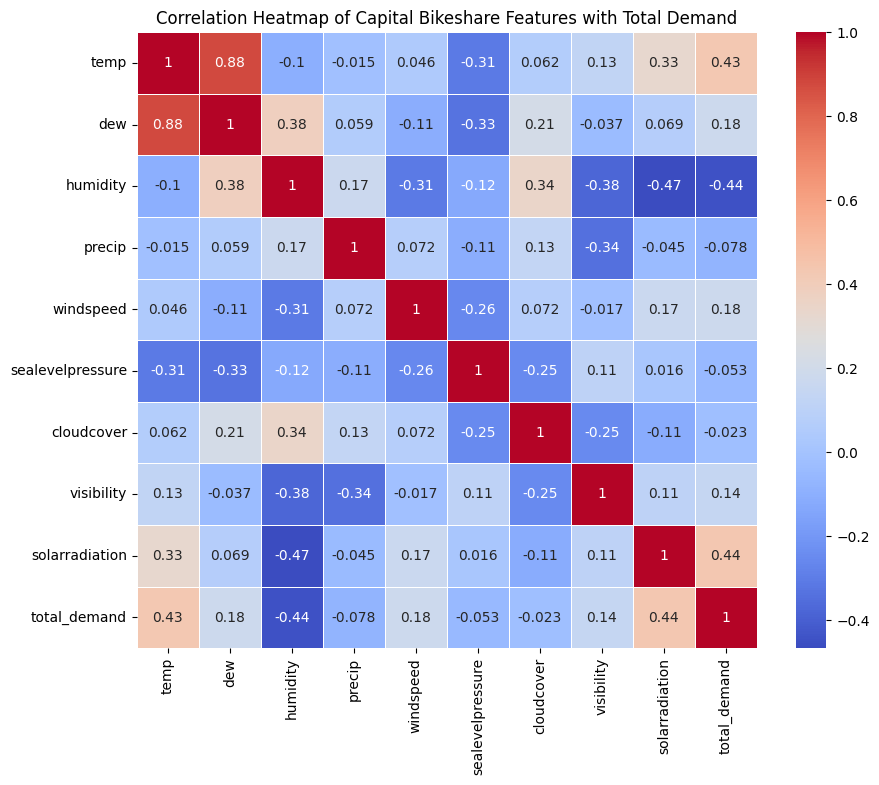

In [ ]:
features = ['temp', 'dew', 'humidity', 'precip', 'windspeed',
            'sealevelpressure', 'cloudcover', 'visibility',
            'solarradiation', 'total_demand']

correlation_matrix = capitalBikeshareHourlyDataMerged[features].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Capital Bikeshare Features with Total Demand')
plt.show()

The heatmap depicts the correlation between various Capital Bikeshare features and total demand. Solar Radiation, Temperature and dew point have the highest positive correlation with demand, while humidity and precipitation have a negative correlation. This suggests that warmer, less humid, and clear weather conditions are associated with higher bike usage.

In [ ]:
# Dropping the 'cloudcover', 'visibility' and 'sealevelpressure' columns because those have very less effect
capitalBikeshareHourlyDataMerged = capitalBikeshareHourlyDataMerged.drop(columns=['cloudcover', 'sealevelpressure', 'visibility'])
capitalBikeshareHourlyDataMerged.head()

,started_at_hour,total_demand,name,datetime,temp,dew,humidity,precip,windspeed,solarradiation,conditions
0,2023-07-01 00:00:00,196,"Washington, DC, United States",2023-07-01 00:00:00,23.1,20.7,86.07,0.0,8.7,0,Partially cloudy
1,2023-07-01 01:00:00,158,"Washington, DC, United States",2023-07-01 01:00:00,22.6,20.0,85.51,0.0,8.9,0,Overcast
2,2023-07-01 02:00:00,117,"Washington, DC, United States",2023-07-01 02:00:00,22.6,19.5,82.49,0.0,7.3,0,Overcast
3,2023-07-01 03:00:00,74,"Washington, DC, United States",2023-07-01 03:00:00,22.0,19.4,85.43,0.0,7.3,0,Overcast
4,2023-07-01 04:00:00,23,"Washington, DC, United States",2023-07-01 04:00:00,22.0,19.4,85.39,0.0,7.4,0,Partially cloudy


In [ ]:
print(capitalBikeshareHourlyDataMerged['total_demand'].describe())

count    10271.000000
mean       485.845487
std        415.693494
min          1.000000
25%        105.000000
50%        418.000000
75%        740.000000
max       2016.000000
Name: total_demand, dtype: float64


In [ ]:
from scipy.stats import chi2_contingency

capitalBikeshareHourlyDataMerged['demand_category'] = pd.cut(
    capitalBikeshareHourlyDataMerged['total_demand'],
    bins=[1, 105, 418, 740, 2016],
    labels=['Very Low', 'Low', 'Medium', 'High'],
    include_lowest=True
)

contingency_table = pd.crosstab(
    capitalBikeshareHourlyDataMerged['demand_category'],
    capitalBikeshareHourlyDataMerged['conditions'],
    margins=False
)

chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)

# Displaying the results
print("\nContingency Table:")
print(contingency_table)

print("\nChi-Square Statistic:", chi2_stat)
print(f"P-Value: {p_value:.3f}")
print("Degrees of Freedom:", dof)

alpha = 0.05
if p_value < alpha:
    print("Significant association exists between demand category and weather conditions.")
else:
    print("No significant association between demand category and weather conditions.")



Contingency Table:
conditions       Clear  Overcast  Partially cloudy  Rain, Overcast  \
demand_category                                                      
Very Low           320       586              1333             280   
Low                260       533              1422             287   
Medium             160       416              1857             100   
High               100       350              2034              38   

conditions       Rain, Partially cloudy  Snow, Overcast  \
demand_category                                           
Very Low                             28               1   
Low                                  47               0   
Medium                               36               0   
High                                 43               0   

conditions       Snow, Partially cloudy  Snow, Rain, Overcast  
demand_category                                                
Very Low                              0                    29  
Low         

In [ ]:
capitalBikeshareHourlyDataMerged['hour'] = capitalBikeshareHourlyDataMerged['started_at_hour'].dt.hour
capitalBikeshareHourlyDataMerged.head()

,started_at_hour,total_demand,name,datetime,temp,dew,humidity,precip,windspeed,solarradiation,conditions,demand_category,hour
0,2023-07-01 00:00:00,196,"Washington, DC, United States",2023-07-01 00:00:00,23.1,20.7,86.07,0.0,8.7,0,Partially cloudy,Low,0
1,2023-07-01 01:00:00,158,"Washington, DC, United States",2023-07-01 01:00:00,22.6,20.0,85.51,0.0,8.9,0,Overcast,Low,1
2,2023-07-01 02:00:00,117,"Washington, DC, United States",2023-07-01 02:00:00,22.6,19.5,82.49,0.0,7.3,0,Overcast,Low,2
3,2023-07-01 03:00:00,74,"Washington, DC, United States",2023-07-01 03:00:00,22.0,19.4,85.43,0.0,7.3,0,Overcast,Very Low,3
4,2023-07-01 04:00:00,23,"Washington, DC, United States",2023-07-01 04:00:00,22.0,19.4,85.39,0.0,7.4,0,Partially cloudy,Very Low,4


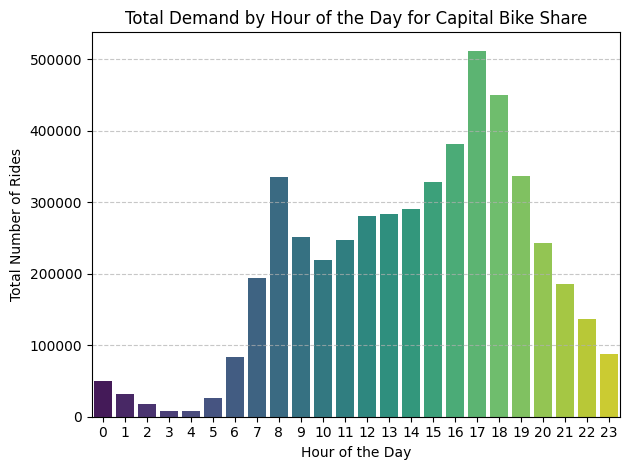

In [ ]:
# Adding a new column 'hour' by extracting the hour from the 'datetime' column
capitalBikeshareHourlyDataMerged['hour'] = capitalBikeshareHourlyDataMerged['datetime'].dt.hour

# Grouping the data by 'hour' and calculating the total demand
hourly_demand = capitalBikeshareHourlyDataMerged.groupby('hour', as_index=False)['total_demand'].sum()
sns.barplot(data=hourly_demand, x='hour', y='total_demand', palette='viridis')
plt.title('Total Demand by Hour of the Day for Capital Bike Share')
plt.xlabel('Hour of the Day')
plt.ylabel('Total Number of Rides')
plt.xticks(range(0, 24))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


The bar chart illustrates the total demand for Capital Bike Share rides throughout the day. There is a clear peak in demand between 5 PM and 6 PM, suggesting that evening commutes are a major driver of bike share usage. Additionally, there are smaller peaks in the morning and early afternoon, potentially indicating commuting and lunchtime trips.

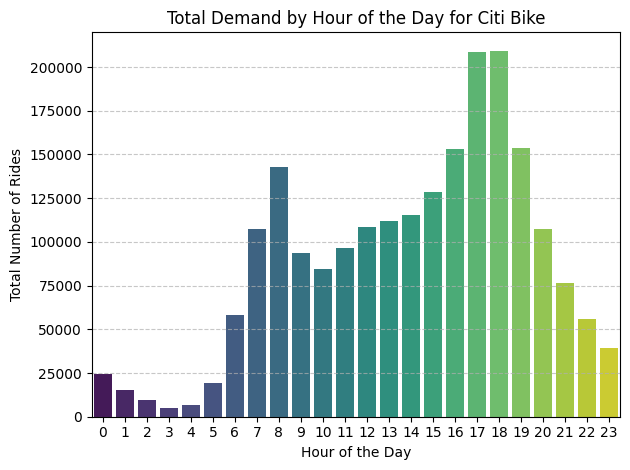

In [ ]:
# Total demand by hour of the day for Citi Bike
citiBikeHourlyDataMerged['hour'] = citiBikeHourlyDataMerged['datetime'].dt.hour
hourly_demand = citiBikeHourlyDataMerged.groupby('hour', as_index=False)['total_demand'].sum()
sns.barplot(data=hourly_demand, x='hour', y='total_demand', palette='viridis')
plt.title('Total Demand by Hour of the Day for Citi Bike')
plt.xlabel('Hour of the Day')
plt.ylabel('Total Number of Rides')
plt.xticks(range(0, 24))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


The bar chart illustrates the total demand for Citi Bike rides throughout the day. There is a clear peak in demand between 5 PM and 6 PM, suggesting that evening commutes are a major driver of bike share usage. Additionally, there are smaller peaks in the morning and early afternoon, potentially indicating commuting and lunchtime trips.

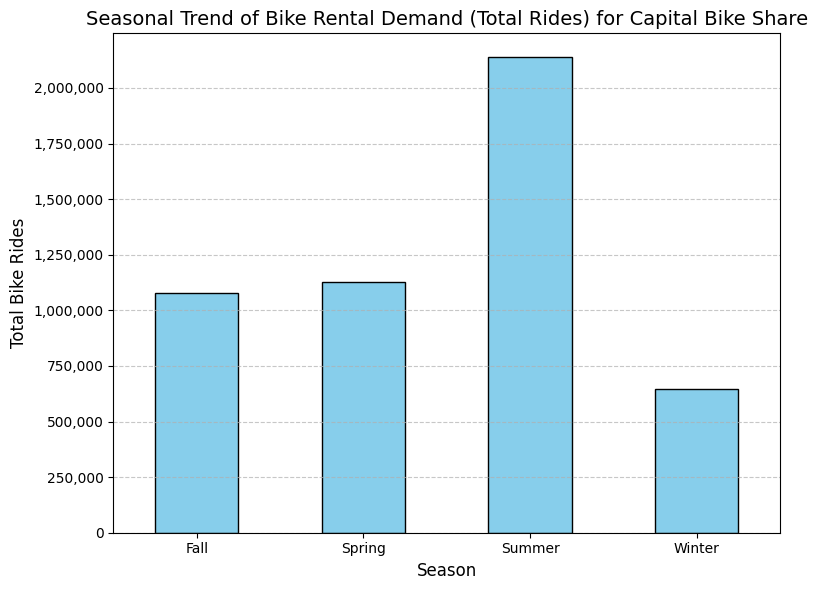

In [ ]:
capitalBikeshareHourlyDataMerged['datetime'] = pd.to_datetime(capitalBikeshareHourlyDataMerged['datetime'])

# Resampling to monthly data, summing up the demand for each month
capitalBikeshareHourlyDataMerged['month'] = capitalBikeshareHourlyDataMerged['datetime'].dt.to_period('M')
monthly_data = capitalBikeshareHourlyDataMerged.groupby('month')['total_demand'].sum().reset_index()


monthly_data['month'] = monthly_data['month'].dt.to_timestamp()
monthly_data['month_num'] = monthly_data['month'].dt.month
season_map = {
    12: 'Winter', 1: 'Winter', 2: 'Winter',
    3: 'Spring', 4: 'Spring', 5: 'Spring',
    6: 'Summer', 7: 'Summer', 8: 'Summer',
    9: 'Fall', 10: 'Fall', 11: 'Fall'
}

monthly_data['season'] = monthly_data['month_num'].map(season_map)
seasonal_total = monthly_data.groupby('season')['total_demand'].sum()

plt.figure(figsize=(8, 6))
seasonal_total.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Seasonal Trend of Bike Rental Demand (Total Rides) for Capital Bike Share', fontsize=14)
plt.xlabel('Season', fontsize=12)
plt.ylabel('Total Bike Rides', fontsize=12)
plt.gca().get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x):,}'))
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


The bar chart illustrates the seasonal trend of bike rental demand for Capital Bike Share. Bike rentals peak in the summer, followed by spring and fall. Demand is lowest in the winter season. This suggests that favorable weather conditions significantly impact bike share usage.

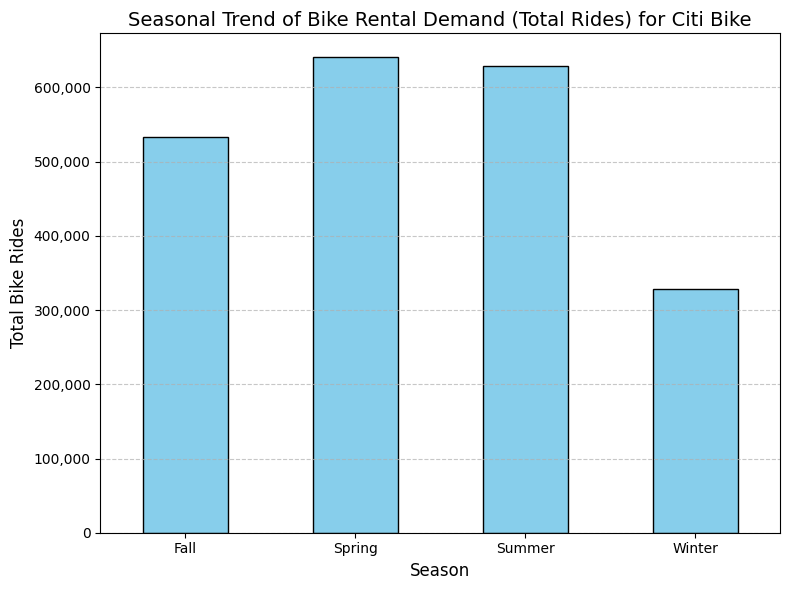

In [ ]:
# Seasonal trend of Bike Rental Demand for Citi Bike
citiBikeHourlyDataMerged['datetime'] = pd.to_datetime(citiBikeHourlyDataMerged['datetime'])
citiBikeHourlyDataMerged['month'] = citiBikeHourlyDataMerged['datetime'].dt.to_period('M')
monthly_data = citiBikeHourlyDataMerged.groupby('month')['total_demand'].sum().reset_index()
monthly_data['month'] = monthly_data['month'].dt.to_timestamp()
monthly_data['month_num'] = monthly_data['month'].dt.month
season_map = {
    12: 'Winter', 1: 'Winter', 2: 'Winter',
    3: 'Spring', 4: 'Spring', 5: 'Spring',
    6: 'Summer', 7: 'Summer', 8: 'Summer',
    9: 'Fall', 10: 'Fall', 11: 'Fall'
}

monthly_data['season'] = monthly_data['month_num'].map(season_map)
seasonal_total = monthly_data.groupby('season')['total_demand'].sum()
plt.figure(figsize=(8, 6))
seasonal_total.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Seasonal Trend of Bike Rental Demand (Total Rides) for Citi Bike', fontsize=14)
plt.xlabel('Season', fontsize=12)
plt.ylabel('Total Bike Rides', fontsize=12)
plt.gca().get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x):,}'))
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


The bar chart illustrates the seasonal trend of bike rental demand for Citi Bike. Bike rentals peak in the Spring, followed by summer and fall. Demand is lowest in the winter season. This suggests that favorable weather conditions significantly impact bike share usage.

In [ ]:
# citiBikeHourlyDataMerged['datetime'] = pd.to_datetime(citiBikeHourlyDataMerged['datetime'])
# capitalBikeshareHourlyDataMerged['datetime'] = pd.to_datetime(capitalBikeshareHourlyDataMerged['datetime'])

# Adding a 'month' column to find the seasons
citiBikeHourlyDataMerged['month'] = citiBikeHourlyDataMerged['datetime'].dt.month
capitalBikeshareHourlyDataMerged['month'] = capitalBikeshareHourlyDataMerged['datetime'].dt.month

# Defining spring (March-May) and summer (June-August)
spring_months = [3, 4, 5]
summer_months = [6, 7, 8]

# Filtering for spring and summer data
citibike_spring = citiBikeHourlyDataMerged[citiBikeHourlyDataMerged['month'].isin(spring_months)]
citibike_summer = citiBikeHourlyDataMerged[citiBikeHourlyDataMerged['month'].isin(summer_months)]
capitalbike_spring = capitalBikeshareHourlyDataMerged[capitalBikeshareHourlyDataMerged['month'].isin(spring_months)]
capitalbike_summer = capitalBikeshareHourlyDataMerged[capitalBikeshareHourlyDataMerged['month'].isin(summer_months)]

def calculate_temp_range(df, season):
    return {
        'season': season,
        'min_temp': df['humidity'].min(),
        'max_temp': df['humidity'].max()
    }

citibike_spring_range = calculate_temp_range(citibike_spring, 'Spring')
citibike_summer_range = calculate_temp_range(citibike_summer, 'Summer')
capitalbike_spring_range = calculate_temp_range(capitalbike_spring, 'Spring')
capitalbike_summer_range = calculate_temp_range(capitalbike_summer, 'Summer')

results = pd.DataFrame([
    {'System': 'Citibike', **citibike_spring_range},
    {'System': 'Citibike', **citibike_summer_range},
    {'System': 'Capital Bikeshare', **capitalbike_spring_range},
    {'System': 'Capital Bikeshare', **capitalbike_summer_range}
])

print(results)


              System  season  min_temp  max_temp
0           Citibike  Spring     11.68     96.87
1           Citibike  Summer     27.68     95.05
2  Capital Bikeshare  Spring     14.29     96.08
3  Capital Bikeshare  Summer     24.39     96.91


In [ ]:
citiBikeHourlyDataMerged['hour'] = citiBikeHourlyDataMerged['started_at_hour'].dt.hour
citiBikeHourlyDataMerged.head()

,started_at_hour,total_demand,name,datetime,temp,dew,humidity,precip,windspeed,solarradiation,conditions,hour,month
0,2023-04-01 00:00:00,118,"New York, NY, United States",2023-04-01 00:00:00,12.0,7.6,74.40,0.0,3.0,0,Overcast,0,4
1,2023-04-01 01:00:00,66,"New York, NY, United States",2023-04-01 01:00:00,13.2,7.9,70.22,0.0,9.5,0,Overcast,1,4
2,2023-04-01 02:00:00,62,"New York, NY, United States",2023-04-01 02:00:00,14.5,7.7,63.70,0.0,8.4,0,Overcast,2,4
3,2023-04-01 03:00:00,38,"New York, NY, United States",2023-04-01 03:00:00,15.3,9.0,65.84,0.0,11.7,0,Overcast,3,4
4,2023-04-01 04:00:00,16,"New York, NY, United States",2023-04-01 04:00:00,14.3,9.2,71.52,0.0,7.3,0,Overcast,4,4


# **Traditional Models**

# **CitiBike**

In [ ]:
citiBikeHourlyDataMerged['hour'] = citiBikeHourlyDataMerged['started_at_hour'].dt.hour
citiBikeHourlyDataMerged.head()


,started_at_hour,total_demand,name,datetime,temp,dew,humidity,precip,windspeed,solarradiation,conditions,hour,month
0,2023-04-01 00:00:00,118,"New York, NY, United States",2023-04-01 00:00:00,12.0,7.6,74.40,0.0,3.0,0,Overcast,0,4
1,2023-04-01 01:00:00,66,"New York, NY, United States",2023-04-01 01:00:00,13.2,7.9,70.22,0.0,9.5,0,Overcast,1,4
2,2023-04-01 02:00:00,62,"New York, NY, United States",2023-04-01 02:00:00,14.5,7.7,63.70,0.0,8.4,0,Overcast,2,4
3,2023-04-01 03:00:00,38,"New York, NY, United States",2023-04-01 03:00:00,15.3,9.0,65.84,0.0,11.7,0,Overcast,3,4
4,2023-04-01 04:00:00,16,"New York, NY, United States",2023-04-01 04:00:00,14.3,9.2,71.52,0.0,7.3,0,Overcast,4,4


## Linear Regression

### Model Performance Without Weather Features

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error


X = citiBikeHourlyDataMerged[['hour']]
y = citiBikeHourlyDataMerged['total_demand']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

modelLR = LinearRegression()

# Training the Model
modelLR.fit(X_train_scaled, y_train)

y_train_pred = modelLR.predict(X_train_scaled)
y_test_pred = modelLR.predict(X_test_scaled)

train_mse = mean_squared_error(y_train, y_train_pred)
train_mae = mean_absolute_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)

# Test data evaluation
test_mse = mean_squared_error(y_test, y_test_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)

# Calculating Adjusted R-squared for both train and test sets
n_train = len(y_train)
n_test = len(y_test)
p = X.shape[1]

# Adjusted R-squared calculation
train_adjusted_r2 = 1 - (1 - train_r2) * (n_train - 1) / (n_train - p - 1)
test_adjusted_r2 = 1 - (1 - test_r2) * (n_test - 1) / (n_test - p - 1)

print("\n Training Data")
print(f'Mean Squared Error (Train): {train_mse:.2f}')
print(f'Mean Absolute Error (Train): {train_mae:.2f}')
print(f'R-squared (Train): {train_r2:.2f}')
print(f'Adjusted R-squared (Train): {train_adjusted_r2:.2f}')

print("\n Testing Data ")
print(f'Mean Squared Error (Test): {test_mse:.2f}')
print(f'Mean Absolute Error (Test): {test_mae:.2f}')
print(f'R-squared (Test): {test_r2:.2f}')
print(f'Adjusted R-squared (Test): {test_adjusted_r2:.2f}')




The model's performance without weather features shows a Mean Squared Error of 29,893.21 and an R-squared of 0.20 on the training data, indicating limited explanatory power. On the testing data, the model achieves a similar Mean Squared Error of 30,026.18 and an R-squared of 0.16, reflecting consistent but low predictive performance.

### Model Performance With Weather Features

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns

X = citiBikeHourlyDataMerged[['hour', 'temp', 'humidity', 'solarradiation', 'dew', 'windspeed', 'precip']]
y = citiBikeHourlyDataMerged['total_demand']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

modelLR = LinearRegression()

# Training the Model
modelLR.fit(X_train_scaled, y_train)

y_train_pred = modelLR.predict(X_train_scaled)
y_test_pred = modelLR.predict(X_test_scaled)

train_mse = mean_squared_error(y_train, y_train_pred)
train_mae = mean_absolute_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)

# Test data evaluation
test_mse = mean_squared_error(y_test, y_test_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)

# Calculating Adjusted R-squared for both train and test sets
n_train = len(y_train)
n_test = len(y_test)
p = X.shape[1]

# Adjusted R-squared calculation
train_adjusted_r2 = 1 - (1 - train_r2) * (n_train - 1) / (n_train - p - 1)
test_adjusted_r2 = 1 - (1 - test_r2) * (n_test - 1) / (n_test - p - 1)

print("\n Training Data")
print(f'Mean Squared Error (Train): {train_mse:.2f}')
print(f'Mean Absolute Error (Train): {train_mae:.2f}')
print(f'R-squared (Train): {train_r2:.2f}')
print(f'Adjusted R-squared (Train): {train_adjusted_r2:.2f}')

print("\n Testing Data ")
print(f'Mean Squared Error (Test): {test_mse:.2f}')
print(f'Mean Absolute Error (Test): {test_mae:.2f}')
print(f'R-squared (Test): {test_r2:.2f}')
print(f'Adjusted R-squared (Test): {test_adjusted_r2:.2f}')

# Plotting Actual vs Predicted for Test Data
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_test_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.xlabel('Actual Number of Rides')
plt.ylabel('Predicted Number of Rides')
plt.title('Actual vs Predicted Number of Rides (Test Data)')
plt.show()


Incorporating weather features improved the model's performance, with the training data showing a reduced Mean Squared Error of 22,476.97 and an R-squared of 0.40. Similarly, the testing data achieved a Mean Squared Error of 22,600.24 and an R-squared of 0.37, indicating better predictive power compared to the model without weather features.

In [ ]:
# Predicting the demand on March 15, 2024
import numpy as np

march_15_data = citiBikeHourlyDataMerged[
    (citiBikeHourlyDataMerged['started_at_hour'].dt.date == pd.to_datetime('2024-03-15').date())
]

if not march_15_data.empty:
    X_march_15 = march_15_data[['hour', 'temp', 'humidity', 'solarradiation', 'dew', 'windspeed', 'precip']]

    # Scaling the features using the pre-fitted scaler
    X_march_15_scaled = scaler.transform(X_march_15)

    # Predicting the demand for all 24 hours on March 15, 2024 and round to integers
    predicted_demand_march_15 = np.round(modelLR.predict(X_march_15_scaled)).astype(int)

    # Retrieving the actual total demand for March 15, 2024
    actual_demand_march_15 = march_15_data['total_demand'].values

    # Comparing predicted and actual demands
    results_df = pd.DataFrame({
        'Hour': march_15_data['hour'],
        'Actual Demand': actual_demand_march_15,
        'Predicted Demand': predicted_demand_march_15
    })

    print(results_df)

    # Ploting actual vs predicted demand for March 15, 2024
    plt.figure(figsize=(10, 6))
    plt.plot(results_df['Hour'], results_df['Actual Demand'], label='Actual Demand', marker='o')
    plt.plot(results_df['Hour'], results_df['Predicted Demand'], label='Predicted Demand', marker='o', linestyle='--')
    plt.xlabel('Hour of the Day')
    plt.ylabel('Bike Demand')
    plt.title('Actual vs Predicted Bike Demand on 2024-03-15')
    plt.legend()
    plt.grid(True)
    plt.show()

else:
    print("Data for 2024-03-15 is not available in the dataset.")


The line graph compares the actual and predicted bike demand on March 15, 2024, across different hours of the day. The actual demand exhibits a clear peak in the late afternoon and evening hours, likely due to commuting and recreational activities. The predicted demand generally follows the same trend but underestimates the peak demand and overestimates demand during off-peak hours. This suggests that the model could be improved to better capture the specific patterns of bike usage throughout the day.

## KNN

### Model Performance Without Weather Features

In [ ]:
from sklearn.neighbors import KNeighborsRegressor


X = citiBikeHourlyDataMerged[['hour']]
y = citiBikeHourlyDataMerged['total_demand']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Building the KNN Model
knn_model = KNeighborsRegressor(n_neighbors=5)  # Using 5 nearest neighbors, we can adjust this
knn_model.fit(X_train_scaled, y_train)

# Making predictions for the Testing set
y_test_pred_knn = knn_model.predict(X_test_scaled)

# Evaluating the KNN Model on Testing Data
test_mse_knn = mean_squared_error(y_test, y_test_pred_knn)
test_mae_knn = mean_absolute_error(y_test, y_test_pred_knn)
test_r2_knn = r2_score(y_test, y_test_pred_knn)

print("\n KNN Testing Data Evaluation ")
print(f'KNN Mean Squared Error (Test): {test_mse_knn:.2f}')
print(f'KNN Mean Absolute Error (Test): {test_mae_knn:.2f}')
print(f'KNN R-squared (Test): {test_r2_knn:.2f}')



The KNN model without weather features achieved a Mean Squared Error of 18361.62 and a Mean Absolute Error of 92.66 on the testing data. It demonstrated a moderate predictive performance with an R-squared value of 0.49.








### Model Performance With Weather Features

In [ ]:
from sklearn.neighbors import KNeighborsRegressor


X = citiBikeHourlyDataMerged[['hour', 'temp', 'humidity', 'solarradiation', 'dew', 'windspeed', 'precip']]
y = citiBikeHourlyDataMerged['total_demand']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


knn_model = KNeighborsRegressor(n_neighbors=5)
knn_model.fit(X_train_scaled, y_train)


y_test_pred_knn = knn_model.predict(X_test_scaled)
test_mse_knn = mean_squared_error(y_test, y_test_pred_knn)
test_mae_knn = mean_absolute_error(y_test, y_test_pred_knn)
test_r2_knn = r2_score(y_test, y_test_pred_knn)


print("\n KNN Testing Data Evaluation ")
print(f'KNN Mean Squared Error (Test): {test_mse_knn:.2f}')
print(f'KNN Mean Absolute Error (Test): {test_mae_knn:.2f}')
print(f'KNN R-squared (Test): {test_r2_knn:.2f}')

# Plotting Actual vs Predicted for Testing Data
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_test_pred_knn)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.xlabel('Actual Number of Rides')
plt.ylabel('Predicted Number of Rides')
plt.title('KNN: Actual vs Predicted Number of Rides (Test Data)')
plt.show()


With the inclusion of weather features, the KNN model significantly improved its performance, achieving a reduced Mean Squared Error of 11155.56 and a Mean Absolute Error of 74.19 on the testing data. The R-squared value increased to 0.69, indicating a stronger predictive capability compared to the model without weather features.

In [ ]:
#Predicting the demand on March 15, 2024
march_15_data = citiBikeHourlyDataMerged[
    (citiBikeHourlyDataMerged['started_at_hour'].dt.date == pd.to_datetime('2024-03-15').date())
]


if not march_15_data.empty:

    X_march_15 = march_15_data[['hour', 'temp', 'humidity', 'solarradiation', 'dew', 'windspeed', 'precip']]
    X_march_15_scaled = scaler.transform(X_march_15)

    # Predicting the demand for all hours on March 15, 2024 using KNN and round to integers
    predicted_demand_march_15_knn = np.round(knn_model.predict(X_march_15_scaled)).astype(int)
    actual_demand_march_15 = march_15_data['total_demand'].values

    results_knn_df = pd.DataFrame({
        'Hour': march_15_data['hour'],
        'Actual Demand': actual_demand_march_15,
        'Predicted Demand (KNN)': predicted_demand_march_15_knn
    })

    print(results_knn_df)
    plt.figure(figsize=(10, 6))
    plt.plot(results_knn_df['Hour'], results_knn_df['Actual Demand'], label='Actual Demand', marker='o')
    plt.plot(results_knn_df['Hour'], results_knn_df['Predicted Demand (KNN)'], label='Predicted Demand (KNN)', marker='o', linestyle='--')
    plt.xlabel('Hour of the Day')
    plt.ylabel('Bike Demand')
    plt.title('KNN: Actual vs Predicted Bike Demand on 2024-03-15')
    plt.legend()
    plt.grid(True)
    plt.show()

else:
    print("Data for 2024-03-15 is not available in the dataset.")


The line graph compares the actual and predicted bike demand on March 15, 2024, across different hours of the day, using a KNN model. The actual demand exhibits a clear peak in the late afternoon and evening hours, likely due to commuting and recreational activities. The predicted demand generally follows the same trend but underestimates the peak demand and overestimates demand during off-peak hours. This suggests that the KNN model could be improved to better capture the specific patterns of bike usage throughout the day.

## SVR

### Model Performance Without Weather Features

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR



X = citiBikeHourlyDataMerged[['hour']]
y = citiBikeHourlyDataMerged['total_demand']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Setting up the parameter grid for GridSearchCV
param_grid = {
    'C': [1000],
    'gamma': [0.1],
    'kernel': ['rbf']
}

# Performing grid search with SVR
grid = GridSearchCV(SVR(), param_grid, refit=True, verbose=3)
grid.fit(X_train_scaled, y_train)

print("Best Parameters:", grid.best_params_)

# Making predictions
grid_prediction_test = grid.predict(X_test_scaled)
grid_prediction_train = grid.predict(X_train_scaled)

#Evaluating the model on the test set
mse_svr_test = mean_squared_error(y_test, grid_prediction_test)
mae_svr_test = mean_absolute_error(y_test, grid_prediction_test)
rmse_svr_test = mean_squared_error(y_test, grid_prediction_test, squared=False)
r2_svr_test = r2_score(y_test, grid_prediction_test)


print("\nSVR Test Metrics:")
print(f"Mean Squared Error: {mse_svr_test:.2f}")
print(f"Mean Absolute Error: {mae_svr_test:.2f}")
print(f"RMSE: {rmse_svr_test:.2f}")
print(f"R-squared: {r2_svr_test:.2f}")


mse_svr_train = mean_squared_error(y_train, grid_prediction_train)
mae_svr_train = mean_absolute_error(y_train, grid_prediction_train)
rmse_svr_train = mean_squared_error(y_train, grid_prediction_train, squared=False)
r2_svr_train = r2_score(y_train, grid_prediction_train)

print("\nSVR Train Metrics:")
print(f"Mean Squared Error: {mse_svr_train:.2f}")
print(f"Mean Absolute Error: {mae_svr_train:.2f}")
print(f"RMSE: {rmse_svr_train:.2f}")
print(f"R-squared: {r2_svr_train:.2f}")

The SVR model without weather features, using the best parameters (C=1000, gamma=0.1, kernel='rbf'), achieved an R-squared of 0.40 on the testing data with a Mean Squared Error of 22,236.38. On the training data, it performed slightly better with an R-squared of 0.43 and a Mean Squared Error of 21,033.84.

### Model Performance With Weather Features

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_squared_error


X = citiBikeHourlyDataMerged[['hour', 'temp', 'humidity', 'solarradiation', 'dew', 'windspeed', 'precip']]
y = citiBikeHourlyDataMerged['total_demand']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initializing the SVR model
citiBike_svr_model = SVR(kernel='rbf')

# Training the model
citiBike_svr_model.fit(X_train_scaled, y_train)

y_pred_svr_train = citiBike_svr_model.predict(X_train_scaled)
y_pred_svr_test = citiBike_svr_model.predict(X_test_scaled)


# Training metrics
mse_svr_train = mean_squared_error(y_train, y_pred_svr_train)
mae_svr_train = mean_absolute_error(y_train, y_pred_svr_train)
rmse_svr_train = mean_squared_error(y_train, y_pred_svr_train, squared=False)
r2_svr_train = r2_score(y_train, y_pred_svr_train)

# Testing metrics
mse_svr_test = mean_squared_error(y_test, y_pred_svr_test)
mae_svr_test = mean_absolute_error(y_test, y_pred_svr_test)
rmse_svr_test = mean_squared_error(y_test, y_pred_svr_test, squared=False)
r2_svr_test = r2_score(y_test, y_pred_svr_test)

print("SVR Training Metrics:")
print(f"Mean Squared Error: {mse_svr_train:.2f}")
print(f"Mean Absolute Error: {mae_svr_train:.2f}")
print(f"R-squared: {r2_svr_train:.2f}")
print(f"RMSE: {rmse_svr_train:.2f}")

print("\nSVR Testing Metrics:")
print(f"Mean Squared Error: {mse_svr_test:.2f}")
print(f"Mean Absolute Error: {mae_svr_test:.2f}")
print(f"R-squared: {r2_svr_test:.2f}")
print(f"RMSE: {rmse_svr_test:.2f}")


With the inclusion of weather features, the SVR model achieved an R-squared of 0.45 on the training data, with a Mean Squared Error of 20,397.60 and an RMSE of 142.82. On the testing data, the model had a slightly lower R-squared of 0.43, a Mean Squared Error of 21,027.68, and an RMSE of 145.01, indicating consistent performance across datasets.

In [ ]:
import numpy as np
# Predicting the demand on March 15, 2024
march_15_data = citiBikeHourlyDataMerged[
    (citiBikeHourlyDataMerged['started_at_hour'].dt.date == pd.to_datetime('2024-03-15').date())
]


if not march_15_data.empty:

    X_march_15 = march_15_data[['hour', 'temp', 'humidity', 'solarradiation', 'dew', 'windspeed', 'precip']]
    X_march_15_scaled = scaler.transform(X_march_15)

    predicted_demand_march_15_svr = np.round(citiBike_svr_model.predict(X_march_15_scaled)).astype(int)
    actual_demand_march_15 = march_15_data['total_demand'].values

    # Comparing predicted and actual demands
    results_svr_df = pd.DataFrame({
        'Hour': march_15_data['hour'],
        'Actual Demand': actual_demand_march_15,
        'Predicted Demand (SVR)': predicted_demand_march_15_svr
    })

    print(results_svr_df)

    # Plotting actual vs predicted demand for March 15, 2024
    plt.figure(figsize=(10, 6))
    plt.plot(results_svr_df['Hour'], results_svr_df['Actual Demand'], label='Actual Demand', marker='o')
    plt.plot(results_svr_df['Hour'], results_svr_df['Predicted Demand (SVR)'], label='Predicted Demand (SVR)', marker='o', linestyle='--')
    plt.xlabel('Hour of the Day')
    plt.ylabel('Bike Demand')
    plt.title('SVR: Actual vs Predicted Bike Demand on 2024-03-15')
    plt.legend()
    plt.grid(True)
    plt.show()

else:
    print("Data for 2024-03-15 is not available in the dataset.")


The predicted demand generally follows the same trend but underestimates the peak demand and overestimates demand during off-peak hours. This suggests that the SVR model could be improved to better capture the specific patterns of bike usage throughout the day.

### With Hyper Parameter Tuning

In [ ]:
from sklearn.model_selection import GridSearchCV


X = citiBikeHourlyDataMerged[['hour', 'temp', 'humidity', 'solarradiation', 'dew', 'windspeed', 'precip']]
y = citiBikeHourlyDataMerged['total_demand']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Setting up the parameter grid for GridSearchCV
param_grid = {
    'C': [1000],
    'gamma': [0.1],
    'kernel': ['rbf']
}

# Performing grid search with SVR
grid = GridSearchCV(SVR(), param_grid, refit=True, verbose=3)
grid.fit(X_train_scaled, y_train)


print("Best Parameters:", grid.best_params_)

# Making predictions
grid_prediction_test = grid.predict(X_test_scaled)
grid_prediction_train = grid.predict(X_train_scaled)

mse_svr_test = mean_squared_error(y_test, grid_prediction_test)
mae_svr_test = mean_absolute_error(y_test, grid_prediction_test)
rmse_svr_test = mean_squared_error(y_test, grid_prediction_test, squared=False)
r2_svr_test = r2_score(y_test, grid_prediction_test)


print("\nSVR Test Metrics:")
print(f"Mean Squared Error: {mse_svr_test:.2f}")
print(f"Mean Absolute Error: {mae_svr_test:.2f}")
print(f"RMSE: {rmse_svr_test:.2f}")
print(f"R-squared: {r2_svr_test:.2f}")

mse_svr_train = mean_squared_error(y_train, grid_prediction_train)
mae_svr_train = mean_absolute_error(y_train, grid_prediction_train)
rmse_svr_train = mean_squared_error(y_train, grid_prediction_train, squared=False)
r2_svr_train = r2_score(y_train, grid_prediction_train)

print("\nSVR Train Metrics:")
print(f"Mean Squared Error: {mse_svr_train:.2f}")
print(f"Mean Absolute Error: {mae_svr_train:.2f}")
print(f"RMSE: {rmse_svr_train:.2f}")
print(f"R-squared: {r2_svr_train:.2f}")

plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=grid_prediction_test)
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='--')
plt.xlabel('Actual Number of Rides')
plt.ylabel('Predicted Number of Rides')
plt.title('Actual vs Predicted Number of Rides (SVR)')
plt.show()


In [ ]:

march_15_data = citiBikeHourlyDataMerged[
    (citiBikeHourlyDataMerged['started_at_hour'].dt.date == pd.to_datetime('2024-03-15').date())
]


if not march_15_data.empty:
    X_march_15 = march_15_data[['hour', 'temp', 'humidity', 'solarradiation', 'dew', 'windspeed', 'precip']]
    X_march_15_scaled = scaler.transform(X_march_15)


    predicted_demand_march_15_svr = np.round(grid.predict(X_march_15_scaled)).astype(int)
    actual_demand_march_15 = march_15_data['total_demand'].values


    results_svr_df = pd.DataFrame({
        'Hour': march_15_data['hour'],
        'Actual Demand': actual_demand_march_15,
        'Predicted Demand (SVR)': predicted_demand_march_15_svr
    })

    print(results_svr_df)

    # Plot actual vs predicted demand for March 15, 2024 (SVR)
    plt.figure(figsize=(10, 6))
    plt.plot(results_svr_df['Hour'], results_svr_df['Actual Demand'], label='Actual Demand', marker='o')
    plt.plot(results_svr_df['Hour'], results_svr_df['Predicted Demand (SVR)'], label='Predicted Demand (SVR)', marker='o', linestyle='--')
    plt.xlabel('Hour of the Day')
    plt.ylabel('Bike Demand')
    plt.title('SVR: Actual vs Predicted Bike Demand on 2024-03-15')
    plt.legend()
    plt.grid(True)
    plt.show()

else:
    print("Data for 2024-03-15 is not available in the dataset.")


After Hyperparameter tuning, the predicted demand generally follows the same trend and captures the peak demand more accurately than the previous SVR model, suggesting that hyperparameter tuning has improved the model's performance.

## Decision Trees

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np


X = citiBikeHourlyDataMerged[['hour', 'temp', 'humidity', 'solarradiation', 'dew', 'windspeed', 'precip']]
y = citiBikeHourlyDataMerged['total_demand']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initializing Decision Tree Regressor with tuned hyperparameters
dt_model = DecisionTreeRegressor(
    max_depth=8,
    min_samples_split=10,
    min_samples_leaf=5,
    random_state=42
)


dt_model.fit(X_train_scaled, y_train)


y_pred_train = dt_model.predict(X_train_scaled)
y_pred_test = dt_model.predict(X_test_scaled)

# Recalculating evaluation metrics for training and test sets
mse_train = mean_squared_error(y_train, y_pred_train)
r2_train = r2_score(y_train, y_pred_train)
mae_train = mean_absolute_error(y_train, y_pred_train)

mse_test = mean_squared_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)
mae_test = mean_absolute_error(y_test, y_pred_test)

print("\nDecision Tree - Training Set Metrics:")
print(f"Mean Squared Error: {mse_train:.2f}")
print(f"Mean Absolute Error: {mae_train:.2f}")
print(f"R-squared: {r2_train:.2f}")

print("\nDecision Tree - Test Set Metrics:")
print(f"Mean Squared Error: {mse_test:.2f}")
print(f"Mean Absolute Error: {mae_test:.2f}")
print(f"R-squared: {r2_test:.2f}")

plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred_test)
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='--')
plt.xlabel('Actual Number of Rides')
plt.ylabel('Predicted Number of Rides')
plt.title('Actual vs Predicted Number of Rides (Decision Trees)')
plt.show()



In [ ]:

march_15_data = citiBikeHourlyDataMerged[
    (citiBikeHourlyDataMerged['started_at_hour'].dt.date == pd.to_datetime('2024-03-15').date())
]


if not march_15_data.empty:

    X_march_15 = march_15_data[['hour', 'temp', 'humidity', 'solarradiation', 'dew', 'windspeed', 'precip']]
    X_march_15_scaled = scaler.transform(X_march_15)


    predicted_demand_march_15_svr = np.round(dt_model.predict(X_march_15_scaled)).astype(int)
    actual_demand_march_15 = march_15_data['total_demand'].values

    # Comparing predicted and actual demands
    results_svr_df = pd.DataFrame({
        'Hour': march_15_data['hour'],
        'Actual Demand': actual_demand_march_15,
        'Predicted Demand (DT)': predicted_demand_march_15_svr
    })
    print(results_svr_df)

    plt.figure(figsize=(10, 6))
    plt.plot(results_svr_df['Hour'], results_svr_df['Actual Demand'], label='Actual Demand', marker='o')
    plt.plot(results_svr_df['Hour'], results_svr_df['Predicted Demand (DT)'], label='Predicted Demand (DT)', marker='o', linestyle='--')
    plt.xlabel('Hour of the Day')
    plt.ylabel('Bike Demand')
    plt.title('Decision  Trees: Actual vs Predicted Bike Demand on 2024-03-15')
    plt.legend()
    plt.grid(True)
    plt.show()

else:
    print("Data for 2024-03-15 is not available in the dataset.")


For Decision trees, the predicted demand generally follows the same trend and captures the peak demand more accurately than the previous SVR model, suggesting that the Decision Tree model performs well in capturing the specific patterns of bike usage throughout the day.

# **Capital Bikeshare**

In [ ]:
capitalBikeshareHourlyDataMerged['hour'] = capitalBikeshareHourlyDataMerged['started_at_hour'].dt.hour
capitalBikeshareHourlyDataMerged.head()

In [ ]:
capitalBikeshareHourlyDataMerged.tail()

In [ ]:
# Saving the DataFrame to a CSV file
capitalBikeshareHourlyDataMerged.to_csv('training_data.csv', index=False)


## Linear Regression

### Model Performance Without Weather Features

In [ ]:
X = capitalBikeshareHourlyDataMerged[['hour']]
y = capitalBikeshareHourlyDataMerged['total_demand']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

capital_modelLR = LinearRegression()

# Training the Model
capital_modelLR.fit(X_train_scaled, y_train)

y_train_pred = capital_modelLR.predict(X_train_scaled)
y_test_pred = capital_modelLR.predict(X_test_scaled)

train_mse = mean_squared_error(y_train, y_train_pred)
train_mae = mean_absolute_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)

# Test data evaluation
test_mse = mean_squared_error(y_test, y_test_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)

# Calculating Adjusted R-squared for both train and test sets
n_train = len(y_train)
n_test = len(y_test)
p = X.shape[1]

# Adjusted R-squared calculation
train_adjusted_r2 = 1 - (1 - train_r2) * (n_train - 1) / (n_train - p - 1)
test_adjusted_r2 = 1 - (1 - test_r2) * (n_test - 1) / (n_test - p - 1)

print("\n Training Data")
print(f'Mean Squared Error (Train): {train_mse:.2f}')
print(f'Mean Absolute Error (Train): {train_mae:.2f}')
print(f'R-squared (Train): {train_r2:.2f}')
print(f'Adjusted R-squared (Train): {train_adjusted_r2:.2f}')

print("\n Testing Data ")
print(f'Mean Squared Error (Test): {test_mse:.2f}')
print(f'Mean Absolute Error (Test): {test_mae:.2f}')
print(f'R-squared (Test): {test_r2:.2f}')
print(f'Adjusted R-squared (Test): {test_adjusted_r2:.2f}')


The Linear Regression model without weather features demonstrated limited explanatory power, with a low R-squared value on both training and testing datasets. While the model's performance was consistent across the datasets, the high error values suggest it struggles to capture the underlying patterns effectively. This highlights the need for additional or more relevant features to improve prediction accuracy.

### Model Performance With Weather Features

In [ ]:
X = capitalBikeshareHourlyDataMerged[[ 'hour','temp', 'humidity', 'solarradiation', 'dew', 'windspeed', 'precip']]
y = capitalBikeshareHourlyDataMerged['total_demand']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

capital_modelLR = LinearRegression()


capital_modelLR.fit(X_train_scaled, y_train)

y_train_pred = capital_modelLR.predict(X_train_scaled)
y_test_pred = capital_modelLR.predict(X_test_scaled)

train_mse = mean_squared_error(y_train, y_train_pred)
train_mae = mean_absolute_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)

test_mse = mean_squared_error(y_test, y_test_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)


n_train = len(y_train)
n_test = len(y_test)
p = X.shape[1]


train_adjusted_r2 = 1 - (1 - train_r2) * (n_train - 1) / (n_train - p - 1)
test_adjusted_r2 = 1 - (1 - test_r2) * (n_test - 1) / (n_test - p - 1)

print("\n Training Data")
print(f'Mean Squared Error (Train): {train_mse:.2f}')
print(f'Mean Absolute Error (Train): {train_mae:.2f}')
print(f'R-squared (Train): {train_r2:.2f}')
print(f'Adjusted R-squared (Train): {train_adjusted_r2:.2f}')

print("\n Testing Data ")
print(f'Mean Squared Error (Test): {test_mse:.2f}')
print(f'Mean Absolute Error (Test): {test_mae:.2f}')
print(f'R-squared (Test): {test_r2:.2f}')
print(f'Adjusted R-squared (Test): {test_adjusted_r2:.2f}')

plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_test_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.xlabel('Actual Number of Rides')
plt.ylabel('Predicted Number of Rides')
plt.title('Actual vs Predicted Number of Rides (Test Data)')
plt.show()


Incorporating weather features significantly improved the Linear Regression model's performance, with a noticeable increase in R-squared values on both training and testing datasets. The model demonstrated better predictive power and reduced error values compared to its performance without weather features. This highlights the importance of weather data in capturing key factors influencing the predictions.

In [ ]:
# Predicting the demand on March 15, 2024
march_15_data = capitalBikeshareHourlyDataMerged[
    (capitalBikeshareHourlyDataMerged['started_at_hour'].dt.date == pd.to_datetime('2024-03-15').date())
]


if not march_15_data.empty:

    X_march_15 = march_15_data[['hour', 'temp', 'humidity', 'solarradiation', 'dew', 'windspeed', 'precip']]
    X_march_15_scaled = scaler.transform(X_march_15)


    predicted_demand_march_15 = np.round(capital_modelLR.predict(X_march_15_scaled)).astype(int)
    actual_demand_march_15 = march_15_data['total_demand'].values

    # Comparing predicted and actual demands
    results_df = pd.DataFrame({
        'Hour': march_15_data['hour'],
        'Actual Demand': actual_demand_march_15,
        'Predicted Demand': predicted_demand_march_15
    })

    print(results_df)

    plt.figure(figsize=(10, 6))
    plt.plot(results_df['Hour'], results_df['Actual Demand'], label='Actual Demand', marker='o')
    plt.plot(results_df['Hour'], results_df['Predicted Demand'], label='Predicted Demand', marker='o', linestyle='--')
    plt.xlabel('Hour of the Day')
    plt.ylabel('Bike Demand')
    plt.title('Actual vs Predicted Bike Demand on 2024-03-15')
    plt.legend()
    plt.grid(True)
    plt.show()

else:
    print("Data for 2024-03-15 is not available in the dataset.")


The predicted demand generally follows the same trend but underestimates the peak demand and overestimates demand during off-peak hours. This suggests that the model could be improved to better capture the specific patterns of bike usage throughout the day.

## KNN

### Model Performance Without Weather Features

In [ ]:
from sklearn.neighbors import KNeighborsRegressor


X = capitalBikeshareHourlyDataMerged[['hour']]
y = capitalBikeshareHourlyDataMerged['total_demand']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Building the KNN Model
capital_knn_model = KNeighborsRegressor(n_neighbors=5)  # Using 5 nearest neighbors


capital_knn_model.fit(X_train_scaled, y_train)

# Making predictions for the Testing set
y_test_pred_knn = capital_knn_model.predict(X_test_scaled)

# Evaluateing the KNN Model on Testing Data
test_mse_knn = mean_squared_error(y_test, y_test_pred_knn)
test_mae_knn = mean_absolute_error(y_test, y_test_pred_knn)
test_r2_knn = r2_score(y_test, y_test_pred_knn)


print("\n KNN Testing Data Evaluation ")
print(f'KNN Mean Squared Error (Test): {test_mse_knn:.2f}')
print(f'KNN Mean Absolute Error (Test): {test_mae_knn:.2f}')
print(f'KNN R-squared (Test): {test_r2_knn:.2f}')


The KNN model without weather features showed moderate predictive performance on the testing data, achieving an R-squared of 0.59. While it captured some underlying patterns, the relatively high error values indicate room for improvement in prediction accuracy

### Model Performance With Weather Features

In [ ]:
from sklearn.neighbors import KNeighborsRegressor


X = capitalBikeshareHourlyDataMerged[['hour', 'temp', 'humidity', 'solarradiation', 'dew', 'windspeed', 'precip']]
y = capitalBikeshareHourlyDataMerged['total_demand']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

capital_knn_model = KNeighborsRegressor(n_neighbors=5)
capital_knn_model.fit(X_train_scaled, y_train)

y_test_pred_knn = capital_knn_model.predict(X_test_scaled)

test_mse_knn = mean_squared_error(y_test, y_test_pred_knn)
test_mae_knn = mean_absolute_error(y_test, y_test_pred_knn)
test_r2_knn = r2_score(y_test, y_test_pred_knn)


print("\n KNN Testing Data Evaluation ")
print(f'KNN Mean Squared Error (Test): {test_mse_knn:.2f}')
print(f'KNN Mean Absolute Error (Test): {test_mae_knn:.2f}')
print(f'KNN R-squared (Test): {test_r2_knn:.2f}')

plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_test_pred_knn)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.xlabel('Actual Number of Rides')
plt.ylabel('Predicted Number of Rides')
plt.title('KNN: Actual vs Predicted Number of Rides (Test Data)')
plt.show()


With the inclusion of weather features, the KNN model exhibited a significant improvement in predictive performance, achieving a higher R-squared value of 0.73 on the testing data. The reduction in error values further highlights the positive impact of incorporating weather data into the model.

In [ ]:
# Predicting the demand on March 15, 2024
march_15_data = capitalBikeshareHourlyDataMerged[
    (capitalBikeshareHourlyDataMerged['started_at_hour'].dt.date == pd.to_datetime('2024-03-15').date())
]


if not march_15_data.empty:
    X_march_15 = march_15_data[['hour', 'temp', 'humidity', 'solarradiation', 'dew', 'windspeed', 'precip']]
    X_march_15_scaled = scaler.transform(X_march_15)

    predicted_demand_march_15_knn = np.round(capital_knn_model.predict(X_march_15_scaled)).astype(int)
    actual_demand_march_15 = march_15_data['total_demand'].values

    # Comparing predicted and actual demands
    results_knn_df = pd.DataFrame({
        'Hour': march_15_data['hour'],
        'Actual Demand': actual_demand_march_15,
        'Predicted Demand (KNN)': predicted_demand_march_15_knn
    })

    print(results_knn_df)

    plt.figure(figsize=(10, 6))
    plt.plot(results_knn_df['Hour'], results_knn_df['Actual Demand'], label='Actual Demand', marker='o')
    plt.plot(results_knn_df['Hour'], results_knn_df['Predicted Demand (KNN)'], label='Predicted Demand (KNN)', marker='o', linestyle='--')
    plt.xlabel('Hour of the Day')
    plt.ylabel('Bike Demand')
    plt.title('KNN: Actual vs Predicted Bike Demand on 2024-03-15')
    plt.legend()
    plt.grid(True)
    plt.show()

else:
    print("Data for 2024-03-15 is not available in the dataset.")


## **SVR**

### Model Performance Without Weather Features

In [ ]:
from sklearn.model_selection import GridSearchCV

# Splitting dataset into features and target variable
X = capitalBikeshareHourlyDataMerged[['hour']]
y = capitalBikeshareHourlyDataMerged['total_demand']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Setting up the parameter grid for GridSearchCV
param_grid = {
    'C': [1000],
    'gamma': [0.1],
    'kernel': ['rbf']
}

# Performing grid search with SVR
grid = GridSearchCV(SVR(), param_grid, refit=True, verbose=3)
grid.fit(X_train_scaled, y_train)


print("Best Parameters:", grid.best_params_)

# Making predictions
grid_prediction_test = grid.predict(X_test_scaled)
grid_prediction_train = grid.predict(X_train_scaled)


mse_svr_test = mean_squared_error(y_test, grid_prediction_test)
mae_svr_test = mean_absolute_error(y_test, grid_prediction_test)
rmse_svr_test = mean_squared_error(y_test, grid_prediction_test, squared=False)
r2_svr_test = r2_score(y_test, grid_prediction_test)

print("\nSVR Test Metrics:")
print(f"Mean Squared Error: {mse_svr_test:.2f}")
print(f"Mean Absolute Error: {mae_svr_test:.2f}")
print(f"RMSE: {rmse_svr_test:.2f}")
print(f"R-squared: {r2_svr_test:.2f}")

# Evaluating the model on the training set
mse_svr_train = mean_squared_error(y_train, grid_prediction_train)
mae_svr_train = mean_absolute_error(y_train, grid_prediction_train)
rmse_svr_train = mean_squared_error(y_train, grid_prediction_train, squared=False)
r2_svr_train = r2_score(y_train, grid_prediction_train)

print("\nSVR Train Metrics:")
print(f"Mean Squared Error: {mse_svr_train:.2f}")
print(f"Mean Absolute Error: {mae_svr_train:.2f}")
print(f"RMSE: {rmse_svr_train:.2f}")
print(f"R-squared: {r2_svr_train:.2f}")

The SVR model without weather features, optimized with C=1000, gamma=0.1, and kernel='rbf', demonstrated moderate performance, achieving an R-squared of 0.52 on the training data. On the testing data, the model maintained similar performance with an R-squared of 0.51, though the relatively high error values suggest limited predictive accuracy. These results indicate the model captures some patterns but could benefit from additional features for improved precision.

### Model Performance With Weather Features

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_squared_error

# Splitting dataset into features and target variable
X = capitalBikeshareHourlyDataMerged[['hour', 'temp', 'humidity', 'solarradiation', 'dew', 'windspeed', 'precip']]
y = capitalBikeshareHourlyDataMerged['total_demand']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initializing the SVR model
capital_svr_model = SVR(kernel='rbf')

# Training the model
capital_svr_model.fit(X_train_scaled, y_train)

y_pred_svr_train = capital_svr_model.predict(X_train_scaled)
y_pred_svr_test = capital_svr_model.predict(X_test_scaled)

# Training metrics
mse_svr_train = mean_squared_error(y_train, y_pred_svr_train)
mae_svr_train = mean_absolute_error(y_train, y_pred_svr_train)
rmse_svr_train = mean_squared_error(y_train, y_pred_svr_train, squared=False)
r2_svr_train = r2_score(y_train, y_pred_svr_train)

# Testing metrics
mse_svr_test = mean_squared_error(y_test, y_pred_svr_test)
mae_svr_test = mean_absolute_error(y_test, y_pred_svr_test)
rmse_svr_test = mean_squared_error(y_test, y_pred_svr_test, squared=False)
r2_svr_test = r2_score(y_test, y_pred_svr_test)

print("SVR Training Metrics:")
print(f"Mean Squared Error: {mse_svr_train:.2f}")
print(f"Mean Absolute Error: {mae_svr_train:.2f}")
print(f"R-squared: {r2_svr_train:.2f}")
print(f"RMSE: {rmse_svr_train:.2f}")

print("\nSVR Testing Metrics:")
print(f"Mean Squared Error: {mse_svr_test:.2f}")
print(f"Mean Absolute Error: {mae_svr_test:.2f}")
print(f"R-squared: {r2_svr_test:.2f}")
print(f"RMSE: {rmse_svr_test:.2f}")


In [ ]:
# Predicting the demand on March 15, 2024
march_15_data = capitalBikeshareHourlyDataMerged[
    (capitalBikeshareHourlyDataMerged['started_at_hour'].dt.date == pd.to_datetime('2024-03-15').date())
]

if not march_15_data.empty:
    X_march_15 = march_15_data[['hour', 'temp', 'humidity', 'solarradiation', 'dew', 'windspeed', 'precip']]

    X_march_15_scaled = scaler.transform(X_march_15)

    # Predicting the demand for all 24 hours on March 15, 2024
    predicted_demand_march_15_svr = np.round(capital_svr_model.predict(X_march_15_scaled)).astype(int)

    actual_demand_march_15 = march_15_data['total_demand'].values

    # Comparing predicted and actual demands
    results_svr_df = pd.DataFrame({
        'Hour': march_15_data['hour'],
        'Actual Demand': actual_demand_march_15,
        'Predicted Demand (SVR)': predicted_demand_march_15_svr
    })
    print(results_svr_df)


    plt.figure(figsize=(10, 6))
    plt.plot(results_svr_df['Hour'], results_svr_df['Actual Demand'], label='Actual Demand', marker='o')
    plt.plot(results_svr_df['Hour'], results_svr_df['Predicted Demand (SVR)'], label='Predicted Demand (SVR)', marker='o', linestyle='--')
    plt.xlabel('Hour of the Day')
    plt.ylabel('Bike Demand')
    plt.title('SVR: Actual vs Predicted Bike Demand on 2024-03-15')
    plt.legend()
    plt.grid(True)
    plt.show()

else:
    print("Data for 2024-03-15 is not available in the dataset.")


### With Hyper parameter Tuning

In [ ]:
from sklearn.model_selection import GridSearchCV

# Splitting dataset into features and target variable
X = capitalBikeshareHourlyDataMerged[['hour', 'temp', 'humidity', 'solarradiation', 'dew', 'windspeed', 'precip']]
y = capitalBikeshareHourlyDataMerged['total_demand']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Setting up the parameter grid for GridSearchCV
param_grid = {
    'C': [1000],
    'gamma': [0.1],
    'kernel': ['rbf']
}

# Performing grid search with SVR
grid = GridSearchCV(SVR(), param_grid, refit=True, verbose=3)
grid.fit(X_train_scaled, y_train)


print("Best Parameters:", grid.best_params_)

# Making predictions
grid_prediction_test = grid.predict(X_test_scaled)
grid_prediction_train = grid.predict(X_train_scaled)

mse_svr_test = mean_squared_error(y_test, grid_prediction_test)
mae_svr_test = mean_absolute_error(y_test, grid_prediction_test)
rmse_svr_test = mean_squared_error(y_test, grid_prediction_test, squared=False)
r2_svr_test = r2_score(y_test, grid_prediction_test)


print("\nSVR Test Metrics:")
print(f"Mean Squared Error: {mse_svr_test:.2f}")
print(f"Mean Absolute Error: {mae_svr_test:.2f}")
print(f"RMSE: {rmse_svr_test:.2f}")
print(f"R-squared: {r2_svr_test:.2f}")


mse_svr_train = mean_squared_error(y_train, grid_prediction_train)
mae_svr_train = mean_absolute_error(y_train, grid_prediction_train)
rmse_svr_train = mean_squared_error(y_train, grid_prediction_train, squared=False)
r2_svr_train = r2_score(y_train, grid_prediction_train)

print("\nSVR Train Metrics:")
print(f"Mean Squared Error: {mse_svr_train:.2f}")
print(f"Mean Absolute Error: {mae_svr_train:.2f}")
print(f"RMSE: {rmse_svr_train:.2f}")
print(f"R-squared: {r2_svr_train:.2f}")

plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=grid_prediction_test)
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='--')
plt.xlabel('Actual Number of Rides')
plt.ylabel('Predicted Number of Rides')
plt.title('Actual vs Predicted Number of Rides (SVR)')
plt.show()


With weather features included, the SVR model, optimized using C=1000, gamma=0.1, and kernel='rbf', showed a substantial improvement in performance. The model achieved an R-squared of 0.73 on the training data and 0.71 on the testing data, indicating strong predictive capability. The significant reduction in error metrics further highlights the value of incorporating weather data in enhancing model accuracy.








In [ ]:
# Predicting the demad on March 15, 2024
march_15_data = capitalBikeshareHourlyDataMerged[
    (capitalBikeshareHourlyDataMerged['started_at_hour'].dt.date == pd.to_datetime('2024-03-15').date())
]


if not march_15_data.empty:
    X_march_15 = march_15_data[['hour', 'temp', 'humidity', 'solarradiation', 'dew', 'windspeed', 'precip']]


    X_march_15_scaled = scaler.transform(X_march_15)
    predicted_demand_march_15_svr = np.round(grid.predict(X_march_15_scaled)).astype(int)

    actual_demand_march_15 = march_15_data['total_demand'].values

    # Comparing predicted and actual demands
    results_svr_df = pd.DataFrame({
        'Hour': march_15_data['hour'],
        'Actual Demand': actual_demand_march_15,
        'Predicted Demand (SVR)': predicted_demand_march_15_svr
    })

    print(results_svr_df)

    plt.figure(figsize=(10, 6))
    plt.plot(results_svr_df['Hour'], results_svr_df['Actual Demand'], label='Actual Demand', marker='o')
    plt.plot(results_svr_df['Hour'], results_svr_df['Predicted Demand (SVR)'], label='Predicted Demand (SVR)', marker='o', linestyle='--')
    plt.xlabel('Hour of the Day')
    plt.ylabel('Bike Demand')
    plt.title('SVR: Actual vs Predicted Bike Demand on 2024-03-15')
    plt.legend()
    plt.grid(True)
    plt.show()

else:
    print("Data for 2024-03-15 is not available in the dataset.")


## Decision Trees

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

X = capitalBikeshareHourlyDataMerged[['hour', 'temp', 'humidity', 'solarradiation', 'dew', 'windspeed', 'precip']]
y = capitalBikeshareHourlyDataMerged['total_demand']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initializing Decision Tree Regressor with tuned hyperparameters
dt_model = DecisionTreeRegressor(
    max_depth=10,
    min_samples_split=10,
    min_samples_leaf=5,
    random_state=42
)


dt_model.fit(X_train_scaled, y_train)

# Making predictions
y_pred_train = dt_model.predict(X_train_scaled)
y_pred_test = dt_model.predict(X_test_scaled)

# Recalculating evaluation metrics for training and test sets
mse_train = mean_squared_error(y_train, y_pred_train)
r2_train = r2_score(y_train, y_pred_train)
mae_train = mean_absolute_error(y_train, y_pred_train)

mse_test = mean_squared_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)
mae_test = mean_absolute_error(y_test, y_pred_test)

print("\nDecision Tree - Training Set Metrics:")
print(f"Mean Squared Error: {mse_train:.2f}")
print(f"Mean Absolute Error: {mae_train:.2f}")
print(f"R-squared: {r2_train:.2f}")

print("\nDecision Tree - Test Set Metrics:")
print(f"Mean Squared Error: {mse_test:.2f}")
print(f"Mean Absolute Error: {mae_test:.2f}")
print(f"R-squared: {r2_test:.2f}")


plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred_test)
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='--')
plt.xlabel('Actual Number of Rides')
plt.ylabel('Predicted Number of Rides')
plt.title('Actual vs Predicted Number of Rides (SVR)')
plt.show()



In [ ]:
#Predicting demand on March 15, 2024
march_15_data = capitalBikeshareHourlyDataMerged[
    (capitalBikeshareHourlyDataMerged['started_at_hour'].dt.date == pd.to_datetime('2024-03-15').date())
]

if not march_15_data.empty:

    X_march_15 = march_15_data[['hour', 'temp', 'humidity', 'solarradiation', 'dew', 'windspeed', 'precip']]
    X_march_15_scaled = scaler.transform(X_march_15)

    # Predicting the demand for all 24 hours on March 15, 2024
    predicted_demand_march_15_svr = np.round(dt_model.predict(X_march_15_scaled)).astype(int)


    actual_demand_march_15 = march_15_data['total_demand'].values

    # Comparing predicted and actual demands
    results_svr_df = pd.DataFrame({
        'Hour': march_15_data['hour'],
        'Actual Demand': actual_demand_march_15,
        'Predicted Demand (DT)': predicted_demand_march_15_svr
    })
    print(results_svr_df)

    plt.figure(figsize=(10, 6))
    plt.plot(results_svr_df['Hour'], results_svr_df['Actual Demand'], label='Actual Demand', marker='o')
    plt.plot(results_svr_df['Hour'], results_svr_df['Predicted Demand (DT)'], label='Predicted Demand (DT)', marker='o', linestyle='--')
    plt.xlabel('Hour of the Day')
    plt.ylabel('Bike Demand')
    plt.title('DT: Actual vs Predicted Bike Demand on 2024-03-15')
    plt.legend()
    plt.grid(True)
    plt.show()

else:
    print("Data for 2024-03-15 is not available in the dataset.")


# <h1><b>Ensemble Techniques</b></h1>

# **CitiBike**

In [ ]:
from sklearn.ensemble import BaggingRegressor

X = citiBikeHourlyDataMerged[['hour', 'temp', 'humidity', 'solarradiation', 'dew', 'windspeed', 'precip']]
y = citiBikeHourlyDataMerged['total_demand']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## *Bagging- CitiBike*

### Linear Regression Bagging

In [ ]:
# Applied bagging on our base model Linear Regression
base_lr = LinearRegression()
bagging_lr_model = BaggingRegressor(estimator=base_lr, n_estimators=50, random_state=42)

bagging_lr_model.fit(X_train_scaled, y_train)

y_train_pred_bagging = bagging_lr_model.predict(X_train_scaled)
y_test_pred_bagging = bagging_lr_model.predict(X_test_scaled)

test_mse_bagging_lr = mean_squared_error(y_test, y_test_pred_bagging)
test_mae_bagging_lr = mean_absolute_error(y_test, y_test_pred_bagging)
test_r2_bagging_lr = r2_score(y_test, y_test_pred_bagging)

print("\nBagging LR Testing Data Evaluation")
print(f'Bagging LR Mean Squared Error (Test): {test_mse_bagging_lr:.2f}')
print(f'Bagging LR Mean Absolute Error (Test): {test_mae_bagging_lr:.2f}')
print(f'Bagging LR R-squared (Test): {test_r2_bagging_lr:.2f}')

train_mse_bagging_lr = mean_squared_error(y_train, y_train_pred_bagging)
train_mae_bagging_lr = mean_absolute_error(y_train, y_train_pred_bagging)
train_r2_bagging_lr = r2_score(y_train, y_train_pred_bagging)

print("\nBagging LR Training Data Evaluation")
print(f'Bagging LR Mean Squared Error (Train): {train_mse_bagging_lr:.2f}')
print(f'Bagging LR Mean Absolute Error (Train): {train_mae_bagging_lr:.2f}')
print(f'Bagging LR R-squared (Train): {train_r2_bagging_lr:.2f}')

plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_test_pred_bagging)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.xlabel('Actual Number of Rides')
plt.ylabel('Predicted Number of Rides')
plt.title('Bagging LR: Actual vs Predicted Number of Rides (Test Data)')
plt.show()

After applying bagging to the Linear Regression model, there was no significant improvement in performance. The R-squared values remained similar, with 0.40 on the training data and 0.37 on the testing data, indicating that bagging did not notably enhance the model's ability to capture the underlying patterns in the data. The error metrics also remained comparable, suggesting that bagging had little impact on model performance in this case.

### KNN Bagging

In [ ]:
# Applied bagging on our base model KNN
from sklearn.neighbors import KNeighborsRegressor

base_knn = KNeighborsRegressor(n_neighbors=5)
bagging_knn_model = BaggingRegressor(estimator=base_knn, n_estimators=50, random_state=42)

bagging_knn_model.fit(X_train_scaled, y_train)
y_test_pred_bagging = bagging_knn_model.predict(X_test_scaled)

test_mse_bagging_knn = mean_squared_error(y_test, y_test_pred_bagging)
test_mae_bagging_knn = mean_absolute_error(y_test, y_test_pred_bagging)
test_r2_bagging_knn = r2_score(y_test, y_test_pred_bagging)

print(f"Bagging KNN Testing Data Evaluation ")
print(f'Bagging KNN Mean Squared Error (Test): {test_mse_bagging_knn:.2f}')
print(f'Bagging KNN Mean Absolute Error (Test): {test_mae_bagging_knn:.2f}')
print(f'Bagging KNN R-squared (Test): {test_r2_bagging_knn:.2f}')

plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_test_pred_bagging)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.xlabel('Actual Number of Rides')
plt.ylabel('Predicted Number of Rides')
plt.title('Bagging KNN: Actual vs Predicted Number of Rides (Test Data)')
plt.show()

After applying bagging to the KNN model, there was no significant improvement in performance. The R-squared value on the testing data remained at 0.70, with error metrics similar to those observed before bagging. This suggests that bagging did not lead to a substantial change in the model's predictive ability.

### SVR Bagging

In [ ]:
# Applied bagging on our base model SVR

from sklearn.svm import SVR

base_svr = SVR(C=100, gamma=0.1)
bagging_svr_model = BaggingRegressor(estimator=base_svr, n_estimators=50, random_state=42)

bagging_svr_model.fit(X_train_scaled, y_train)

y_train_pred_bagging = bagging_svr_model.predict(X_train_scaled)
y_test_pred_bagging = bagging_svr_model.predict(X_test_scaled)

test_mse_bagging_svr = mean_squared_error(y_test, y_test_pred_bagging)
test_mae_bagging_svr = mean_absolute_error(y_test, y_test_pred_bagging)
test_r2_bagging_svr = r2_score(y_test, y_test_pred_bagging)

print("\nBagging SVR Testing Data Evaluation")
print(f'Bagging SVR Mean Squared Error (Test): {test_mse_bagging_svr:.2f}')
print(f'Bagging SVR Mean Absolute Error (Test): {test_mae_bagging_svr:.2f}')
print(f'Bagging SVR R-squared (Test): {test_r2_bagging_svr:.2f}')

train_mse_bagging_svr = mean_squared_error(y_train, y_train_pred_bagging)
train_mae_bagging_svr = mean_absolute_error(y_train, y_train_pred_bagging)
train_r2_bagging_svr = r2_score(y_train, y_train_pred_bagging)

print("\nBagging SVR Training Data Evaluation")
print(f'Bagging SVR Mean Squared Error (Train): {train_mse_bagging_svr:.2f}')
print(f'Bagging SVR Mean Absolute Error (Train): {train_mae_bagging_svr:.2f}')
print(f'Bagging SVR R-squared (Train): {train_r2_bagging_svr:.2f}')

plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_test_pred_bagging)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.xlabel('Actual Number of Rides')
plt.ylabel('Predicted Number of Rides')
plt.title('Bagging SVR: Actual vs Predicted Number of Rides (Test Data)')
plt.show()


After applying bagging to the SVR model, there was no significant improvement in performance. The R-squared values on the training and testing data remained similar at 0.64 and 0.61, respectively, with error metrics showing only slight differences. This suggests that bagging did not lead to a substantial enhancement in the model's predictive accuracy.

In [ ]:
# Predicting the demand on March 15, 2024
march_15_data = citiBikeHourlyDataMerged[
    (citiBikeHourlyDataMerged['started_at_hour'].dt.date == pd.to_datetime('2024-03-15').date())
]
if not march_15_data.empty:
    X_march_15 = march_15_data[['hour', 'temp', 'humidity', 'solarradiation', 'dew', 'windspeed', 'precip']]
    X_march_15_scaled = scaler.transform(X_march_15)
    predicted_demand_march_15_svr = np.round(bagging_svr_model.predict(X_march_15_scaled)).astype(int)
    actual_demand_march_15 = march_15_data['total_demand'].values
    results_svr_df = pd.DataFrame({
        'Hour': march_15_data['hour'],
        'Actual Demand': actual_demand_march_15,
        'Predicted Demand (SVR)': predicted_demand_march_15_svr
    })
    print(results_svr_df)
    plt.figure(figsize=(10, 6))
    plt.plot(results_svr_df['Hour'], results_svr_df['Actual Demand'], label='Actual Demand', marker='o')
    plt.plot(results_svr_df['Hour'], results_svr_df['Predicted Demand (SVR)'], label='Predicted Demand (SVR)', marker='o', linestyle='--')
    plt.xlabel('Hour of the Day')
    plt.ylabel('Bike Demand')
    plt.title('SVR (Bagging): Actual vs Predicted Bike Demand on 2024-03-15 (Citibike)')
    plt.legend()
    plt.grid(True)
    plt.show()

else:
    print("Data for 2024-03-15 is not available in the dataset.")

## Decision Tree Bagging

In [ ]:
# Applied bagging on Decision Trees
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


X = citiBikeHourlyDataMerged[['hour', 'temp', 'humidity', 'solarradiation', 'dew', 'windspeed', 'precip']]
y = citiBikeHourlyDataMerged['total_demand']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Creating a Bagging Regressor with Decision Tree as the base estimator
base_dt = DecisionTreeRegressor(max_depth=7, random_state=42)
bagging_dt_model = BaggingRegressor(estimator=base_dt, n_estimators=50, random_state=42)


bagging_dt_model.fit(X_train_scaled, y_train)

y_train_pred_bagging = bagging_dt_model.predict(X_train_scaled)
y_test_pred_bagging = bagging_dt_model.predict(X_test_scaled)

train_mse_bagging = mean_squared_error(y_train, y_train_pred_bagging)
train_mae_bagging = mean_absolute_error(y_train, y_train_pred_bagging)
train_r2_bagging = r2_score(y_train, y_train_pred_bagging)

test_mse_bagging = mean_squared_error(y_test, y_test_pred_bagging)
test_mae_bagging = mean_absolute_error(y_test, y_test_pred_bagging)
test_r2_bagging = r2_score(y_test, y_test_pred_bagging)

# Calculating Adjusted R-squared for both train and test sets
n_train = len(y_train)
n_test = len(y_test)
p = X.shape[1]

train_adjusted_r2_bagging = 1 - (1 - train_r2_bagging) * (n_train - 1) / (n_train - p - 1)
test_adjusted_r2_bagging = 1 - (1 - test_r2_bagging) * (n_test - 1) / (n_test - p - 1)


print("\n Training Data (Bagging Decision Tree)")
print(f'Mean Squared Error (Train): {train_mse_bagging:.2f}')
print(f'Mean Absolute Error (Train): {train_mae_bagging:.2f}')
print(f'R-squared (Train): {train_r2_bagging:.2f}')
print(f'Adjusted R-squared (Train): {train_adjusted_r2_bagging:.2f}')

print("\n Testing Data (Bagging Decision Tree)")
print(f'Mean Squared Error (Test): {test_mse_bagging:.2f}')
print(f'Mean Absolute Error (Test): {test_mae_bagging:.2f}')
print(f'R-squared (Test): {test_r2_bagging:.2f}')
print(f'Adjusted R-squared (Test): {test_adjusted_r2_bagging:.2f}')

plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_test_pred_bagging)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.xlabel('Actual Number of Rides')
plt.ylabel('Predicted Number of Rides')
plt.title('Bagging Decision Tree: Actual vs Predicted Number of Rides (Test Data)')
plt.show()



Applying bagging to the Decision Tree model proved to be beneficial, as it resulted in improved stability and reduced variance in predictions. The model showed consistent performance, with an R-squared of 0.78 on the training data and 0.76 on the testing data, indicating that bagging helped maintain high predictive accuracy while reducing overfitting. The slight improvement in performance on the testing data demonstrates the usefulness of bagging in enhancing Decision Tree models.

## Random Forest Bagging

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [200],
    'max_depth': [8]
}

grid_search_rf = GridSearchCV(
    estimator=RandomForestRegressor(random_state=42, bootstrap=True),
    param_grid=param_grid,
    cv=5,
    n_jobs=-1,
    verbose=3,
    scoring='neg_mean_squared_error'
)
grid_search_rf.fit(X_train_scaled, y_train)

print("Best Hyperparameters:", grid_search_rf.best_params_)

y_pred_test = grid_search_rf.predict(X_test_scaled)
y_pred_train = grid_search_rf.predict(X_train_scaled)


mse_rf_test = mean_squared_error(y_test, y_pred_test)
mae_rf_test = mean_absolute_error(y_test, y_pred_test)
rmse_rf_test = mean_squared_error(y_test, y_pred_test, squared=False)
r2_rf_test = r2_score(y_test, y_pred_test)

print("\nRandom Forest Test Metrics:")
print(f"Mean Squared Error: {mse_rf_test:.2f}")
print(f"Mean Absolute Error: {mae_rf_test:.2f}")
print(f"RMSE: {rmse_rf_test:.2f}")
print(f"R-squared: {r2_rf_test:.2f}")

mse_rf_train = mean_squared_error(y_train, y_pred_train)
mae_rf_train = mean_absolute_error(y_train, y_pred_train)
rmse_rf_train = mean_squared_error(y_train, y_pred_train, squared=False)
r2_rf_train = r2_score(y_train, y_pred_train)

print("\nRandom Forest Train Metrics:")
print(f"Mean Squared Error: {mse_rf_train:.2f}")
print(f"Mean Absolute Error: {mae_rf_train:.2f}")
print(f"RMSE: {rmse_rf_train:.2f}")
print(f"R-squared: {r2_rf_train:.2f}")

plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred_test)
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='--')
plt.xlabel('Actual Number of Rides')
plt.ylabel('Predicted Number of Rides')
plt.title('Actual vs Predicted Number of Rides (Random Forest)')
plt.show()


Bagging proved to be beneficial for the Random Forest model as well, resulting in enhanced stability and performance. The model, with the best hyperparameters of max_depth=8 and n_estimators=200, achieved an R-squared of 0.81 on the training data and 0.78 on the testing data, demonstrating the model's ability to generalize well and maintain high accuracy. Bagging helped reduce overfitting while preserving strong predictive capabilities.

In [ ]:
# Extracting data for March 15, 2024
march_15_data = citiBikeHourlyDataMerged[
    (citiBikeHourlyDataMerged['started_at_hour'].dt.date == pd.to_datetime('2024-03-15').date())
]

if not march_15_data.empty:
    # Select features for prediction
    X_march_15 = march_15_data[['hour', 'temp', 'humidity', 'solarradiation', 'dew', 'windspeed', 'precip']]

    # Scale the data using the same scaler applied to training data
    X_march_15_scaled = scaler.transform(X_march_15)

    # Make predictions using the trained Random Forest model
    predicted_demand_march_15_rf = np.round(grid_search_rf.predict(X_march_15_scaled)).astype(int)

    # Get the actual demand values
    actual_demand_march_15 = march_15_data['total_demand'].values

    # Create a DataFrame to compare actual vs predicted demand
    results_rf_df = pd.DataFrame({
        'Hour': march_15_data['hour'],
        'Actual Demand': actual_demand_march_15,
        'Predicted Demand (Random Forest)': predicted_demand_march_15_rf
    })

    # Print the results
    print(results_rf_df)

    # Plot the actual vs predicted demand
    plt.figure(figsize=(10, 6))
    plt.plot(results_rf_df['Hour'], results_rf_df['Actual Demand'], label='Actual Demand', marker='o')
    plt.plot(results_rf_df['Hour'], results_rf_df['Predicted Demand (Random Forest)'], label='Predicted Demand', marker='o', linestyle='--')
    plt.xlabel('Hour of the Day')
    plt.ylabel('Bike Demand')
    plt.title('Random Forest: Actual vs Predicted Bike Demand on 2024-03-15 (CitiBike)')
    plt.legend()
    plt.grid(True)
    plt.show()

else:
    print("Data for 2024-03-15 is not available in the dataset.")


## *Boosting Techniques- CitiBike*

### AdaBoost

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor

# Define parameter grid
param_grid = {
    'estimator__max_depth': [1, 3, 5, 7],
    'n_estimators': [50, 100, 150, 200, 250],
    'learning_rate': [0.01, 0.02, 0.05, 0.1, 0.15]
}

# Create AdaBoost model
ada_boost = AdaBoostRegressor(estimator=DecisionTreeRegressor(), random_state=42)

# Initialize GridSearchCV with cross-validation
grid_search = GridSearchCV(estimator=ada_boost, param_grid=param_grid, cv=3, scoring='r2', n_jobs=-1)

# Fit to find the best parameters
grid_search.fit(X_train_scaled, y_train)

# Display best parameters
print("Best Parameters:", grid_search.best_params_)




In [ ]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor


# Building the AdaBoost model
ada_boost = AdaBoostRegressor(estimator=DecisionTreeRegressor(max_depth=7), n_estimators=200, random_state=42, learning_rate=0.01)
ada_boost.fit(X_train_scaled, y_train)

# Making predictions
y_pred_test = ada_boost.predict(X_test_scaled)
y_pred_train = ada_boost.predict(X_train_scaled)

# Calculating evaluation metrics for the test set
mse_ada_test = mean_squared_error(y_test, y_pred_test)
mae_ada_test = mean_absolute_error(y_test, y_pred_test)
r2_ada_test = r2_score(y_test, y_pred_test)


print("AdaBoost Regressor - Test Set Metrics:")
print(f"Mean Squared Error: {mse_ada_test:.2f}")
print(f"Mean Absolute Error: {mae_ada_test:.2f}")
print(f"R-squared: {r2_ada_test:.2f}")

# Calculating evaluation metrics for the training set
mse_ada_train = mean_squared_error(y_train, y_pred_train)
mae_ada_train = mean_absolute_error(y_train, y_pred_train)
r2_ada_train = r2_score(y_train, y_pred_train)


print("\nAdaBoost Regressor - Training Set Metrics:")
print(f"Mean Squared Error: {mse_ada_train:.2f}")
print(f"Mean Absolute Error: {mae_ada_train:.2f}")
print(f"R-squared: {r2_ada_train:.2f}")

# Scatter plot for actual vs predicted values
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred_test)
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='--')
plt.xlabel('Actual Number of Rides')
plt.ylabel('Predicted Number of Rides')
plt.title('AdaBoost Regressor: Actual vs Predicted Number of Rides (Test Data)')
plt.show()


The AdaBoost Regressor model demonstrated strong performance, with an R-squared of 0.80 on the training data and 0.77 on the testing data. The model was able to generalize well, with error metrics showing only slight differences between the training and testing sets, indicating minimal overfitting. AdaBoost effectively improved predictive accuracy, making it a reliable choice for this task.

In [ ]:
#Predicting the demand on March 15, 2024
march_15_data = citiBikeHourlyDataMerged[
    (citiBikeHourlyDataMerged['started_at_hour'].dt.date == pd.to_datetime('2024-03-15').date())
]
if not march_15_data.empty:
    X_march_15 = march_15_data[['hour', 'temp', 'humidity', 'solarradiation', 'dew', 'windspeed', 'precip']]
    X_march_15_scaled = scaler.transform(X_march_15)
    predicted_demand_march_15_svr = np.round(ada_boost.predict(X_march_15_scaled)).astype(int)
    actual_demand_march_15 = march_15_data['total_demand'].values
    results_svr_df = pd.DataFrame({
        'Hour': march_15_data['hour'],
        'Actual Demand': actual_demand_march_15,
        'Predicted Demand (adaboost)': predicted_demand_march_15_svr
    })
    print(results_svr_df)
    plt.figure(figsize=(10, 6))
    plt.plot(results_svr_df['Hour'], results_svr_df['Actual Demand'], label='Actual Demand', marker='o')
    plt.plot(results_svr_df['Hour'], results_svr_df['Predicted Demand (adaboost)'], label='Predicted Demand (adaboost)', marker='o', linestyle='--')
    plt.xlabel('Hour of the Day')
    plt.ylabel('Bike Demand')
    plt.title('adaboost: Actual vs Predicted Bike Demand on 2024-03-15')
    plt.legend()
    plt.grid(True)
    plt.show()

else:
    print("Data for 2024-03-15 is not available in the dataset.")


### Gradient Boosting

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

gb_model = GradientBoostingRegressor(n_estimators=200, learning_rate=0.1, max_depth = 3, random_state=42)
gb_model.fit(X_train_scaled, y_train)

y_pred_test = gb_model.predict(X_test_scaled)
y_pred_train = gb_model.predict(X_train_scaled)

mse_gb_train = mean_squared_error(y_train, y_pred_train)
mae_gb_train = mean_absolute_error(y_train, y_pred_train)
rmse_gb_train = np.sqrt(mse_gb_train)
r2_gb_train = r2_score(y_train, y_pred_train)

print("\nGradient Boosting Regressor - Training Set Metrics:")
print(f"Mean Squared Error: {mse_gb_train:.2f}")
print(f"Mean Absolute Error: {mae_gb_train:.2f}")
print(f"Root Mean Squared Error: {rmse_gb_train:.2f}")
print(f"R-squared: {r2_gb_train:.2f}")

mse_gb_test = mean_squared_error(y_test, y_pred_test)
mae_gb_test = mean_absolute_error(y_test, y_pred_test)
rmse_gb_test = np.sqrt(mse_gb_test)
r2_gb_test = r2_score(y_test, y_pred_test)

print("Gradient Boosting Regressor - Test Set Metrics:")
print(f"Mean Squared Error: {mse_gb_test:.2f}")
print(f"Mean Absolute Error: {mae_gb_test:.2f}")
print(f"Root Mean Squared Error: {rmse_gb_test:.2f}")
print(f"R-squared: {r2_gb_test:.2f}")




The Gradient Boosting Regressor showed strong performance, with an R-squared of 0.81 on the training data and 0.79 on the testing data, demonstrating its ability to generalize well. The model's error metrics were consistent between the training and testing sets, with minimal overfitting. Overall, Gradient Boosting effectively captured the underlying patterns in the data, providing reliable predictions.

### XGBoost

In [ ]:
import xgboost as xgb

xgboost_model = xgb.XGBRegressor(n_estimators=200, learning_rate=0.1, max_depth=3, random_state=42)
xgboost_model.fit(X_train_scaled, y_train)

y_pred_test = xgboost_model.predict(X_test_scaled)
y_pred_train = xgboost_model.predict(X_train_scaled)

mse_xgb_train = mean_squared_error(y_train, y_pred_train)
mae_xgb_train = mean_absolute_error(y_train, y_pred_train)
rmse_xgb_train = np.sqrt(mse_xgb_train)
r2_xgb_train = r2_score(y_train, y_pred_train)

print("\nXGBoost Regressor - Training Set Metrics:")
print(f"Mean Squared Error: {mse_xgb_train:.2f}")
print(f"Mean Absolute Error: {mae_xgb_train:.2f}")
print(f"Root Mean Squared Error: {rmse_xgb_train:.2f}")
print(f"R-squared: {r2_xgb_train:.2f}")

mse_xgb_test = mean_squared_error(y_test, y_pred_test)
mae_xgb_test = mean_absolute_error(y_test, y_pred_test)
rmse_xgb_test = np.sqrt(mse_xgb_test)
r2_xgb_test = r2_score(y_test, y_pred_test)

print("XGBoost Regressor - Test Set Metrics:")
print(f"Mean Squared Error: {mse_xgb_test:.2f}")
print(f"Mean Absolute Error: {mae_xgb_test:.2f}")
print(f"Root Mean Squared Error: {rmse_xgb_test:.2f}")
print(f"R-squared: {r2_xgb_test:.2f}")



In [ ]:
#Predicting the demand on March 15, 2024
march_15_data = citiBikeHourlyDataMerged[
    (citiBikeHourlyDataMerged['started_at_hour'].dt.date == pd.to_datetime('2024-03-15').date())
]
if not march_15_data.empty:
    X_march_15 = march_15_data[['hour', 'temp', 'humidity', 'solarradiation', 'dew', 'windspeed', 'precip']]
    X_march_15_scaled = scaler.transform(X_march_15)
    predicted_demand_march_15_svr = np.round(xgboost_model.predict(X_march_15_scaled)).astype(int)
    actual_demand_march_15 = march_15_data['total_demand'].values
    results_svr_df = pd.DataFrame({
        'Hour': march_15_data['hour'],
        'Actual Demand': actual_demand_march_15,
        'Predicted Demand (adaboost)': predicted_demand_march_15_svr
    })
    print(results_svr_df)
    plt.figure(figsize=(10, 6))
    plt.plot(results_svr_df['Hour'], results_svr_df['Actual Demand'], label='Actual Demand', marker='o')
    plt.plot(results_svr_df['Hour'], results_svr_df['Predicted Demand (adaboost)'], label='Predicted Demand (adaboost)', marker='o', linestyle='--')
    plt.xlabel('Hour of the Day')
    plt.ylabel('Bike Demand')
    plt.title('XGBoost: Actual vs Predicted Bike Demand on 2024-03-15 (Citi)')
    plt.legend()
    plt.grid(True)
    plt.show()

else:
    print("Data for 2024-03-15 is not available in the dataset.")

The XGBoost Regressor performed similarly to other models, achieving an R-squared of 0.81 on the training data and 0.79 on the testing data. The model demonstrated strong predictive accuracy with minor differences in error metrics between the training and testing sets, indicating minimal overfitting. XGBoost effectively captured the data patterns, providing reliable and consistent predictions.

## *Stacking- CitiBike*

In [ ]:
from sklearn.ensemble import StackingRegressor

X = citiBikeHourlyDataMerged[['hour', 'temp', 'humidity', 'solarradiation', 'dew', 'windspeed', 'precip']]
y = citiBikeHourlyDataMerged['total_demand']



scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Defining Base Models
base_models = [
    ('linear', LinearRegression()),
    ('knn', KNeighborsRegressor(n_neighbors=5)),
    ('svr', SVR(C=1000, gamma=1, kernel='rbf')),  # SVR with tuned hyperparameters
    ('decision_tree', DecisionTreeRegressor(max_depth=7))  # Decision Tree with specified max depth
]
# Defining the Stacking Regressor
stacking_model = StackingRegressor(estimators=base_models, final_estimator=LinearRegression())

# Step 6: Train the Stacking Model
stacking_model.fit(X_train_scaled, y_train)

# Making predictions
y_train_pred_stacking = stacking_model.predict(X_train_scaled)
y_test_pred_stacking = stacking_model.predict(X_test_scaled)

# Step 8: Evaluate the Stacking Model on Training Data
train_mse_stacking = mean_squared_error(y_train, y_train_pred_stacking)
train_mae_stacking = mean_absolute_error(y_train, y_train_pred_stacking)
train_r2_stacking = r2_score(y_train, y_train_pred_stacking)

# Step 9: Evaluate the Stacking Model on Testing Data
test_mse_stacking = mean_squared_error(y_test, y_test_pred_stacking)
test_mae_stacking = mean_absolute_error(y_test, y_test_pred_stacking)
test_r2_stacking = r2_score(y_test, y_test_pred_stacking)

# Print Evaluation Metrics for Training Data
print("\nStacking Model Training Data Evaluation:")
print(f'Mean Squared Error (Train): {train_mse_stacking:.2f}')
print(f'Mean Absolute Error (Train): {train_mae_stacking:.2f}')
print(f'R-squared (Train): {train_r2_stacking:.2f}')

# Print Evaluation Metrics for Testing Data
print("\nStacking Model Testing Data Evaluation:")
print(f'Mean Squared Error (Test): {test_mse_stacking:.2f}')
print(f'Mean Absolute Error (Test): {test_mae_stacking:.2f}')
print(f'R-squared (Test): {test_r2_stacking:.2f}')

# Step 10: Plotting Actual vs Predicted for Test Data
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_test_pred_stacking)
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='--')
plt.xlabel('Actual Number of Rides')
plt.ylabel('Predicted Number of Rides')
plt.title('Stacking Model: Actual vs Predicted Number of Rides (Test Data)')
plt.show()


The Stacking model demonstrated strong performance with an R-squared of 0.83 on the training data and 0.76 on the testing data, indicating its ability to generalize well. While there was a slight drop in performance on the test set, the model still provided reliable predictions with competitive error metrics. The stacking ensemble approach effectively combined multiple models to improve overall accuracy.

In [ ]:
import numpy as np
import pandas as pd

# Filtering the data for March 15, 2024
march_15_data = citiBikeHourlyDataMerged[
    (citiBikeHourlyDataMerged['started_at_hour'].dt.date == pd.to_datetime('2024-03-15').date())
]
if not march_15_data.empty:
    X_march_15 = march_15_data[['hour', 'temp', 'humidity', 'solarradiation', 'dew', 'windspeed', 'precip']]
    X_march_15_scaled = scaler.transform(X_march_15)
    predicted_demand_march_15_svr = np.round(stacking_model.predict(X_march_15_scaled)).astype(int)
    actual_demand_march_15 = march_15_data['total_demand'].values
    results_svr_df = pd.DataFrame({
        'Hour': march_15_data['hour'],
        'Actual Demand': actual_demand_march_15,
        'Predicted Demand (adaboost)': predicted_demand_march_15_svr
    })
    print(results_svr_df)
    plt.figure(figsize=(10, 6))
    plt.plot(results_svr_df['Hour'], results_svr_df['Actual Demand'], label='Actual Demand', marker='o')
    plt.plot(results_svr_df['Hour'], results_svr_df['Predicted Demand (adaboost)'], label='Predicted Demand (stacking)', marker='o', linestyle='--')
    plt.xlabel('Hour of the Day')
    plt.ylabel('Bike Demand')
    plt.title('stacking: Actual vs Predicted Bike Demand on 2024-03-15')
    plt.legend()
    plt.grid(True)
    plt.show()

else:
    print("Data for 2024-03-15 is not available in the dataset.")


# **Capital Bikeshare**

## *Bagging- Capital Bikeshare*

### Linear Regression

In [ ]:
from sklearn.ensemble import BaggingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Step 1: Define features and target variable
X = capitalBikeshareHourlyDataMerged[['hour', 'temp', 'humidity', 'solarradiation', 'dew', 'windspeed', 'precip']]
y = capitalBikeshareHourlyDataMerged['total_demand']

# Step 2: Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 3: Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 4: Create a Bagging Regressor with Linear Regression as the base estimator
base_lr = LinearRegression()
bagging_lr_model = BaggingRegressor(estimator=base_lr, n_estimators=100, random_state=42)

# Step 5: Train the Bagging model
bagging_lr_model.fit(X_train_scaled, y_train)

# Step 6: Make Predictions
y_train_pred_bagging = bagging_lr_model.predict(X_train_scaled)
y_test_pred_bagging = bagging_lr_model.predict(X_test_scaled)

# Step 7: Evaluate the Bagging Linear Regression Model on Training and Testing Data
train_mse_bagging = mean_squared_error(y_train, y_train_pred_bagging)
train_mae_bagging = mean_absolute_error(y_train, y_train_pred_bagging)
train_r2_bagging = r2_score(y_train, y_train_pred_bagging)

test_mse_bagging = mean_squared_error(y_test, y_test_pred_bagging)
test_mae_bagging = mean_absolute_error(y_test, y_test_pred_bagging)
test_r2_bagging = r2_score(y_test, y_test_pred_bagging)

# Calculating Adjusted R-squared for both train and test sets
n_train = len(y_train)
n_test = len(y_test)
p = X.shape[1]

# Adjusted R-squared calculation
train_adjusted_r2_bagging = 1 - (1 - train_r2_bagging) * (n_train - 1) / (n_train - p - 1)
test_adjusted_r2_bagging = 1 - (1 - test_r2_bagging) * (n_test - 1) / (n_test - p - 1)

# Print evaluation metrics
print("\n Training Data (Bagging Linear Regression)")
print(f'Mean Squared Error (Train): {train_mse_bagging:.2f}')
print(f'Mean Absolute Error (Train): {train_mae_bagging:.2f}')
print(f'R-squared (Train): {train_r2_bagging:.2f}')
print(f'Adjusted R-squared (Train): {train_adjusted_r2_bagging:.2f}')

print("\n Testing Data (Bagging Linear Regression)")
print(f'Mean Squared Error (Test): {test_mse_bagging:.2f}')
print(f'Mean Absolute Error (Test): {test_mae_bagging:.2f}')
print(f'R-squared (Test): {test_r2_bagging:.2f}')
print(f'Adjusted R-squared (Test): {test_adjusted_r2_bagging:.2f}')

# Step 8: Plotting Actual vs Predicted for Testing Data
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_test_pred_bagging)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.xlabel('Actual Number of Rides')
plt.ylabel('Predicted Number of Rides')
plt.title('Bagging Linear Regression: Actual vs Predicted Number of Rides (Test Data)')
plt.show()


After applying bagging to the Linear Regression model, there was no significant difference in performance between the training and testing data. The R-squared and error metrics remained consistent, indicating that bagging did not notably improve or degrade the model's performance. The results suggest that bagging may not have a substantial impact on Linear Regression in this case.

### KNN Bagging

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Step 1: Define features and target variable
X = capitalBikeshareHourlyDataMerged[['hour', 'temp', 'humidity', 'solarradiation', 'dew', 'windspeed', 'precip']]
y = capitalBikeshareHourlyDataMerged['total_demand']

# Step 2: Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 3: Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 4: Create Bagging Regressor with KNN as the base estimator
base_knn = KNeighborsRegressor(n_neighbors=5)  # Adjust n_neighbors if necessary
bagging_knn_model = BaggingRegressor(estimator=base_knn, n_estimators=50, random_state=42)  # n_estimators defines the number of models

# Step 5: Train the Bagging model
bagging_knn_model.fit(X_train_scaled, y_train)

# Step 6: Make Predictions
y_test_pred_bagging = bagging_knn_model.predict(X_test_scaled)

# Step 7: Evaluate the Bagging KNN Model on Testing Data
test_mse_bagging_knn = mean_squared_error(y_test, y_test_pred_bagging)
test_mae_bagging_knn = mean_absolute_error(y_test, y_test_pred_bagging)
test_r2_bagging_knn = r2_score(y_test, y_test_pred_bagging)

# Print Evaluation Metrics for Testing Data
print("\n Bagging KNN Testing Data Evaluation ")
print(f'Bagging KNN Mean Squared Error (Test): {test_mse_bagging_knn:.2f}')
print(f'Bagging KNN Mean Absolute Error (Test): {test_mae_bagging_knn:.2f}')
print(f'Bagging KNN R-squared (Test): {test_r2_bagging_knn:.2f}')

# Step 8: Plotting Actual vs Predicted for Testing Data
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_test_pred_bagging)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.xlabel('Actual Number of Rides')
plt.ylabel('Predicted Number of Rides')
plt.title('Bagging KNN: Actual vs Predicted Number of Rides (Test Data)')
plt.show()


After applying bagging to the KNN model, there was no significant difference in performance on the testing data. The R-squared and error metrics remained similar, indicating that bagging did not substantially alter the model's ability to make predictions. This suggests that bagging had little effect on enhancing the performance of the KNN model in this case.








### SVR Bagging

In [ ]:
from sklearn.svm import SVR

# Initialize the base SVR model
base_svr = SVR(C = 1000, gamma = 0.1, kernel='rbf')  # You can try 'linear', 'poly', or 'sigmoid' kernels

# Create the Bagging Regressor with SVR as the base estimator
bagging_svr_model = BaggingRegressor(estimator=base_svr, n_estimators=50, random_state=42)

# Train the Bagging model
bagging_svr_model.fit(X_train_scaled, y_train)

# Make Predictions
y_pred_svr_train_bagging = bagging_svr_model.predict(X_train_scaled)
y_pred_svr_test_bagging = bagging_svr_model.predict(X_test_scaled)

# Evaluate the Bagging SVR Model
# Training metrics
mse_svr_train_bagging = mean_squared_error(y_train, y_pred_svr_train_bagging)
mae_svr_train_bagging = mean_absolute_error(y_train, y_pred_svr_train_bagging)
rmse_svr_train_bagging = np.sqrt(mse_svr_train_bagging)
r2_svr_train_bagging = r2_score(y_train, y_pred_svr_train_bagging)

# Testing metrics
mse_svr_test_bagging = mean_squared_error(y_test, y_pred_svr_test_bagging)
mae_svr_test_bagging = mean_absolute_error(y_test, y_pred_svr_test_bagging)
rmse_svr_test_bagging = np.sqrt(mse_svr_test_bagging)
r2_svr_test_bagging = r2_score(y_test, y_pred_svr_test_bagging)

#Print evaluation metrics
print("Bagging SVR Training Metrics:")
print(f"Mean Squared Error: {mse_svr_train_bagging:.2f}")
print(f"Mean Absolute Error: {mae_svr_train_bagging:.2f}")
print(f"R-squared: {r2_svr_train_bagging:.2f}")
print(f"RMSE: {rmse_svr_train_bagging:.2f}")

print("\nBagging SVR Testing Metrics:")
print(f"Mean Squared Error: {mse_svr_test_bagging:.2f}")
print(f"Mean Absolute Error: {mae_svr_test_bagging:.2f}")
print(f"R-squared: {r2_svr_test_bagging:.2f}")
print(f"RMSE: {rmse_svr_test_bagging:.2f}")


After applying bagging to the SVR model, there was no significant difference in performance on both the training and testing data. The R-squared and error metrics remained very similar, indicating that bagging did not notably improve the SVR model's predictive ability. This suggests that the inclusion of bagging had a minimal impact on the model's overall performance.








## Decision Tree Bagging

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Step 1: Define features and target variable
X = capitalBikeshareHourlyDataMerged[['hour', 'temp', 'humidity', 'solarradiation', 'dew', 'windspeed', 'precip']]
y = capitalBikeshareHourlyDataMerged['total_demand']

# Step 2: Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 3: Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 4: Create a Bagging Regressor with Decision Tree as the base estimator
base_dt = DecisionTreeRegressor(max_depth=7, random_state=42)
bagging_dt_model = BaggingRegressor(estimator=base_dt, n_estimators=50, random_state=42)

# Step 5: Train the Bagging model
bagging_dt_model.fit(X_train_scaled, y_train)

# Step 6: Make Predictions
y_train_pred_bagging = bagging_dt_model.predict(X_train_scaled)
y_test_pred_bagging = bagging_dt_model.predict(X_test_scaled)

# Step 7: Evaluate the Bagging Decision Tree Model on Training and Testing Data
train_mse_bagging = mean_squared_error(y_train, y_train_pred_bagging)
train_mae_bagging = mean_absolute_error(y_train, y_train_pred_bagging)
train_r2_bagging = r2_score(y_train, y_train_pred_bagging)

test_mse_bagging = mean_squared_error(y_test, y_test_pred_bagging)
test_mae_bagging = mean_absolute_error(y_test, y_test_pred_bagging)
test_r2_bagging = r2_score(y_test, y_test_pred_bagging)

# Calculating Adjusted R-squared for both train and test sets
n_train = len(y_train)
n_test = len(y_test)
p = X.shape[1]

# Adjusted R-squared calculation
train_adjusted_r2_bagging = 1 - (1 - train_r2_bagging) * (n_train - 1) / (n_train - p - 1)
test_adjusted_r2_bagging = 1 - (1 - test_r2_bagging) * (n_test - 1) / (n_test - p - 1)

# Print evaluation metrics
print("\n Training Data (Bagging Decision Tree)")
print(f'Mean Squared Error (Train): {train_mse_bagging:.2f}')
print(f'Mean Absolute Error (Train): {train_mae_bagging:.2f}')
print(f'R-squared (Train): {train_r2_bagging:.2f}')
print(f'Adjusted R-squared (Train): {train_adjusted_r2_bagging:.2f}')

print("\n Testing Data (Bagging Decision Tree)")
print(f'Mean Squared Error (Test): {test_mse_bagging:.2f}')
print(f'Mean Absolute Error (Test): {test_mae_bagging:.2f}')
print(f'R-squared (Test): {test_r2_bagging:.2f}')
print(f'Adjusted R-squared (Test): {test_adjusted_r2_bagging:.2f}')

# Step 8: Plotting Actual vs Predicted for Testing Data
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_test_pred_bagging)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.xlabel('Actual Number of Rides')
plt.ylabel('Predicted Number of Rides')
plt.title('Bagging Decision Tree: Actual vs Predicted Number of Rides (Test Data)')
plt.show()


After applying bagging to the Decision Tree model, there was an improvement in performance, particularly in the R-squared values. The training R-squared increased to 0.83, and the testing R-squared also improved to 0.81, indicating that bagging helped the Decision Tree model generalize better on unseen data. Additionally, the mean squared error and mean absolute error decreased slightly, further confirming the positive impact of bagging on the model's predictive ability.

## Random Forest

Without Tuning

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# Defining features and target variable
X = capitalBikeshareHourlyDataMerged[['hour', 'temp', 'humidity', 'solarradiation', 'dew', 'windspeed', 'precip']]
y = capitalBikeshareHourlyDataMerged['total_demand']

# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#  Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 4: Initialize the Random Forest model
random_forest_model = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)

# Step 5: Train the Random Forest model
random_forest_model.fit(X_train_scaled, y_train)

# Step 6: Make Predictions
y_train_pred_rf = random_forest_model.predict(X_train_scaled)  # Predictions for training data
y_test_pred_rf = random_forest_model.predict(X_test_scaled)    # Predictions for testing data

# Step 7: Evaluate the Random Forest Model on Training Data
train_mse_rf = mean_squared_error(y_train, y_train_pred_rf)
train_mae_rf = mean_absolute_error(y_train, y_train_pred_rf)
train_r2_rf = r2_score(y_train, y_train_pred_rf)
train_rmse_rf = mean_squared_error(y_train, y_train_pred_rf, squared=False)

# Step 8: Evaluate the Random Forest Model on Testing Data
test_mse_rf = mean_squared_error(y_test, y_test_pred_rf)
test_mae_rf = mean_absolute_error(y_test, y_test_pred_rf)
test_r2_rf = r2_score(y_test, y_test_pred_rf)
test_rmse_rf = mean_squared_error(y_test, y_test_pred_rf, squared=False)

# Print Evaluation Metrics for Training Data
print("\nRandom Forest Training Data Evaluation:")
print(f'Mean Squared Error (Train): {train_mse_rf:.2f}')
print(f'Mean Absolute Error (Train): {train_mae_rf:.2f}')
print(f'R-squared (Train): {train_r2_rf:.2f}')
print(f'RMSE (Train): {train_rmse_rf:.2f}')

# Print Evaluation Metrics for Testing Data
print("\nRandom Forest Testing Data Evaluation:")
print(f'Mean Squared Error (Test): {test_mse_rf:.2f}')
print(f'Mean Absolute Error (Test): {test_mae_rf:.2f}')
print(f'R-squared (Test): {test_r2_rf:.2f}')
print(f'RMSE (Test): {test_rmse_rf:.2f}')

# Step 9: Plot Actual vs Predicted for Testing Data
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_test_pred_rf)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.xlabel('Actual Number of Rides')
plt.ylabel('Predicted Number of Rides')
plt.title('Random Forest: Actual vs Predicted Number of Rides (Test Data)')
plt.show()


After applying bagging to the Random Forest model, there was a noticeable improvement in performance, particularly in the training R-squared, which increased to 0.88. The testing R-squared also improved to 0.82, indicating that bagging helped enhance the model's ability to generalize. Additionally, the mean squared error and mean absolute error on the test set decreased, and the root mean squared error (RMSE) was reduced, further highlighting the benefits of applying bagging to Random Forest.

With Tuning

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Define the best parameters you have obtained
best_params = {
    'n_estimators': 200,
    'max_depth': 8,
    'min_samples_split': 10,
    'min_samples_leaf': 2
}

# Initialize the Random Forest Regressor with the best parameters
best_rf = RandomForestRegressor(**best_params, random_state=42)

# Train the model
best_rf.fit(X_train_scaled, y_train)

# Make predictions
y_train_pred_best_rf = best_rf.predict(X_train_scaled)  # Predictions for training data
y_test_pred_best_rf = best_rf.predict(X_test_scaled)    # Predictions for testing data

# Evaluate the model on Training Data
train_mse_best_rf = mean_squared_error(y_train, y_train_pred_best_rf)
train_mae_best_rf = mean_absolute_error(y_train, y_train_pred_best_rf)
train_r2_best_rf = r2_score(y_train, y_train_pred_best_rf)
train_rmse_best_rf = mean_squared_error(y_train, y_train_pred_best_rf, squared=False)

# Evaluate the model on Testing Data
test_mse_best_rf = mean_squared_error(y_test, y_test_pred_best_rf)
test_mae_best_rf = mean_absolute_error(y_test, y_test_pred_best_rf)
test_r2_best_rf = r2_score(y_test, y_test_pred_best_rf)
test_rmse_best_rf = mean_squared_error(y_test, y_test_pred_best_rf, squared=False)

# Print Evaluation Metrics for Training Data
print("\nRandom Forest Training Data Evaluation (Best Parameters):")
print(f'Mean Squared Error (Train): {train_mse_best_rf:.2f}')
print(f'Mean Absolute Error (Train): {train_mae_best_rf:.2f}')
print(f'R-squared (Train): {train_r2_best_rf:.2f}')
print(f'RMSE (Train): {train_rmse_best_rf:.2f}')

# Print Evaluation Metrics for Testing Data
print("\nRandom Forest Testing Data Evaluation (Best Parameters):")
print(f'Mean Squared Error (Test): {test_mse_best_rf:.2f}')
print(f'Mean Absolute Error (Test): {test_mae_best_rf:.2f}')
print(f'R-squared (Test): {test_r2_best_rf:.2f}')
print(f'RMSE (Test): {test_rmse_best_rf:.2f}')


## *Boosting Techniques-  Capital Bikeshare*

### AdaBoost

In [ ]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Features and target variable
X = capitalBikeshareHourlyDataMerged[['hour', 'temp', 'humidity', 'solarradiation', 'dew', 'windspeed', 'precip']]
y = capitalBikeshareHourlyDataMerged['total_demand']

# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# AdaBoost model
ada_boost = AdaBoostRegressor(estimator=DecisionTreeRegressor(max_depth=7), n_estimators=200, random_state=42, learning_rate=0.01)
ada_boost.fit(X_train_scaled, y_train)

# Making predictions
y_pred_test = ada_boost.predict(X_test_scaled)
y_pred_train = ada_boost.predict(X_train_scaled)

# Evaluating the model on the training set
mse_ada_train = mean_squared_error(y_train, y_pred_train)
mae_ada_train = mean_absolute_error(y_train, y_pred_train)
rmse_ada_train = np.sqrt(mse_ada_train)
r2_ada_train = r2_score(y_train, y_pred_train)

# Printing evaluation metrics for the training set
print("\nAdaBoost Regressor - Training Set Metrics:")
print(f"Mean Squared Error: {mse_ada_train:.2f}")
print(f"Mean Absolute Error: {mae_ada_train:.2f}")
print(f"Root Mean Squared Error: {rmse_ada_train:.2f}")
print(f"R-squared: {r2_ada_train:.2f}")


# Calculating evaluation metrics for the test set
mse_ada_test = mean_squared_error(y_test, y_pred_test)
mae_ada_test = mean_absolute_error(y_test, y_pred_test)
rmse_ada_test = np.sqrt(mse_ada_test)
r2_ada_test = r2_score(y_test, y_pred_test)

# Printing evaluation metrics for the test set
print("AdaBoost Regressor - Test Set Metrics:")
print(f"Mean Squared Error: {mse_ada_test:.2f}")
print(f"Mean Absolute Error: {mae_ada_test:.2f}")
print(f"Root Mean Squared Error: {rmse_ada_test:.2f}")
print(f"R-squared: {r2_ada_test:.2f}")


The AdaBoost Regressor performed well on both the training and testing sets, with the training R-squared reaching 0.83 and the testing R-squared at 0.82. While there is a slight decrease in performance on the test set, the model still demonstrates strong predictive power with reasonable mean squared error (MSE) and root mean squared error (RMSE) values. The model's performance indicates that AdaBoost effectively captures patterns in the data, with only a small decline in accuracy between the training and testing sets.

In [ ]:
import numpy as np
# Filtering data for March 15, 2024
march_15_data = capitalBikeshareHourlyDataMerged[
    (capitalBikeshareHourlyDataMerged['started_at_hour'].dt.date == pd.to_datetime('2024-03-15').date())
]

# Checking if the data exists for that day
if not march_15_data.empty:
    # Step 2: Prepare the features for prediction (same features used during training)
    X_march_15 = march_15_data[['hour', 'temp', 'humidity', 'solarradiation', 'dew', 'windspeed', 'precip']]

    # Step 3: Scale the features using the pre-fitted scaler
    X_march_15_scaled = scaler.transform(X_march_15)

    # Step 4: Predict the demand for all 24 hours on March 15, 2024 and round to integers
    predicted_demand_march_15 = np.round(ada_boost.predict(X_march_15_scaled)).astype(int)

    # Step 5: Retrieve the actual total demand for March 15, 2024
    actual_demand_march_15 = march_15_data['total_demand'].values

    # Step 6: Compare predicted and actual demands
    results_df = pd.DataFrame({
        'Hour': march_15_data['hour'],
        'Actual Demand': actual_demand_march_15,
        'Predicted Demand': predicted_demand_march_15
    })

    print(results_df)

    # Step 7: Plot actual vs predicted demand for March 15, 2024
    plt.figure(figsize=(10, 6))
    plt.plot(results_df['Hour'], results_df['Actual Demand'], label='Actual Demand', marker='o')
    plt.plot(results_df['Hour'], results_df['Predicted Demand'], label='Predicted Demand(adaboost)', marker='o', linestyle='--')
    plt.xlabel('Hour of the Day')
    plt.ylabel('Bike Demand')
    plt.title('Adaboost: Actual vs Predicted Bike Demand on 2024-03-15')
    plt.legend()
    plt.grid(True)
    plt.show()

else:
    print("Data for 2024-03-15 is not available in the dataset.")


### Gradient Boosting

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Define features and target variable
X = capitalBikeshareHourlyDataMerged[['hour', 'temp', 'humidity', 'solarradiation', 'dew', 'windspeed', 'precip']]
y = capitalBikeshareHourlyDataMerged['total_demand']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create and train the Gradient Boosting model
gb_model = GradientBoostingRegressor(n_estimators=200, learning_rate=0.1, max_depth=3, random_state=42)
gb_model.fit(X_train_scaled, y_train)

# Make predictions
y_pred_test = gb_model.predict(X_test_scaled)
y_pred_train = gb_model.predict(X_train_scaled)

# Step 6: Evaluate the model on the training set
mse_gb_train = mean_squared_error(y_train, y_pred_train)
mae_gb_train = mean_absolute_error(y_train, y_pred_train)
rmse_gb_train = np.sqrt(mse_gb_train)
r2_gb_train = r2_score(y_train, y_pred_train)

# Print evaluation metrics for the training set
print("\nGradient Boosting Regressor - Training Set Metrics:")
print(f"Mean Squared Error: {mse_gb_train:.2f}")
print(f"Mean Absolute Error: {mae_gb_train:.2f}")
print(f"Root Mean Squared Error: {rmse_gb_train:.2f}")
print(f"R-squared: {r2_gb_train:.2f}")

# Calculate evaluation metrics for the test set
mse_gb_test = mean_squared_error(y_test, y_pred_test)
mae_gb_test = mean_absolute_error(y_test, y_pred_test)
rmse_gb_test = np.sqrt(mse_gb_test)
r2_gb_test = r2_score(y_test, y_pred_test)

# Print evaluation metrics for the test set
print("Gradient Boosting Regressor - Test Set Metrics:")
print(f"Mean Squared Error: {mse_gb_test:.2f}")
print(f"Mean Absolute Error: {mae_gb_test:.2f}")
print(f"Root Mean Squared Error: {rmse_gb_test:.2f}")
print(f"R-squared: {r2_gb_test:.2f}")




The Gradient Boosting Regressor shows strong performance, with the training R-squared at 0.84 and the testing R-squared at 0.82, indicating good generalization to unseen data. Although there is a slight drop in performance on the test set, the model still maintains low error values and effectively captures the underlying patterns in the data. The difference in performance between the training and testing sets is minimal, reflecting the model's robustness.

### XGBoost

In [ ]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Define features and target variable
X = capitalBikeshareHourlyDataMerged[['hour', 'temp', 'humidity', 'solarradiation', 'dew', 'windspeed', 'precip']]
y = capitalBikeshareHourlyDataMerged['total_demand']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create and train the XGBoost model
xgboost_model = xgb.XGBRegressor(n_estimators=150, learning_rate=0.1, max_depth=3, random_state=42)
xgboost_model.fit(X_train_scaled, y_train)

# Make predictions
y_pred_test = xgboost_model.predict(X_test_scaled)
y_pred_train = xgboost_model.predict(X_train_scaled)


# Step 6: Evaluate the model on the training set
mse_xgb_train = mean_squared_error(y_train, y_pred_train)
mae_xgb_train = mean_absolute_error(y_train, y_pred_train)
rmse_xgb_train = np.sqrt(mse_xgb_train)
r2_xgb_train = r2_score(y_train, y_pred_train)

# Print evaluation metrics for the training set
print("\nXGBoost Regressor - Training Set Metrics:")
print(f"Mean Squared Error: {mse_xgb_train:.2f}")
print(f"Mean Absolute Error: {mae_xgb_train:.2f}")
print(f"Root Mean Squared Error: {rmse_xgb_train:.2f}")
print(f"R-squared: {r2_xgb_train:.2f}")

# Calculate evaluation metrics for the test set
mse_xgb_test = mean_squared_error(y_test, y_pred_test)
mae_xgb_test = mean_absolute_error(y_test, y_pred_test)
rmse_xgb_test = np.sqrt(mse_xgb_test)
r2_xgb_test = r2_score(y_test, y_pred_test)

# Print evaluation metrics for the test set
print("XGBoost Regressor - Test Set Metrics:")
print(f"Mean Squared Error: {mse_xgb_test:.2f}")
print(f"Mean Absolute Error: {mae_xgb_test:.2f}")
print(f"Root Mean Squared Error: {rmse_xgb_test:.2f}")
print(f"R-squared: {r2_xgb_test:.2f}")



The XGBoost Regressor demonstrates strong training performance with an R-squared of 0.83, which slightly decreases to 0.82 on the test set, indicating good generalization. While there is a small reduction in R-squared between the training and test sets, the model continues to perform well with low error metrics, showing its effectiveness in predicting the target variable. The minor difference in performance is typical and suggests that the model is well-tuned for the given data.








## *Stacking-  Capital Bikeshare*

In [ ]:
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor

X = capitalBikeshareHourlyDataMerged[['hour', 'temp', 'humidity', 'solarradiation', 'dew', 'windspeed', 'precip']]
y = capitalBikeshareHourlyDataMerged['total_demand']

# Step 2: Split Data into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 3: Standardize the Data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 4: Define Base Models
base_models = [
    ('linear', LinearRegression()),
    ('knn', KNeighborsRegressor(n_neighbors=5)),
    ('svr', SVR(C=1000, gamma=1, kernel='rbf')),  # SVR with tuned hyperparameters
    ('decision_tree', DecisionTreeRegressor(max_depth=7))  # Decision Tree with specified max depth
]
# Step 5: Define the Stacking Regressor
stacking_model = StackingRegressor(estimators=base_models, final_estimator=LinearRegression())

# Step 6: Train the Stacking Model
stacking_model.fit(X_train_scaled, y_train)

# Making predictions
y_train_pred_stacking = stacking_model.predict(X_train_scaled)
y_test_pred_stacking = stacking_model.predict(X_test_scaled)

# Step 8: Evaluate the Stacking Model on Training Data
train_mse_stacking = mean_squared_error(y_train, y_train_pred_stacking)
train_mae_stacking = mean_absolute_error(y_train, y_train_pred_stacking)
train_r2_stacking = r2_score(y_train, y_train_pred_stacking)

# Step 9: Evaluate the Stacking Model on Testing Data
test_mse_stacking = mean_squared_error(y_test, y_test_pred_stacking)
test_mae_stacking = mean_absolute_error(y_test, y_test_pred_stacking)
test_r2_stacking = r2_score(y_test, y_test_pred_stacking)

# Print Evaluation Metrics for Training Data
print("\nStacking Model Training Data Evaluation:")
print(f'Mean Squared Error (Train): {train_mse_stacking:.2f}')
print(f'Mean Absolute Error (Train): {train_mae_stacking:.2f}')
print(f'R-squared (Train): {train_r2_stacking:.2f}')

# Print Evaluation Metrics for Testing Data
print("\nStacking Model Testing Data Evaluation:")
print(f'Mean Squared Error (Test): {test_mse_stacking:.2f}')
print(f'Mean Absolute Error (Test): {test_mae_stacking:.2f}')
print(f'R-squared (Test): {test_r2_stacking:.2f}')

# Step 10: Plotting Actual vs Predicted for Test Data
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_test_pred_stacking)
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='--')
plt.xlabel('Actual Number of Rides')
plt.ylabel('Predicted Number of Rides')
plt.title('Stacking Model: Actual vs Predicted Number of Rides')
plt.show()


The Stacking Model demonstrates strong performance with an R-squared of 0.85 on the training data, which slightly decreases to 0.81 on the test data. This suggests that the model is well-optimized for the training set but experiences a slight drop in generalization performance when applied to unseen data. Despite this, the model still maintains a good level of predictive accuracy, with the R-squared on the test set being 0.81, indicating its overall effectiveness.








In [ ]:
import numpy as np
# Filtering data for March 15, 2024
march_15_data = capitalBikeshareHourlyDataMerged[
    (capitalBikeshareHourlyDataMerged['started_at_hour'].dt.date == pd.to_datetime('2024-03-15').date())
]

# Checking if the data exists for that day
if not march_15_data.empty:
    # Step 2: Prepare the features for prediction (same features used during training)
    X_march_15 = march_15_data[['hour', 'temp', 'humidity', 'solarradiation', 'dew', 'windspeed', 'precip']]

    # Step 3: Scale the features using the pre-fitted scaler
    X_march_15_scaled = scaler.transform(X_march_15)

    # Step 4: Predict the demand for all 24 hours on March 15, 2024 and round to integers
    predicted_demand_march_15 = np.round(stacking_model.predict(X_march_15_scaled)).astype(int)

    # Step 5: Retrieve the actual total demand for March 15, 2024
    actual_demand_march_15 = march_15_data['total_demand'].values

    # Step 6: Compare predicted and actual demands
    results_df = pd.DataFrame({
        'Hour': march_15_data['hour'],
        'Actual Demand': actual_demand_march_15,
        'Predicted Demand': predicted_demand_march_15
    })

    print(results_df)

    # Step 7: Plot actual vs predicted demand for March 15, 2024
    plt.figure(figsize=(10, 6))
    plt.plot(results_df['Hour'], results_df['Actual Demand'], label='Actual Demand', marker='o')
    plt.plot(results_df['Hour'], results_df['Predicted Demand'], label='Predicted Demand(stacking)', marker='o', linestyle='--')
    plt.xlabel('Hour of the Day')
    plt.ylabel('Bike Demand')
    plt.title('stacking: Actual vs Predicted Bike Demand on 2024-03-15')
    plt.legend()
    plt.grid(True)
    plt.show()

else:
    print("Data for 2024-03-15 is not available in the dataset.")


# **Deep learning Techniques**

# **Citi** **Bike**

## Simple RNN

In [ ]:
citiBikeHourlyDataMerged

In [ ]:
import pandas as pd

# Create the new DataFrame with selected columns
NewcitiBikeHourlyDataMerged = citiBikeHourlyDataMerged[['datetime', 'total_demand', 'temp', 'dew', 'humidity', 'precip', 'windspeed', 'solarradiation', 'hour']]

# Display the new DataFrame
NewcitiBikeHourlyDataMerged


In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import SimpleRNN, Dense
from keras.callbacks import EarlyStopping
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


In [ ]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(NewcitiBikeHourlyDataMerged[['total_demand', 'temp', 'dew', 'humidity', 'precip', 'windspeed', 'solarradiation', 'hour']])


In [ ]:
def create_dataset(data, time_step=3):
    X, y = [], []
    for i in range(len(data) - time_step):
        X.append(data[i:(i + time_step)])  # Getting the sequence of length `time_step`
        y.append(data[i + time_step, 0])   # Getting the next value to predict (total_demand)
    return np.array(X), np.array(y)

# Defining the sequence length (time_step)
time_step = 3

X, y = create_dataset(scaled_data, time_step)

# Shapes of the input and output arrays
print("Shape of input (X):", X.shape)
print("Shape of output (y):", y.shape)

print("First input sequence (X[0]):", X[0])
print("First target value (y[0]):", y[0])


In [ ]:
X = X.reshape(X.shape[0], X.shape[1], X.shape[2])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=False)


In [ ]:
# Defining the RNN model
model_rnn = Sequential()
model_rnn.add(SimpleRNN(64, return_sequences=True, input_shape=(time_step, X.shape[2])))
model_rnn.add(SimpleRNN(32))
model_rnn.add(Dense(1))

# Compiling the model
model_rnn.compile(optimizer='adam', loss='mean_squared_error')
model_rnn.summary()

In [ ]:
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)


In [ ]:
history = model_rnn.fit(X_train, y_train,
                    validation_split=0.2,
                    epochs=50,
                    batch_size=32,
                    callbacks=[early_stopping])


In [ ]:
train_predictions = model_rnn.predict(X_train)
test_predictions = model_rnn.predict(X_test)


In [ ]:
train_predictions_inverse = scaler.inverse_transform(np.concatenate((train_predictions, np.zeros((train_predictions.shape[0], X.shape[2]-1))), axis=1))[:, 0]
y_train_actual = scaler.inverse_transform(np.concatenate((y_train.reshape(-1, 1), np.zeros((y_train.shape[0], X.shape[2]-1))), axis=1))[:, 0]

test_predictions_inverse = scaler.inverse_transform(np.concatenate((test_predictions, np.zeros((test_predictions.shape[0], X.shape[2]-1))), axis=1))[:, 0]
y_test_actual = scaler.inverse_transform(np.concatenate((y_test.reshape(-1, 1), np.zeros((y_test.shape[0], X.shape[2]-1))), axis=1))[:, 0]


In [ ]:
# Training metrics
train_mse = mean_squared_error(y_train_actual, train_predictions_inverse)
train_mae = mean_absolute_error(y_train_actual, train_predictions_inverse)
train_rmse = np.sqrt(train_mse)
train_r2 = r2_score(y_train_actual, train_predictions_inverse)

# Testing metrics
test_mse = mean_squared_error(y_test_actual, test_predictions_inverse)
test_mae = mean_absolute_error(y_test_actual, test_predictions_inverse)
test_rmse = np.sqrt(test_mse)
test_r2 = r2_score(y_test_actual, test_predictions_inverse)

print("Training Performance Metrics:")
print("Mean Absolute Error (MAE):", train_mae)
print("Mean Squared Error (MSE):", train_mse)
print("Root Mean Squared Error (RMSE):", train_rmse)
print("R² Score:", train_r2)

print("\nTesting Performance Metrics:")
print("Mean Absolute Error (MAE):", test_mae)
print("Mean Squared Error (MSE):", test_mse)
print("Root Mean Squared Error (RMSE):", test_rmse)
print("R² Score:", test_r2)


The Simple RNN model demonstrates excellent performance, with an R-squared of 0.88 on the training data, indicating a strong fit to the training set. The R-squared on the testing data, 0.86, shows that the model maintains a good level of generalization to unseen data, with only a slight decrease in performance. The relatively low values of MAE, MSE, and RMSE further reflect the model's strong predictive accuracy and its ability to capture the underlying patterns in the data effectively.

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(y_test_actual, label='Actual', color='blue')
plt.plot(test_predictions_inverse, label='Predicted', color='red')
plt.title('Actual vs Predicted Total Demand')
plt.xlabel('Time Step')
plt.ylabel('Total Demand')
plt.legend()
plt.show()


## LSTM

In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from keras.callbacks import EarlyStopping
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [ ]:
train_dates = pd.to_datetime(NewcitiBikeHourlyDataMerged['datetime'])
train_dates

In [ ]:
# New column order
new_order = ['datetime', 'total_demand', 'temp', 'dew', 'humidity', 'precip', 'windspeed', 'solarradiation', 'hour']

# Reindex the DataFrame with the new column order
NewcitiBikeHourlyDataMerged = NewcitiBikeHourlyDataMerged[new_order]


In [ ]:
cols = list(NewcitiBikeHourlyDataMerged)[1:10]
cols

In [ ]:
df_for_training = NewcitiBikeHourlyDataMerged[cols].astype(float)

In [ ]:
scaler = StandardScaler()
scaler = scaler.fit(df_for_training)
df_for_training_scaled = scaler.transform(df_for_training)
df_for_training

In [ ]:
trainX = []
trainY = []

In [ ]:
n_future = 1
n_past = 3

In [ ]:
for i in range(n_past, len(df_for_training_scaled) - n_future + 1):
  trainX.append(df_for_training_scaled[i- n_past:i, 0:df_for_training.shape[1]])
  trainY.append(df_for_training_scaled[i + n_future - 1:i + n_future, 0])

In [ ]:
trainX, trainY = np.array(trainX), np.array(trainY)

In [ ]:
trainX

In [ ]:
trainY

In [ ]:
df_for_training_scaled

In [ ]:
df_for_training_scaled[3], df_for_training_scaled[4], df_for_training_scaled[5]

In [ ]:
trainX.shape, trainY.shape

In [ ]:
# Defining the LSTM model
modelLstm = Sequential()
modelLstm.add(LSTM(64, activation = 'relu', return_sequences=True, input_shape=(trainX.shape[1], trainX.shape[2])))
modelLstm.add(LSTM(32, activation = 'relu', return_sequences=False))
modelLstm.add(Dropout(0.2))
modelLstm.add(Dense(trainY.shape[1]))

# Compiling the model
modelLstm.compile(optimizer='adam', loss='mean_squared_error')
modelLstm.summary()

In [ ]:
history = modelLstm.fit(trainX, trainY, epochs = 50, batch_size = 32, validation_split = 0.2, verbose = 1)

In [ ]:
plt.plot(history.history['loss'], label = 'Training loss')
plt.plot(history.history['val_loss'], label = 'Validation loss')
plt.legend()

In [ ]:
n_future = 72
forecast_period_dates = pd.date_range(list(train_dates)[-1], periods = n_future, freq = '1h').tolist()

In [ ]:
forecast_period_dates

In [ ]:
forecast = modelLstm.predict(trainX[-n_future:])

In [ ]:
forecast_copies = np.repeat(forecast, df_for_training.shape[1], axis = -1)
y_pred_future = scaler.inverse_transform(forecast_copies) [:,0]
y_pred_future

In [ ]:
forecast_dates =[]
for time_i in forecast_period_dates:
  forecast_dates.append(time_i.to_pydatetime())

In [ ]:
df_forecast = pd.DataFrame({'datetime': np.array(forecast_dates), 'total_demand':y_pred_future})
df_forecast['datetime'] = pd.to_datetime(df_forecast['datetime'])
df_forecast

In [ ]:
original = NewcitiBikeHourlyDataMerged[['datetime', 'total_demand']]
original['datetime'] = pd.to_datetime(original['datetime'])
original = original.loc[original['datetime'] >= '	2024-04-29 00:00:00']
original

In [ ]:
sns.lineplot(x=original['datetime'], y=original['total_demand'])
sns.lineplot(x=df_forecast['datetime'], y=df_forecast['total_demand'])


In [ ]:
original['datetime'] = pd.to_datetime(original['datetime'])
df_forecast['datetime'] = pd.to_datetime(df_forecast['datetime'])


plt.figure(figsize=(12, 6))
sns.lineplot(x=original['datetime'], y=original['total_demand'], label='Original Demand')
sns.lineplot(x=df_forecast['datetime'], y=df_forecast['total_demand'], label='Forecast Demand')

# Format the x-axis to show both date and time
plt.xticks(rotation=45)  # Rotate the x-axis labels for better visibility
plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%Y-%m-%d %H:%M'))

# Add titles and labels
plt.title('Bike Demand and Forecast')
plt.xlabel('Date and Hour')
plt.ylabel('Total Demand')
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()


The line graph depicts the actual bike demand (original demand) and the predicted bike demand (forecast demand) for a period from April 29th to May 4th, 2024. The forecast, likely generated using an LSTM model, closely tracks the actual demand, capturing the peaks and troughs in demand with reasonable accuracy.

### Training and Predictions

In [ ]:
# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(trainX, trainY, test_size=0.2, random_state=42, shuffle=False)
print("Training set shape (X_train):", X_train.shape, "Training target shape (y_train):", y_train.shape)
print("Testing set shape (X_test):", X_test.shape, "Testing target shape (y_test):", y_test.shape)


In [ ]:
train_predictions = modelLstm.predict(X_train)
test_predictions = modelLstm.predict(X_test)

In [ ]:
train_predictions_inverse = scaler.inverse_transform(np.concatenate((train_predictions, np.zeros((train_predictions.shape[0], trainX.shape[2]-1))), axis=1))[:, 0]
y_train_actual = scaler.inverse_transform(np.concatenate((y_train.reshape(-1, 1), np.zeros((y_train.shape[0], trainX.shape[2]-1))), axis=1))[:, 0]

test_predictions_inverse = scaler.inverse_transform(np.concatenate((test_predictions, np.zeros((test_predictions.shape[0], trainX.shape[2]-1))), axis=1))[:, 0]
y_test_actual = scaler.inverse_transform(np.concatenate((y_test.reshape(-1, 1), np.zeros((y_test.shape[0], trainX.shape[2]-1))), axis=1))[:, 0]

In [ ]:
# Training metrics
train_mse = mean_squared_error(y_train_actual, train_predictions_inverse)
train_mae = mean_absolute_error(y_train_actual, train_predictions_inverse)
train_rmse = np.sqrt(train_mse)
train_r2 = r2_score(y_train_actual, train_predictions_inverse)

# Testing metrics
test_mse = mean_squared_error(y_test_actual, test_predictions_inverse)
test_mae = mean_absolute_error(y_test_actual, test_predictions_inverse)
test_rmse = np.sqrt(test_mse)
test_r2 = r2_score(y_test_actual, test_predictions_inverse)

# Print metrics
print("Training Performance Metrics:")
print("Mean Absolute Error (MAE):", train_mae)
print("Mean Squared Error (MSE):", train_mse)
print("Root Mean Squared Error (RMSE):", train_rmse)
print("R² Score:", train_r2)

print("\nTesting Performance Metrics:")
print("Mean Absolute Error (MAE):", test_mae)
print("Mean Squared Error (MSE):", test_mse)
print("Root Mean Squared Error (RMSE):", test_rmse)
print("R² Score:", test_r2)


The LSTM model shows strong performance, with a high R-squared of 0.95 on the training data, indicating a very good fit. The testing data R-squared of 0.93 suggests that the model generalizes well to new, unseen data. The Mean Absolute Error (MAE) and Root Mean Squared Error (RMSE) values are relatively low, indicating that the model's predictions are close to the actual values.

In [ ]:
# Plot the results for the test set
plt.figure(figsize=(12, 6))
plt.plot(y_test_actual, label='Actual', color='blue')
plt.plot(test_predictions_inverse, label='Predicted', color='red')
plt.title('Actual vs Predicted Total Demand')
plt.xlabel('Time Step')
plt.ylabel('Total Demand')
plt.legend()
plt.show()

In [ ]:
test_predictions_inverse.astype(int), y_test_actual.astype(int)

In [ ]:
# Getting the first 24 values from both arrays
predicted_range = test_predictions_inverse[:10].astype(int)
actual_range = y_test_actual[:10].astype(int)

In [ ]:
df = pd.DataFrame({
    'Actual Demand': actual_range,
    'Predicted Demand': predicted_range
})
df

## CitiBike Real Time Data

The Data is untrained and we are using the data from May 1 to May 3 to compare with our forecasted data.

In [ ]:
file_path = '/content/drive/Shared drives/DATA_606_CAPSTONE/JC-202405-citibike-tripdata.csv'
citiRealTimeData = pd.read_csv(file_path)
citiRealTimeData

In [ ]:
citiRealTimeData['started_at'] = pd.to_datetime(citiRealTimeData['started_at'])
citiRealTimeData['started_at_hour'] = citiRealTimeData['started_at'].dt.floor('H')

citiRealTimeData

In [ ]:
# Grouping by 'started_at_hour' and counting the number of rides per hour
total_demand_per_hour = citiRealTimeData.groupby('started_at_hour').size().reset_index(name='total_demand')
total_demand_per_hour

In [ ]:
# Filtering for the dates 2024-05-02 and 2024-05-03
filtered_data = total_demand_per_hour[
    (total_demand_per_hour['started_at_hour'] >= '2024-05-02 00:00:00') &
    (total_demand_per_hour['started_at_hour'] < '2024-05-04 00:00:00')
]
filtered_data

In [ ]:
# Filtering the forecast data to start from '2024-05-02 00:00:00'
df_forecast_filtered = df_forecast[df_forecast['datetime'] >= '2024-05-02 00:00:00']


plt.figure(figsize=(12, 6))
plt.plot(filtered_data['started_at_hour'], filtered_data['total_demand'], label='Real Time Demand', color='blue')
plt.plot(df_forecast_filtered['datetime'], df_forecast_filtered['total_demand'], label='Forecasted Demand', color='red', linestyle='--')
plt.xlabel('Date and Hour')
plt.ylabel('Total Demand')
plt.title('Real Time Demand vs Forecasted Bike Demand')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


The line graph compares real-time bike demand with forecasted demand over a few days. The blue line represents the actual demand, while the red dashed line shows the predicted demand. Overall, the forecast captures the general trend of demand, with peaks and valleys aligning reasonably well with the actual demand. However, there are instances where the forecast overestimates or underestimates demand, particularly during peak periods.

## GRU

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(NewcitiBikeHourlyDataMerged[['total_demand', 'temp', 'dew', 'humidity', 'precip', 'windspeed', 'solarradiation']])


In [ ]:
# Defining the function to create sequences
def create_dataset(data, time_step=3):
    X, y = [], []
    for i in range(len(data) - time_step):
        X.append(data[i:(i + time_step)])
        y.append(data[i + time_step, 0])
    return np.array(X), np.array(y)

# Defining sequence length (time_step)
time_step = 3

# Creating sequences and labels
X, y = create_dataset(scaled_data, time_step)
print("Shape of input (X):", X.shape)
print("Shape of output (y):", y.shape)


In [ ]:
# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=False)
print("Training set shape (X_train):", X_train.shape, "Training target shape (y_train):", y_train.shape)
print("Testing set shape (X_test):", X_test.shape, "Testing target shape (y_test):", y_test.shape)


In [ ]:
# Defining the GRU model
model_gru = Sequential()
model_gru.add(GRU(64, return_sequences=True, input_shape=(time_step, X.shape[2])))
model_gru.add(GRU(32))
model_gru.add(Dense(1))

# Compiling the model
model_gru.compile(optimizer='adam', loss='mean_squared_error')
model_gru.summary()

In [ ]:
# Early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Training the model
history = model_gru.fit(X_train, y_train,
                    validation_split=0.2,
                    epochs=50,
                    batch_size=32,
                    callbacks=[early_stopping],
                    verbose=1)


In [ ]:
# Making predictions on the training and test data
train_predictions = model_gru.predict(X_train)
test_predictions = model_gru.predict(X_test)


In [ ]:
# Inverse scaling the predictions and actual values for comparison
train_predictions_inverse = scaler.inverse_transform(
    np.concatenate((train_predictions, np.zeros((train_predictions.shape[0], X.shape[2] - 1))), axis=1))[:, 0]
y_train_actual = scaler.inverse_transform(
    np.concatenate((y_train.reshape(-1, 1), np.zeros((y_train.shape[0], X.shape[2] - 1))), axis=1))[:, 0]

test_predictions_inverse = scaler.inverse_transform(
    np.concatenate((test_predictions, np.zeros((test_predictions.shape[0], X.shape[2] - 1))), axis=1))[:, 0]
y_test_actual = scaler.inverse_transform(
    np.concatenate((y_test.reshape(-1, 1), np.zeros((y_test.shape[0], X.shape[2] - 1))), axis=1))[:, 0]


In [ ]:
train_mse = mean_squared_error(y_train_actual, train_predictions_inverse)
train_mae = mean_absolute_error(y_train_actual, train_predictions_inverse)
train_rmse = np.sqrt(train_mse)
train_r2 = r2_score(y_train_actual, train_predictions_inverse)

# test
test_mse = mean_squared_error(y_test_actual, test_predictions_inverse)
test_mae = mean_absolute_error(y_test_actual, test_predictions_inverse)
test_rmse = np.sqrt(test_mse)
test_r2 = r2_score(y_test_actual, test_predictions_inverse)

print("Training Performance Metrics:")
print("Mean Absolute Error (MAE):", train_mae)
print("Mean Squared Error (MSE):", train_mse)
print("Root Mean Squared Error (RMSE):", train_rmse)
print("R² Score:", train_r2)

print("\nTesting Performance Metrics:")
print("Mean Absolute Error (MAE):", test_mae)
print("Mean Squared Error (MSE):", test_mse)
print("Root Mean Squared Error (RMSE):", test_rmse)
print("R² Score:", test_r2)


In [ ]:
# Plotting the results for the test set
plt.figure(figsize=(12, 6))
plt.plot(y_test_actual, label='Actual', color='blue')
plt.plot(test_predictions_inverse, label='Predicted', color='red')
plt.title('Actual vs Predicted Total Demand')
plt.xlabel('Time Step')
plt.ylabel('Total Demand')
plt.legend()
plt.show()


# **Capital BikeShare**

## **Simple** RNN

In [ ]:
capitalBikeshareHourlyDataMerged

In [ ]:
# Creating the new DataFrame with selected columns
NewcapitalBikeshareHourlyDataMerged = capitalBikeshareHourlyDataMerged[['datetime', 'total_demand', 'temp', 'dew', 'humidity', 'precip', 'windspeed', 'solarradiation', 'hour']]
NewcapitalBikeshareHourlyDataMerged


In [ ]:
NewcapitalBikeshareHourlyDataMerged.to_csv("trained_data.csv", index=False)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import SimpleRNN, Dense
from keras.callbacks import EarlyStopping
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


In [ ]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(NewcapitalBikeshareHourlyDataMerged[['total_demand', 'temp', 'dew', 'humidity', 'precip', 'windspeed', 'solarradiation', 'hour']])


In [ ]:
def create_dataset(data, time_step=1):
    X, y = [], []
    for i in range(len(data) - time_step):
        X.append(data[i:(i + time_step)])
        y.append(data[i + time_step, 0])
    return np.array(X), np.array(y)

# Defining the sequence length (time_step)
time_step = 3  # Adjust this based on the desired look-back window

# Creating the dataset
X, y = create_dataset(scaled_data, time_step)

# Shapes of the input and output
print("Shape of input (X):", X.shape)
print("Shape of output (y):", y.shape)

print("First input sequence (X[0]):", X[0])
print("First target value (y[0]):", y[0])


In [ ]:
X = X.reshape(X.shape[0], X.shape[1], X.shape[2])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=False)


In [ ]:
# Defining the RNN model
model_rnn = Sequential()
model_rnn.add(SimpleRNN(64, return_sequences=True, input_shape=(time_step, X.shape[2])))
model_rnn.add(SimpleRNN(32))
model_rnn.add(Dense(1))

# Compiling  the model
model_rnn.compile(optimizer='adam', loss='mean_squared_error')
model_rnn.summary()

In [ ]:
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)


In [ ]:
history = model_rnn.fit(X_train, y_train,
                    validation_split=0.2,
                    epochs=50,
                    batch_size=32,
                    callbacks=[early_stopping])


In [ ]:
train_predictions = model_rnn.predict(X_train)
test_predictions = model_rnn.predict(X_test)


In [ ]:
train_predictions_inverse = scaler.inverse_transform(np.concatenate((train_predictions, np.zeros((train_predictions.shape[0], X.shape[2]-1))), axis=1))[:, 0]
y_train_actual = scaler.inverse_transform(np.concatenate((y_train.reshape(-1, 1), np.zeros((y_train.shape[0], X.shape[2]-1))), axis=1))[:, 0]

test_predictions_inverse = scaler.inverse_transform(np.concatenate((test_predictions, np.zeros((test_predictions.shape[0], X.shape[2]-1))), axis=1))[:, 0]
y_test_actual = scaler.inverse_transform(np.concatenate((y_test.reshape(-1, 1), np.zeros((y_test.shape[0], X.shape[2]-1))), axis=1))[:, 0]


In [ ]:
# Training metrics
train_mse = mean_squared_error(y_train_actual, train_predictions_inverse)
train_mae = mean_absolute_error(y_train_actual, train_predictions_inverse)
train_rmse = np.sqrt(train_mse)
train_r2 = r2_score(y_train_actual, train_predictions_inverse)

# Testing metrics
test_mse = mean_squared_error(y_test_actual, test_predictions_inverse)
test_mae = mean_absolute_error(y_test_actual, test_predictions_inverse)
test_rmse = np.sqrt(test_mse)
test_r2 = r2_score(y_test_actual, test_predictions_inverse)

# Print metrics
print("Training Performance Metrics:")
print("Mean Absolute Error (MAE):", train_mae)
print("Mean Squared Error (MSE):", train_mse)
print("Root Mean Squared Error (RMSE):", train_rmse)
print("R² Score:", train_r2)

print("\nTesting Performance Metrics:")
print("Mean Absolute Error (MAE):", test_mae)
print("Mean Squared Error (MSE):", test_mse)
print("Root Mean Squared Error (RMSE):", test_rmse)
print("R² Score:", test_r2)


In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(y_test_actual, label='Actual', color='blue')
plt.plot(test_predictions_inverse, label='Predicted', color='red')
plt.title('Actual vs Predicted Total Demand')
plt.xlabel('Time Step')
plt.ylabel('Total Demand')
plt.legend()
plt.show()


## **LSTM**

In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from keras.callbacks import EarlyStopping
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


In [ ]:
train_dates = pd.to_datetime(NewcapitalBikeshareHourlyDataMerged['datetime'])
train_dates

In [ ]:
new_order = ['datetime', 'total_demand', 'temp', 'dew', 'humidity', 'precip', 'windspeed', 'solarradiation', 'hour']
NewcapitalBikeshareHourlyDataMerged = NewcapitalBikeshareHourlyDataMerged[new_order]


In [ ]:
cols = list(NewcapitalBikeshareHourlyDataMerged)[1:10]
cols

In [ ]:
df_for_training = NewcapitalBikeshareHourlyDataMerged[cols].astype(float)

In [ ]:
scaler = StandardScaler()
scaler = scaler.fit(df_for_training)
df_for_training_scaled = scaler.transform(df_for_training)
df_for_training

In [ ]:
trainX = []
trainY = []

In [ ]:
n_future = 1
n_past = 3

In [ ]:
for i in range(n_past, len(df_for_training_scaled) - n_future + 1):
  trainX.append(df_for_training_scaled[i- n_past:i, 0:df_for_training.shape[1]])
  trainY.append(df_for_training_scaled[i + n_future - 1:i + n_future, 0])

In [ ]:
trainX, trainY = np.array(trainX), np.array(trainY)

In [ ]:
trainX

In [ ]:
trainY

In [ ]:
df_for_training_scaled

In [ ]:
df_for_training_scaled[3], df_for_training_scaled[4], df_for_training_scaled[5]

In [ ]:
trainX.shape, trainY.shape

In [ ]:
# Defining the LSTM model
modelLstm = Sequential()
modelLstm.add(LSTM(64, activation = 'relu', return_sequences=True, input_shape=(trainX.shape[1], trainX.shape[2])))
modelLstm.add(LSTM(32, activation = 'relu', return_sequences=False))
modelLstm.add(Dropout(0.2))
modelLstm.add(Dense(trainY.shape[1]))

# Compiling the model
modelLstm.compile(optimizer='adam', loss='mean_squared_error')
modelLstm.summary()

In [ ]:
history = modelLstm.fit(trainX, trainY, epochs = 50, batch_size = 32, validation_split = 0.2, verbose = 1)

In [ ]:
plt.plot(history.history['loss'], label = 'Training loss')
plt.plot(history.history['val_loss'], label = 'Validation loss')
plt.legend()

In [ ]:
n_future = 48
forecast_period_dates = pd.date_range(list(train_dates)[-1], periods = n_future, freq = '1h').tolist()

In [ ]:
forecast_period_dates

In [ ]:
forecast = modelLstm.predict(trainX[-n_future:])

In [ ]:
forecast

In [ ]:
forecast_copies = np.repeat(forecast, df_for_training.shape[1], axis = -1)
y_pred_future = scaler.inverse_transform(forecast_copies) [:,0]
y_pred_future

In [ ]:
forecast_dates =[]
for time_i in forecast_period_dates:
  forecast_dates.append(time_i.to_pydatetime())

In [ ]:
df_forecast = pd.DataFrame({'datetime': np.array(forecast_dates), 'total_demand':y_pred_future})
df_forecast['datetime'] = pd.to_datetime(df_forecast['datetime'])
df_forecast

In [ ]:
original = NewcapitalBikeshareHourlyDataMerged[['datetime', 'total_demand']]
original['datetime'] = pd.to_datetime(original['datetime'])
original = original.loc[original['datetime'] >= '	2024-08-31 00:00:00']
original

In [ ]:
sns.lineplot(x=original['datetime'], y=original['total_demand'])
sns.lineplot(x=df_forecast['datetime'], y=df_forecast['total_demand'])


In [ ]:
original['datetime'] = pd.to_datetime(original['datetime'])
df_forecast['datetime'] = pd.to_datetime(df_forecast['datetime'])

plt.figure(figsize=(12, 6))
sns.lineplot(x=original['datetime'], y=original['total_demand'], label='Original Demand')
sns.lineplot(x=df_forecast['datetime'], y=df_forecast['total_demand'], label='Forecast Demand')
plt.xticks(rotation=45)
plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%Y-%m-%d %H:%M'))
plt.title('Bike Demand and Forecast')
plt.xlabel('Date and Hour')
plt.ylabel('Total Demand')
plt.legend()
plt.tight_layout()
plt.show()


The line graph compares the actual bike demand (original demand) with the forecasted demand over a few days. The blue line represents the actual demand, while the red dashed line shows the predicted demand. Overall, the forecast captures the general trend of demand, with peaks and valleys aligning reasonably well with the actual demand

### Training and Predictions

In [ ]:
# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(trainX, trainY, test_size=0.2, random_state=42, shuffle=False)
print("Training set shape (X_train):", X_train.shape, "Training target shape (y_train):", y_train.shape)
print("Testing set shape (X_test):", X_test.shape, "Testing target shape (y_test):", y_test.shape)


In [ ]:
train_predictions = modelLstm.predict(X_train)
test_predictions = modelLstm.predict(X_test)

In [ ]:
train_predictions_inverse = scaler.inverse_transform(np.concatenate((train_predictions, np.zeros((train_predictions.shape[0], trainX.shape[2]-1))), axis=1))[:, 0]
y_train_actual = scaler.inverse_transform(np.concatenate((y_train.reshape(-1, 1), np.zeros((y_train.shape[0], trainX.shape[2]-1))), axis=1))[:, 0]

test_predictions_inverse = scaler.inverse_transform(np.concatenate((test_predictions, np.zeros((test_predictions.shape[0], trainX.shape[2]-1))), axis=1))[:, 0]
y_test_actual = scaler.inverse_transform(np.concatenate((y_test.reshape(-1, 1), np.zeros((y_test.shape[0], trainX.shape[2]-1))), axis=1))[:, 0]

In [ ]:
test_predictions_inverse.astype(int), y_test_actual.astype(int)

In [ ]:
train_predictions_inverse.astype(int), y_train_actual.astype(int)

In [ ]:
# Getting the first 24 values from both arrays
predicted_range = train_predictions_inverse[:24].astype(int)
actual_range = y_train_actual[:24].astype(int)
x_axis = range(24)
plt.figure(figsize=(10, 6))
plt.plot(x_axis, actual_range, label='Actual Demand', marker='o', color='blue')
plt.plot(x_axis, predicted_range, label='Predicted Demand', marker='o', linestyle='--', color='orange')
plt.xlabel('Hour of the Day')
plt.ylabel('Bike Demand')
plt.title('Actual vs Predicted Bike Demand for First 24 Hours')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
# Training metrics
train_mse = mean_squared_error(y_train_actual, train_predictions_inverse)
train_mae = mean_absolute_error(y_train_actual, train_predictions_inverse)
train_rmse = np.sqrt(train_mse)
train_r2 = r2_score(y_train_actual, train_predictions_inverse)

# Testing metrics
test_mse = mean_squared_error(y_test_actual, test_predictions_inverse)
test_mae = mean_absolute_error(y_test_actual, test_predictions_inverse)
test_rmse = np.sqrt(test_mse)
test_r2 = r2_score(y_test_actual, test_predictions_inverse)

print("Training Performance Metrics:")
print("Mean Absolute Error (MAE):", train_mae)
print("Mean Squared Error (MSE):", train_mse)
print("Root Mean Squared Error (RMSE):", train_rmse)
print("R² Score:", train_r2)

print("\nTesting Performance Metrics:")
print("Mean Absolute Error (MAE):", test_mae)
print("Mean Squared Error (MSE):", test_mse)
print("Root Mean Squared Error (RMSE):", test_rmse)
print("R² Score:", test_r2)


In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(y_test_actual, label='Actual', color='blue')
plt.plot(test_predictions_inverse, label='Predicted', color='red')
plt.title('Actual vs Predicted Total Demand')
plt.xlabel('Time Step')
plt.ylabel('Total Demand')
plt.legend()
plt.show()

In [ ]:
test_predictions_inverse.astype(int), y_test_actual.astype(int)

In [ ]:
# Getting the first 24 values from both arrays
predicted_range = test_predictions_inverse[:10].astype(int)
actual_range = y_test_actual[:10].astype(int)

In [ ]:
df = pd.DataFrame({
    'Actual Demand': actual_range,
    'Predicted Demand': predicted_range
})
df

## Capital Bikeshare Real Time Data

In [ ]:
file_path = '/content/drive/Shared drives/DATA_606_CAPSTONE/202409-capitalbikeshare-tripdata.csv'
capitalBikeshareSepData = pd.read_csv(file_path)
capitalBikeshareSepData

In [ ]:
capitalBikeshareSepData = capitalBikeshareSepData.dropna(subset=['start_station_name', 'end_station_name'], how='any')
capitalBikeshareSepData

In [ ]:
capitalBikeshareSepData['started_at'] = pd.to_datetime(capitalBikeshareSepData['started_at'])

# Rounding 'started_at' to the nearest hour because we using hourly data
capitalBikeshareSepData['started_at_hour'] = capitalBikeshareSepData['started_at'].dt.floor('H')

capitalBikeshareSepData

In [ ]:
# Grouping by 'started_at_hour' and counting the number of rides per hour
total_demand_per_hour = capitalBikeshareSepData.groupby('started_at_hour').size().reset_index(name='total_demand')
total_demand_per_hour

In [ ]:
# Filtering for the dates 2024-05-01 and 2024-05-02
filtered_data = total_demand_per_hour[
    (total_demand_per_hour['started_at_hour'] >= '2024-09-01 00:00:00') &
    (total_demand_per_hour['started_at_hour'] < '2024-09-03 00:00:00')
]
filtered_data

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(filtered_data['started_at_hour'], filtered_data['total_demand'], label='Real Time Demand', color='blue')
plt.plot(df_forecast['datetime'], df_forecast['total_demand'], label='Forecasted Demand', color='red', linestyle='--')
plt.xlabel('Date and Hour')
plt.ylabel('Total Demand')
plt.title('Real Time Demand vs Forecasted Bike Demand')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

The line graph compares real-time bike demand with forecasted demand over a few days. The blue line represents the actual demand, while the red dashed line shows the predicted demand. Overall, the forecast captures the general trend of demand, with peaks and valleys aligning reasonably well with the actual demand

## GRU

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


# Normalizing the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(NewcapitalBikeshareHourlyDataMerged[['total_demand', 'temp', 'dew', 'humidity', 'precip', 'windspeed', 'solarradiation']])


In [ ]:
def create_dataset(data, time_step=3):
    X, y = [], []
    for i in range(len(data) - time_step):
        X.append(data[i:(i + time_step)])
        y.append(data[i + time_step, 0])  # Predicting the next value of total_demand
    return np.array(X), np.array(y)

# Using Previous 3 hours and predicting next 1 hour
time_step = 3

# Creating sequences and labels
X, y = create_dataset(scaled_data, time_step)
print("Shape of input (X):", X.shape)
print("Shape of output (y):", y.shape)


In [ ]:
# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=False)
print("Training set shape (X_train):", X_train.shape, "Training target shape (y_train):", y_train.shape)
print("Testing set shape (X_test):", X_test.shape, "Testing target shape (y_test):", y_test.shape)


In [ ]:
# GRU model
model_gru = Sequential()
model_gru.add(GRU(64, return_sequences=True, input_shape=(time_step, X.shape[2])))
model_gru.add(GRU(32))
model_gru.add(Dense(1))

# Compiling the model
model_gru.compile(optimizer='adam', loss='mean_squared_error')
model_gru.summary()

In [ ]:
# Defining early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Training the model
history = model_gru.fit(X_train, y_train,
                    validation_split=0.2,
                    epochs=50,
                    batch_size=32,
                    callbacks=[early_stopping],
                    verbose=1)


In [ ]:
# Making predictions on the training and test data
train_predictions = model_gru.predict(X_train)
test_predictions = model_gru.predict(X_test)


In [ ]:
# Inverse scaling the predictions and actual values for comparison
train_predictions_inverse = scaler.inverse_transform(
    np.concatenate((train_predictions, np.zeros((train_predictions.shape[0], X.shape[2] - 1))), axis=1))[:, 0]
y_train_actual = scaler.inverse_transform(
    np.concatenate((y_train.reshape(-1, 1), np.zeros((y_train.shape[0], X.shape[2] - 1))), axis=1))[:, 0]

test_predictions_inverse = scaler.inverse_transform(
    np.concatenate((test_predictions, np.zeros((test_predictions.shape[0], X.shape[2] - 1))), axis=1))[:, 0]
y_test_actual = scaler.inverse_transform(
    np.concatenate((y_test.reshape(-1, 1), np.zeros((y_test.shape[0], X.shape[2] - 1))), axis=1))[:, 0]


In [ ]:
# Calculating performance metrics for the training set
train_mse = mean_squared_error(y_train_actual, train_predictions_inverse)
train_mae = mean_absolute_error(y_train_actual, train_predictions_inverse)
train_rmse = np.sqrt(train_mse)
train_r2 = r2_score(y_train_actual, train_predictions_inverse)

# Calculating performance metrics for the test set
test_mse = mean_squared_error(y_test_actual, test_predictions_inverse)
test_mae = mean_absolute_error(y_test_actual, test_predictions_inverse)
test_rmse = np.sqrt(test_mse)
test_r2 = r2_score(y_test_actual, test_predictions_inverse)

print("Training Performance Metrics:")
print("Mean Absolute Error (MAE):", train_mae)
print("Mean Squared Error (MSE):", train_mse)
print("Root Mean Squared Error (RMSE):", train_rmse)
print("R² Score:", train_r2)

print("\nTesting Performance Metrics:")
print("Mean Absolute Error (MAE):", test_mae)
print("Mean Squared Error (MSE):", test_mse)
print("Root Mean Squared Error (RMSE):", test_rmse)
print("R² Score:", test_r2)


In [ ]:
# Plotting the results for the test set
plt.figure(figsize=(12, 6))
plt.plot(y_test_actual, label='Actual', color='blue')
plt.plot(test_predictions_inverse, label='Predicted', color='red')
plt.title('Actual vs Predicted Total Demand')
plt.xlabel('Time Step')
plt.ylabel('Total Demand')
plt.legend()
plt.show()


# **Conclusion**



*   Including weather features like temperature, humidity, precipitation, dew, solar radiation and windspeed significantly improved prediction accuracy across all models, as seen in higher R-squared values and lower MSE and MAE scores.

*   Ensemble methods such as Gradient Boosting and Random Forest consistently outperformed baseline models like Linear Regression and KNN, demonstrating their ability to capture complex patterns in the data.
*   
Advanced models such as LSTM achieved the highest accuracy, particularly in time-series data, with R-squared values exceeding 0.90 for both Capital Bikeshare and Citi Bike datasets.



# **The Below Sections are Used for Streamlit App (Deployment Phase)**

In [ ]:
import joblib

# Saving the Random Forest model
joblib.dump(random_forest_model, 'randomforest.joblib')
print("Model saved successfully as 'randomforest.joblib'")


## Capital Bikeshare

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
import joblib

X = capitalBikeshareHourlyDataMerged[['hour', 'temp', 'humidity', 'solarradiation', 'dew', 'windspeed', 'precip']]
y = capitalBikeshareHourlyDataMerged['total_demand']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Initializing the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)

# Training the model
rf_model.fit(X_scaled, y)

# Saving the trained model and scaler
joblib.dump(scaler, 'scaler.joblib')


## CitiBike

In [ ]:
X_citibike = citiBikeHourlyDataMerged[['hour', 'temp', 'humidity', 'solarradiation', 'dew', 'windspeed', 'precip']]
y_citibike = citiBikeHourlyDataMerged['total_demand']

# Scaling the features
scaler_citibike = StandardScaler()
X_citibike_scaled = scaler_citibike.fit_transform(X_citibike)

# Initializing the Random Forest model with chosen hyperparameters
rf_citibike_model = RandomForestRegressor(n_estimators=200, max_depth=8, random_state=42, bootstrap=True)

# Training the Random Forest model
rf_citibike_model.fit(X_citibike_scaled, y_citibike)

# Saving the trained model and scaler for Streamlit app
joblib.dump(rf_citibike_model, 'randomforest_citibike.joblib')
joblib.dump(scaler_citibike, 'scaler_citibike.joblib')

print("Citi Bike Random Forest model and scaler saved successfully.")